## **Midterm Project**
### Group Members:


1. Baron, Veronica Frances S.
2. Caiña, Allivia Jaazielle P.
3. Dusaran, Justine Marie R.
4. Riego de Dios, Poncholo T.

In [ ]:
# Library and DataFrame Setup
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import statistics
import calendar

file_id = '1PjOECof_ZgspgV3duuzh1MN_5PVjPLF4'
url = f'https://drive.google.com/uc?id={file_id}'
output_file = 'FINAL_DATA_DSP_PROJ.csv'

gdown.download(url, output_file, quiet=False)
df = pd.read_csv(output_file) # Read the CSV file into a DataFrame

df.head() # Returns first 5 rows by default
df.describe() # Statistical summary of the DataFrame

Downloading...
From: https://drive.google.com/uc?id=1PjOECof_ZgspgV3duuzh1MN_5PVjPLF4
To: /content/FINAL_DATA_DSP_PROJ.csv
100%|██████████| 34.2k/34.2k [00:00<00:00, 31.2MB/s]


Temperature
count  1347.000000
mean     28.554863
std       0.879355
min      25.600000
25%      28.000000
50%      28.500000
75%      29.100000
max      30.900000

In [ ]:
# Function to generate and display a histogram for a specific column in the DataFrame
def generate_histogram(df_file, data_name, x_label, title):
    # Calculate mean, standard deviation, skewness, and kurtosis for the data
    m = statistics.mean(df_file[data_name])
    sd = statistics.stdev(df_file[data_name])
    skew = df_file[data_name].skew()
    kurt = df_file[data_name].kurtosis()

    # Determine the number of bins for the histogram using the square root rule
    bins_val = round(np.sqrt(len(df[data_name])))

    # Plot the histogram with KDE and display mean, skewness, and kurtosis
    sns.histplot(data=df_file, x=data_name, bins=bins_val, kde=True, color='royalblue')
    sns.set(rc={'figure.dpi': 400})
    plt.axvline(m, color='k', linestyle='dashed')
    plt.axvline(m + sd, color='y', linestyle='dashed')
    plt.axvline(m - sd, color='y', linestyle='dashed')
    plt.axvline(m + 2 * sd, color='y', linestyle='dashed')
    plt.axvline(m - 2 * sd, color='y', linestyle='dashed')
    plt.text(0.97, 0.97, f'Skewness: {skew:.2f}', verticalalignment='top', horizontalalignment='right', transform=plt.gca().transAxes)
    plt.text(0.97, 0.91, f'Kurtosis: {kurt:.2f}', verticalalignment='top', horizontalalignment='right', transform=plt.gca().transAxes)
    plt.xlabel(x_label)
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

# Function to generate and display a line graph for temperature data against a temporal division
def generate_line_graph(df_file, x_values, x_label, title):
    sns.set_style('whitegrid')
    plt.figure(figsize=(10, 5))
    plt.xticks(rotation=45)

    # Plot a line graph with specified temporal division and temperature data
    sns.lineplot(data=df_file, x=x_values, y='Temperature', marker='o', linestyle='-', markersize=5, color='r')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel('Temperature (°C)')
    plt.show()

# Function to generate and display a waveform from given data in the DataFrame
def generate_waveform(df, title, sampling_rate=1/15, count=None, amplitude_column='Temperature'):
    if count is not None:
        df = df.head(count)

    duration = len(df) * sampling_rate  # Duration in minutes

    # Generate time array based on sampling rate and count
    t = np.linspace(0, duration, len(df), endpoint=False)

    # Extract amplitude values from the specified column
    amplitude = df[amplitude_column].values

    # Plot the generated waveform
    plt.figure(figsize=(8, 4))
    plt.plot(t, amplitude)
    plt.title(title)
    plt.xlabel('Time (minutes)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

# Function to calculate and return the variance of a specific column in the DataFrame
def calculate_variance(dataframe, column_name='Temperature'):
    variance = np.var(dataframe[column_name])
    return variance

**Time of Day**

          Time  Temperature
24    00:04:24         29.2
25    00:18:27         29.0
26    00:32:29         29.4
27    00:46:33         29.5
28    01:00:35         29.5
...        ...          ...
1311  04:58:44         28.0
1312  05:12:48         27.9
1313  05:26:52         27.6
1314  05:40:56         27.5
1315  05:55:00         27.5

[327 rows x 2 columns]
       Temperature
count   327.000000
mean     28.365749
std       0.787199
min      25.700000
25%      27.850000
50%      28.500000
75%      28.900000
max      30.000000

Variance (Early Morning): 0.6177871297777028 



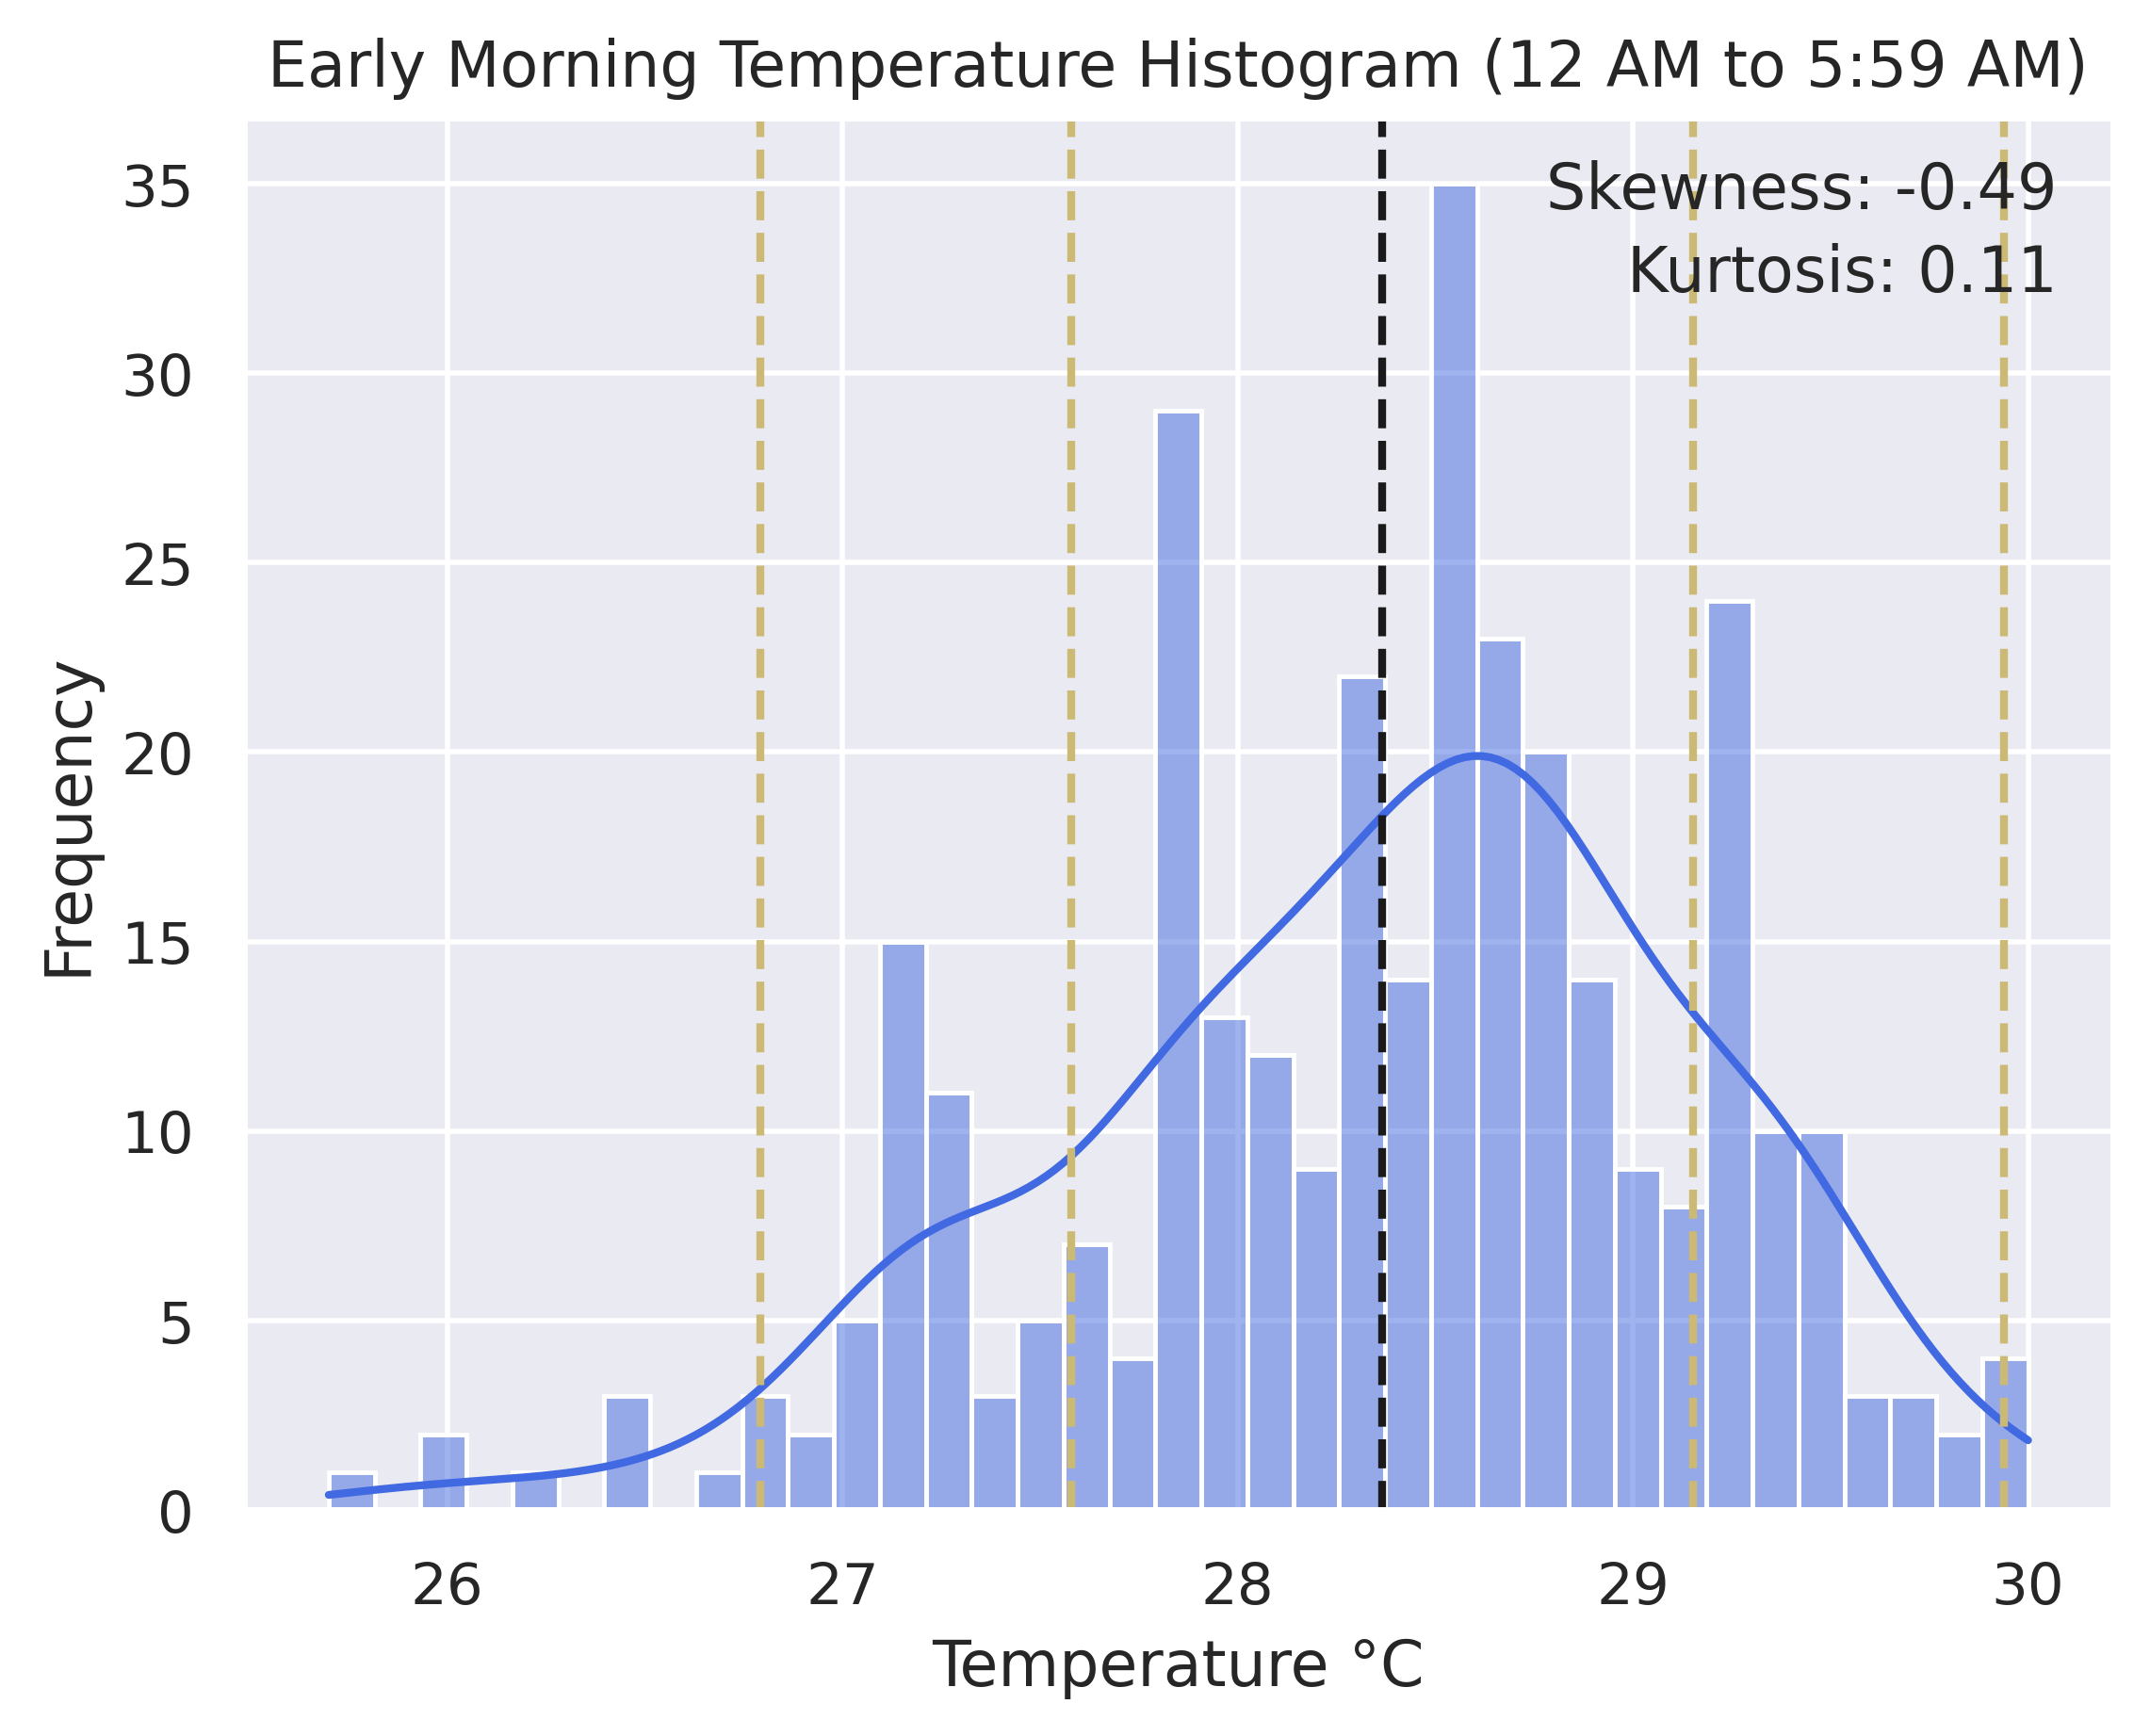

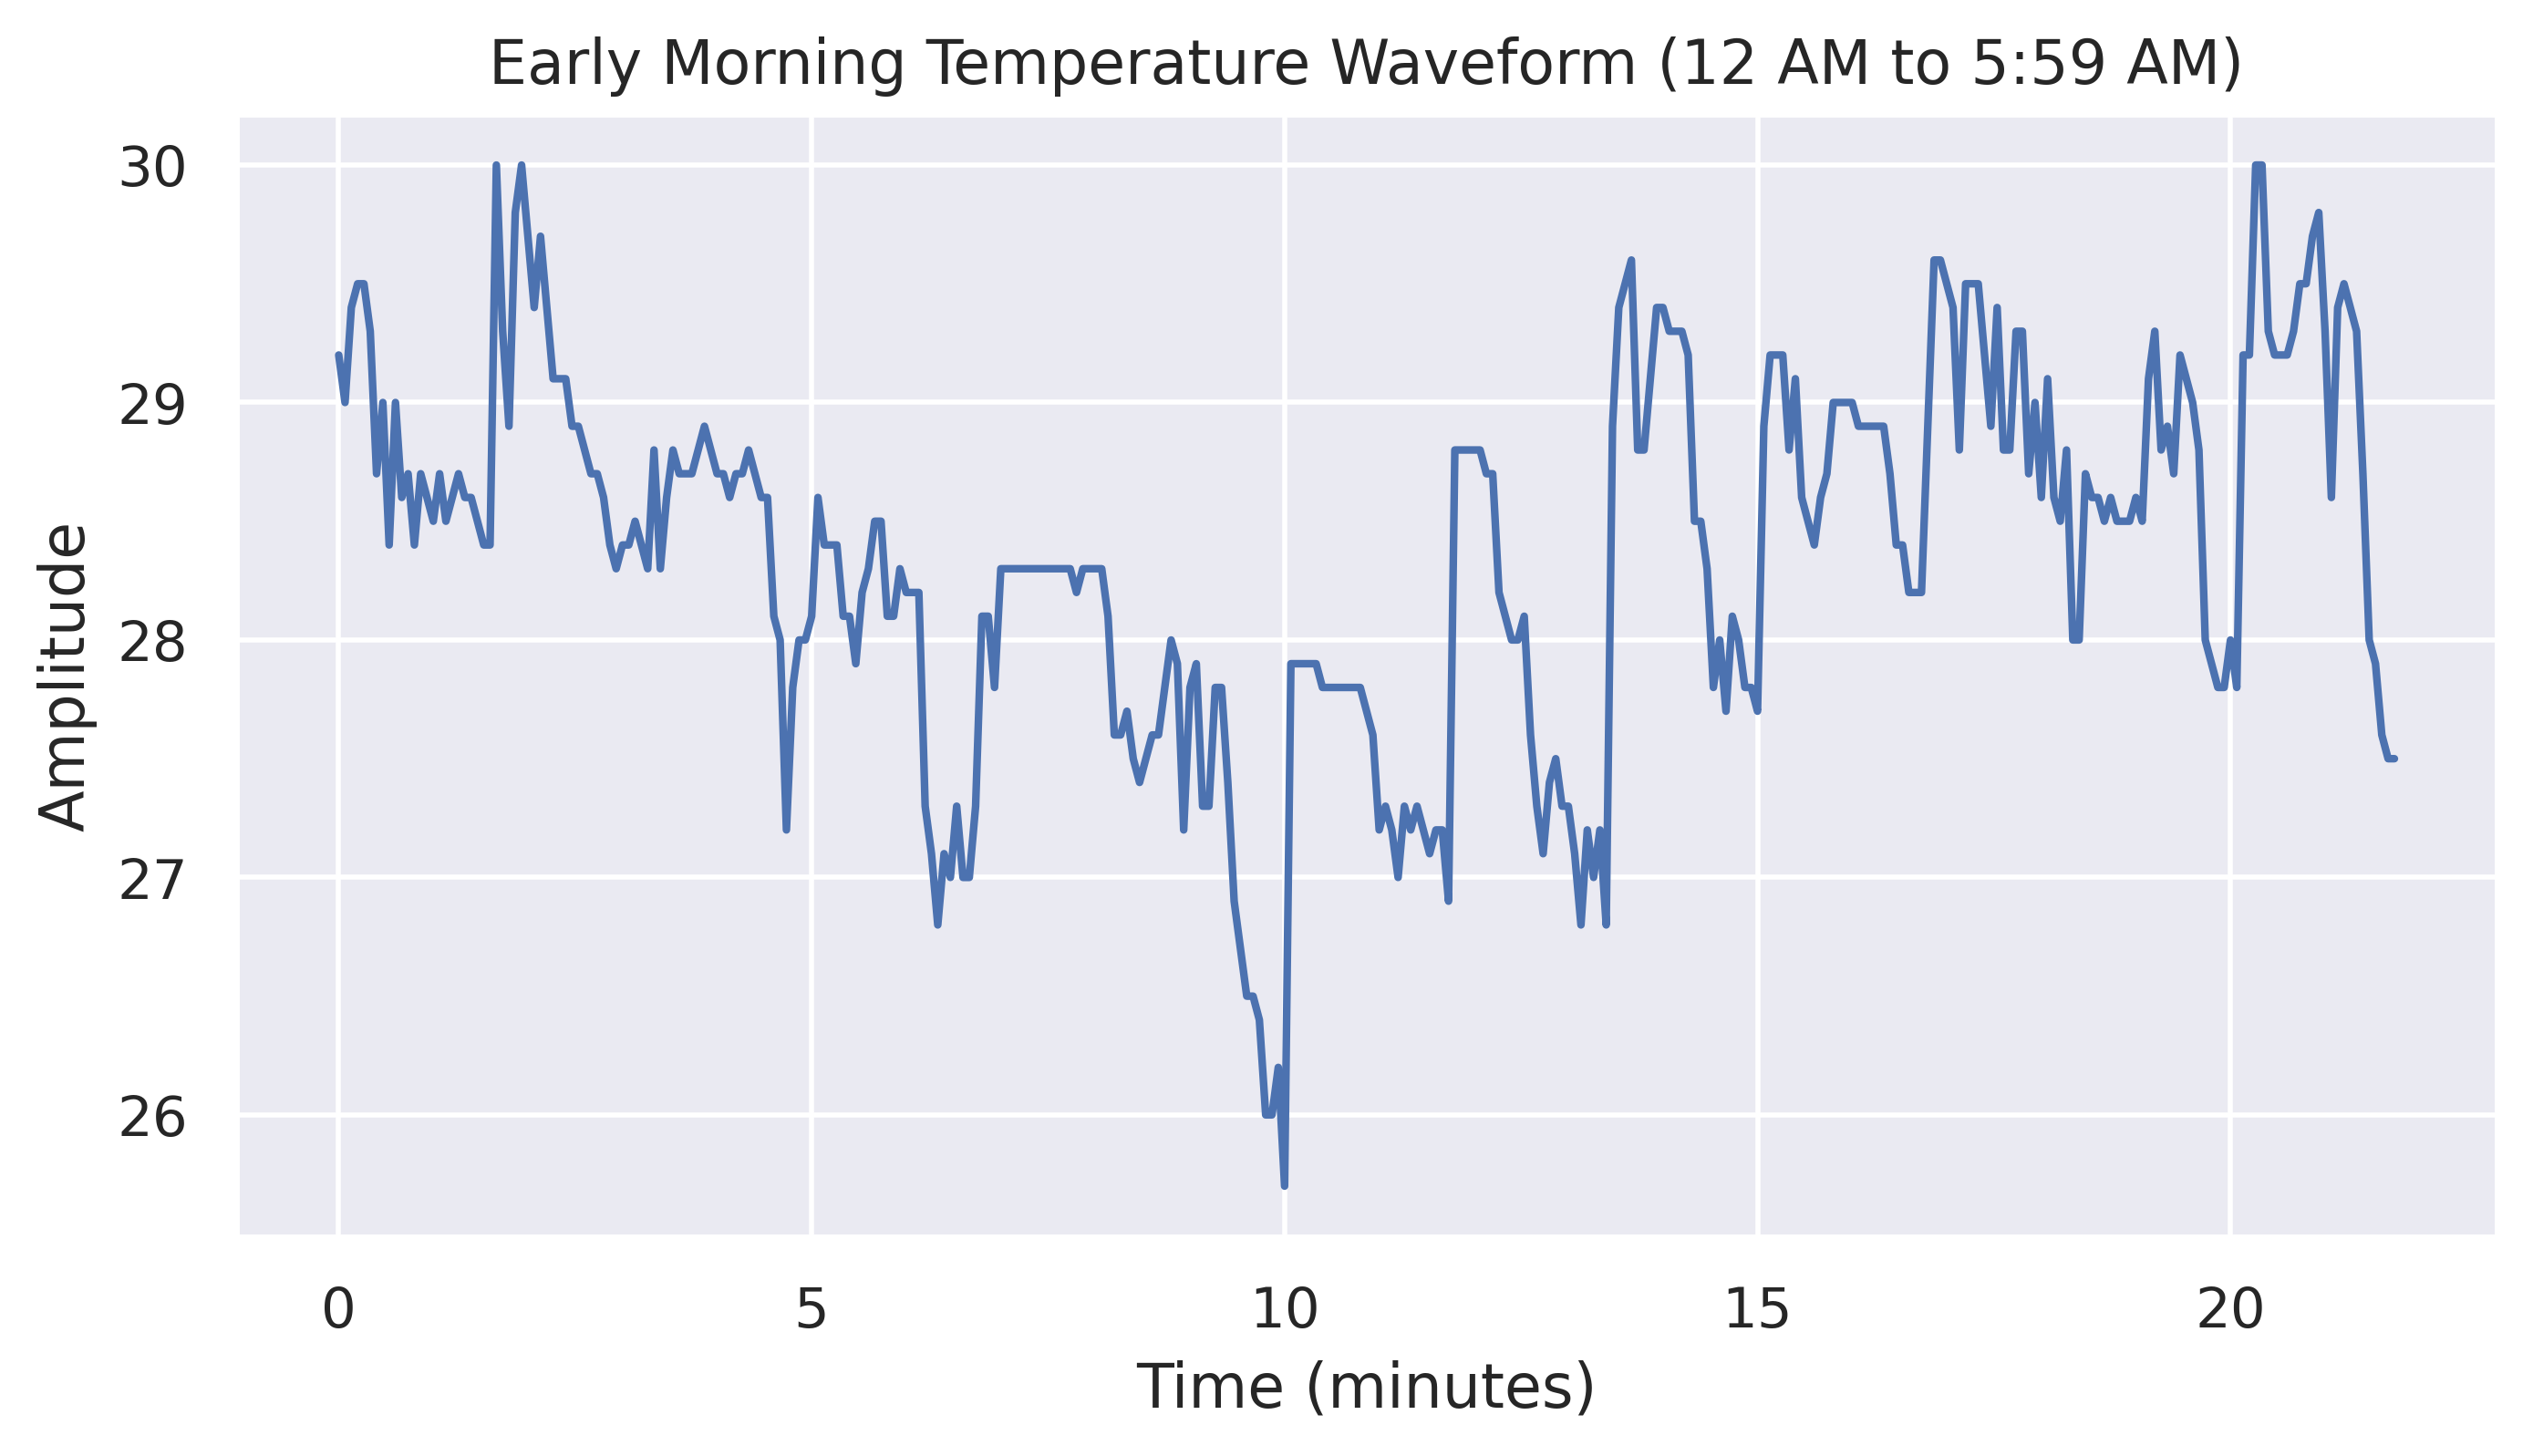

In [ ]:
# Convert the 'Time' column to a datetime object if it's not already in datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

# Create a DateTime column
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

# Filter the DataFrame to include only rows within 'Early Morning' time (12 AM to 5:59 AM)
early_morning_data = df[(df['Time'].dt.hour >= 0) & (df['Time'].dt.hour < 6)]

# Select only 'Time' and 'Temperature' columns and format 'Time' as string
early_morning_df = early_morning_data[['Time', 'Temperature']].copy()
early_morning_df['Time'] = early_morning_df['Time'].dt.time
print(early_morning_df)

# Generate the summary statistics for the numeric columns
statsum_early_morning = early_morning_df.drop(columns=['Time']).describe()
print(statsum_early_morning)
variance_early_morning = calculate_variance(early_morning_df)
print('\nVariance (Early Morning):', variance_early_morning, '\n')

# Generate Histogram
generate_histogram(early_morning_df, 'Temperature', 'Temperature °C', 'Early Morning Temperature Histogram (12 AM to 5:59 AM)')
print('\n')

# Generate Waveform
generate_waveform(early_morning_df, 'Early Morning Temperature Waveform (12 AM to 5:59 AM)')

          Time  Temperature
49    06:13:30         28.4
50    06:27:33         28.7
51    06:41:36         28.7
52    06:55:40         28.8
53    07:09:43         28.9
...        ...          ...
1336  10:50:23         28.7
1337  11:04:27         29.5
1338  11:18:31         30.4
1339  11:32:36         29.4
1340  11:46:40         29.4

[357 rows x 2 columns]
       Temperature
count   357.000000
mean     28.058263
std       0.765932
min      25.600000
25%      27.600000
50%      28.200000
75%      28.600000
max      30.400000

Variance (Morning): 0.5850087485974782 



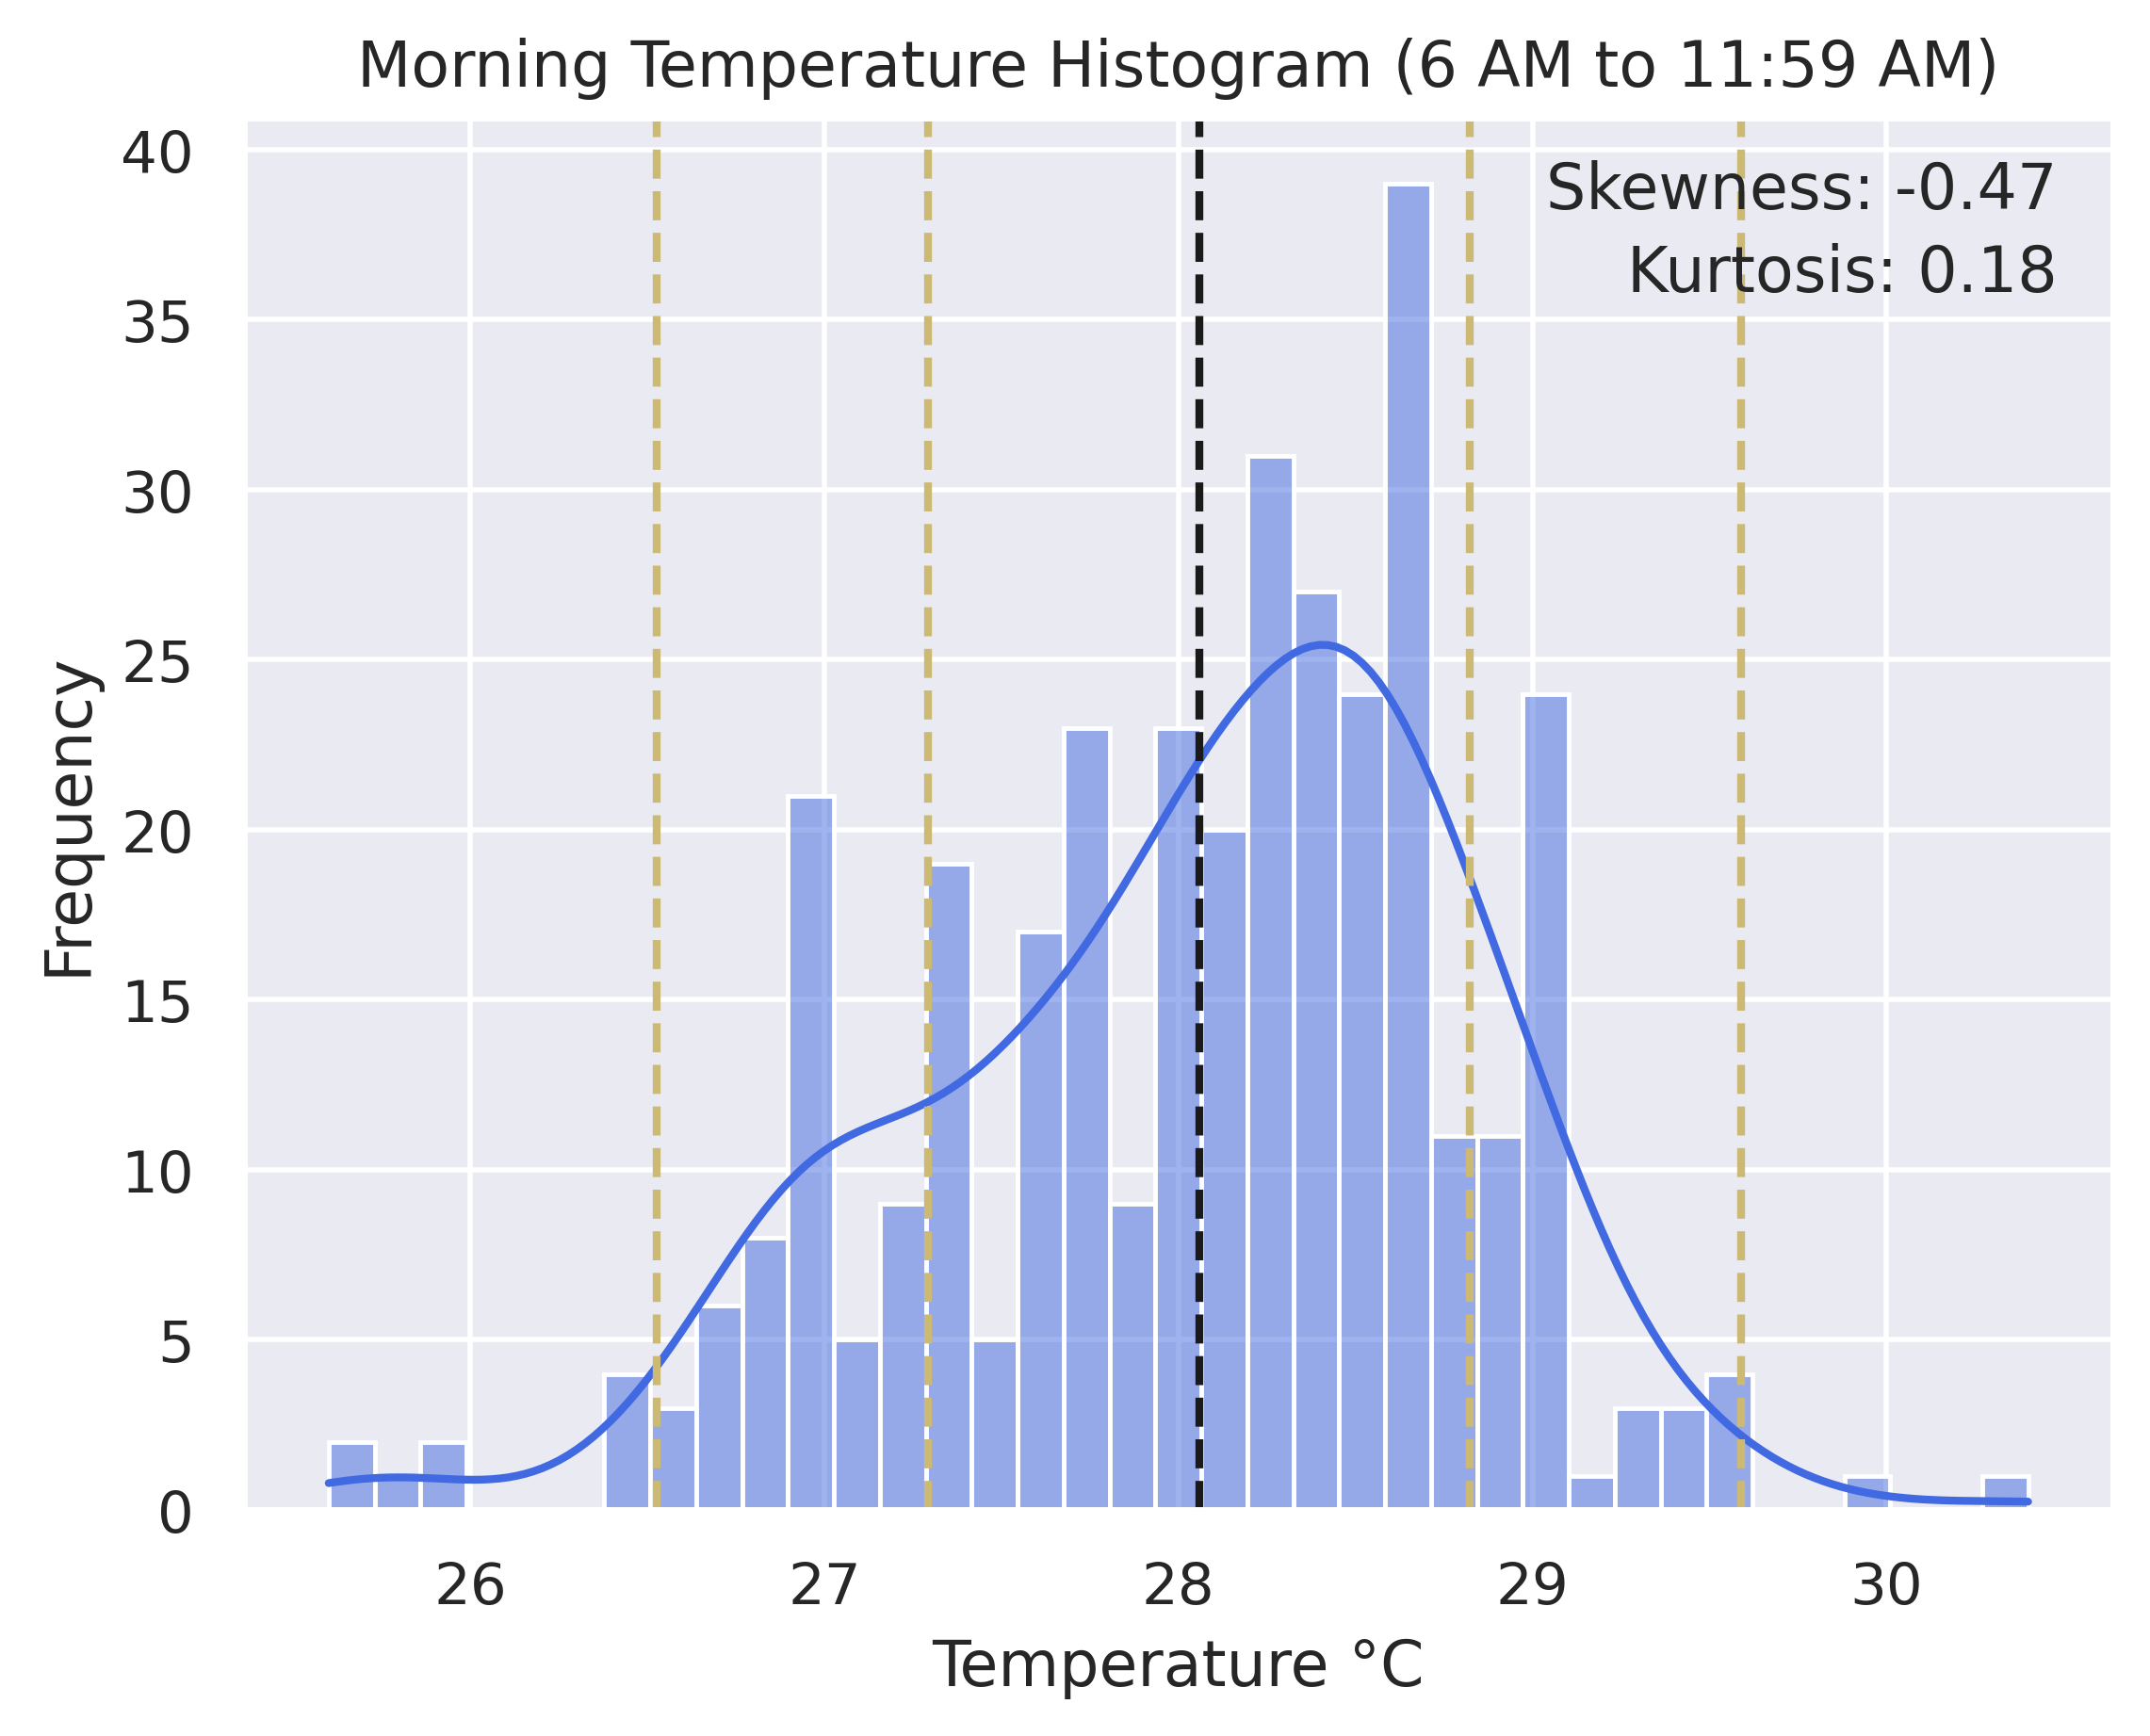

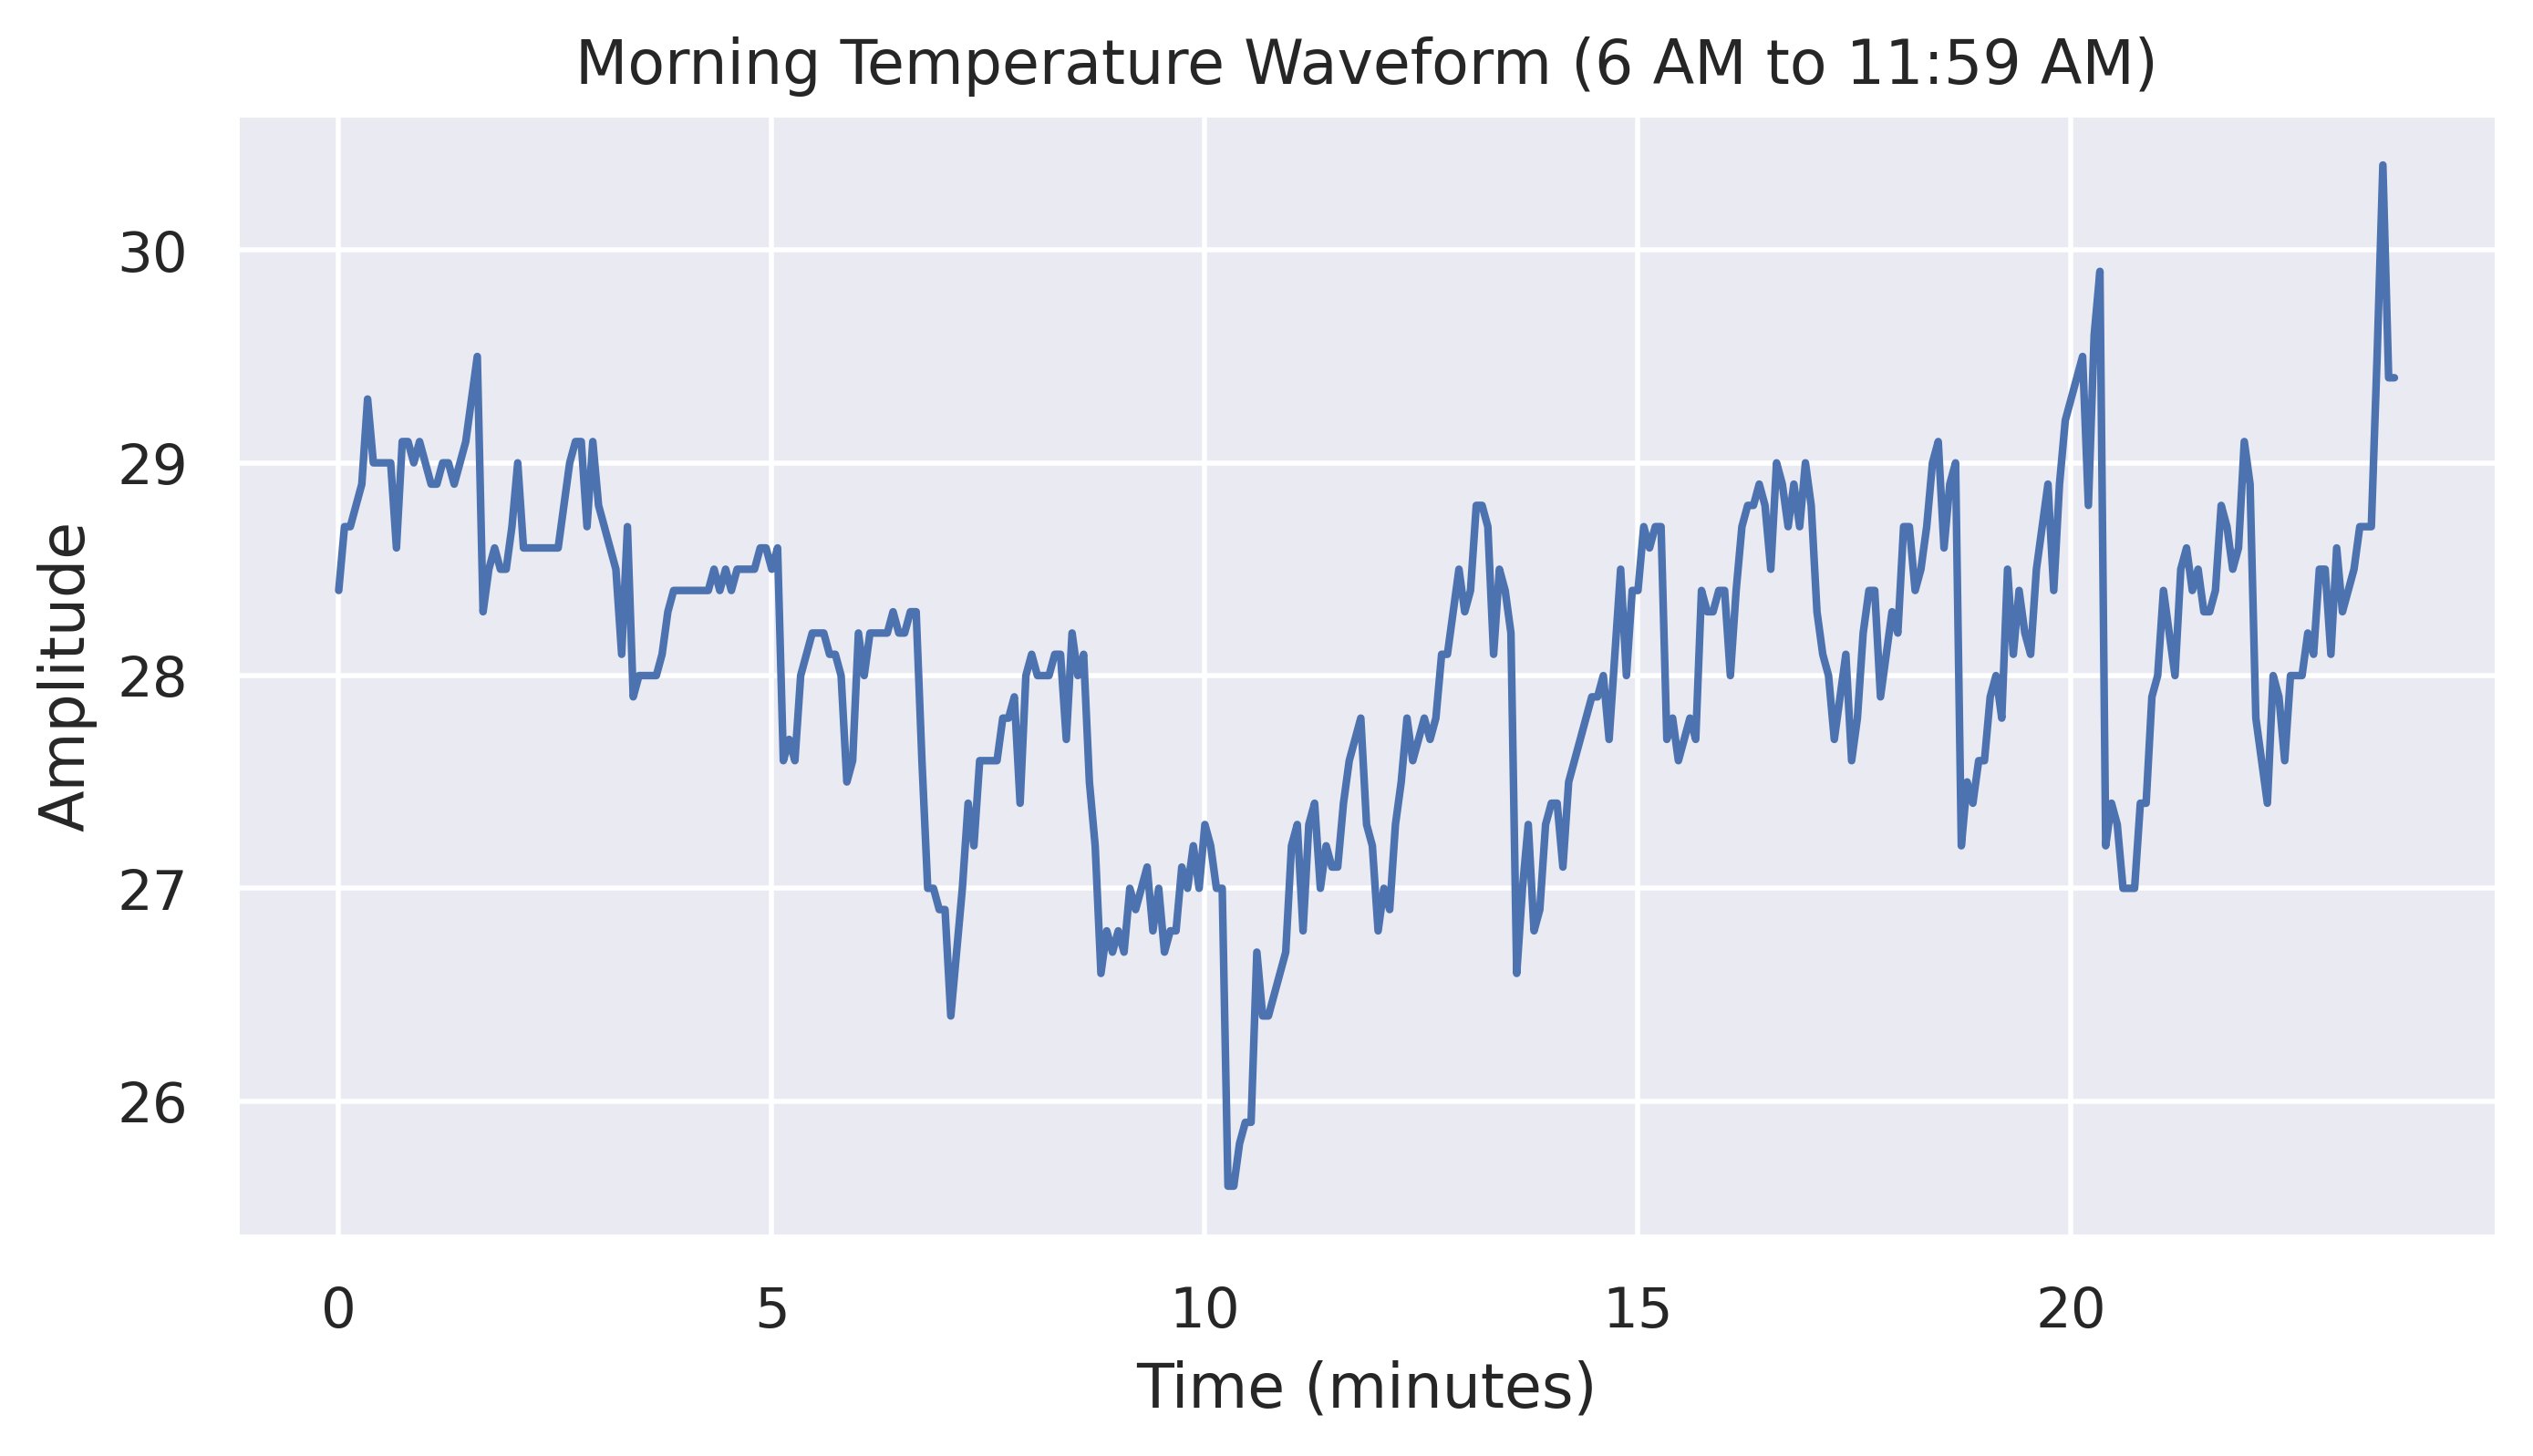

In [ ]:
# Convert the 'Time' column to a datetime object if it's not already in datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

# Filter the DataFrame to include only rows within 'Morning' time (6 AM to 11:59 AM)
morning_data = df[(df['Time'].dt.hour >= 6) & (df['Time'].dt.hour < 12)]

# Select only 'Time' and 'Temperature' columns and format 'Time' as string
morning_df = morning_data[['Time', 'Temperature']].copy()
morning_df['Time'] = morning_df['Time'].dt.time
print(morning_df)

# Generate the summary statistics for the numeric columns
statsum_morning = morning_df.drop(columns=['Time']).describe()
print(statsum_morning)
variance_morning = calculate_variance(morning_df)
print('\nVariance (Morning):', variance_morning, '\n')

# Generate Histogram
generate_histogram(morning_df, 'Temperature', 'Temperature °C', 'Morning Temperature Histogram (6 AM to 11:59 AM)')
print('\n')

# Generate Waveform
generate_waveform(morning_df, 'Morning Temperature Waveform (6 AM to 11:59 AM)')

          Time  Temperature
74    12:04:58         29.2
75    12:19:01         29.8
76    12:33:04         30.7
77    12:47:07         30.9
78    13:01:10         30.8
...        ...          ...
1342  12:14:48         29.8
1343  12:28:52         30.8
1344  12:42:55         30.0
1345  12:56:59         30.7
1346  13:11:03         29.9

[329 rows x 2 columns]
       Temperature
count   329.000000
mean     28.955319
std       0.876546
min      27.000000
25%      28.400000
50%      28.700000
75%      29.600000
max      30.900000

Variance (Afternoon): 0.7659975425208561 



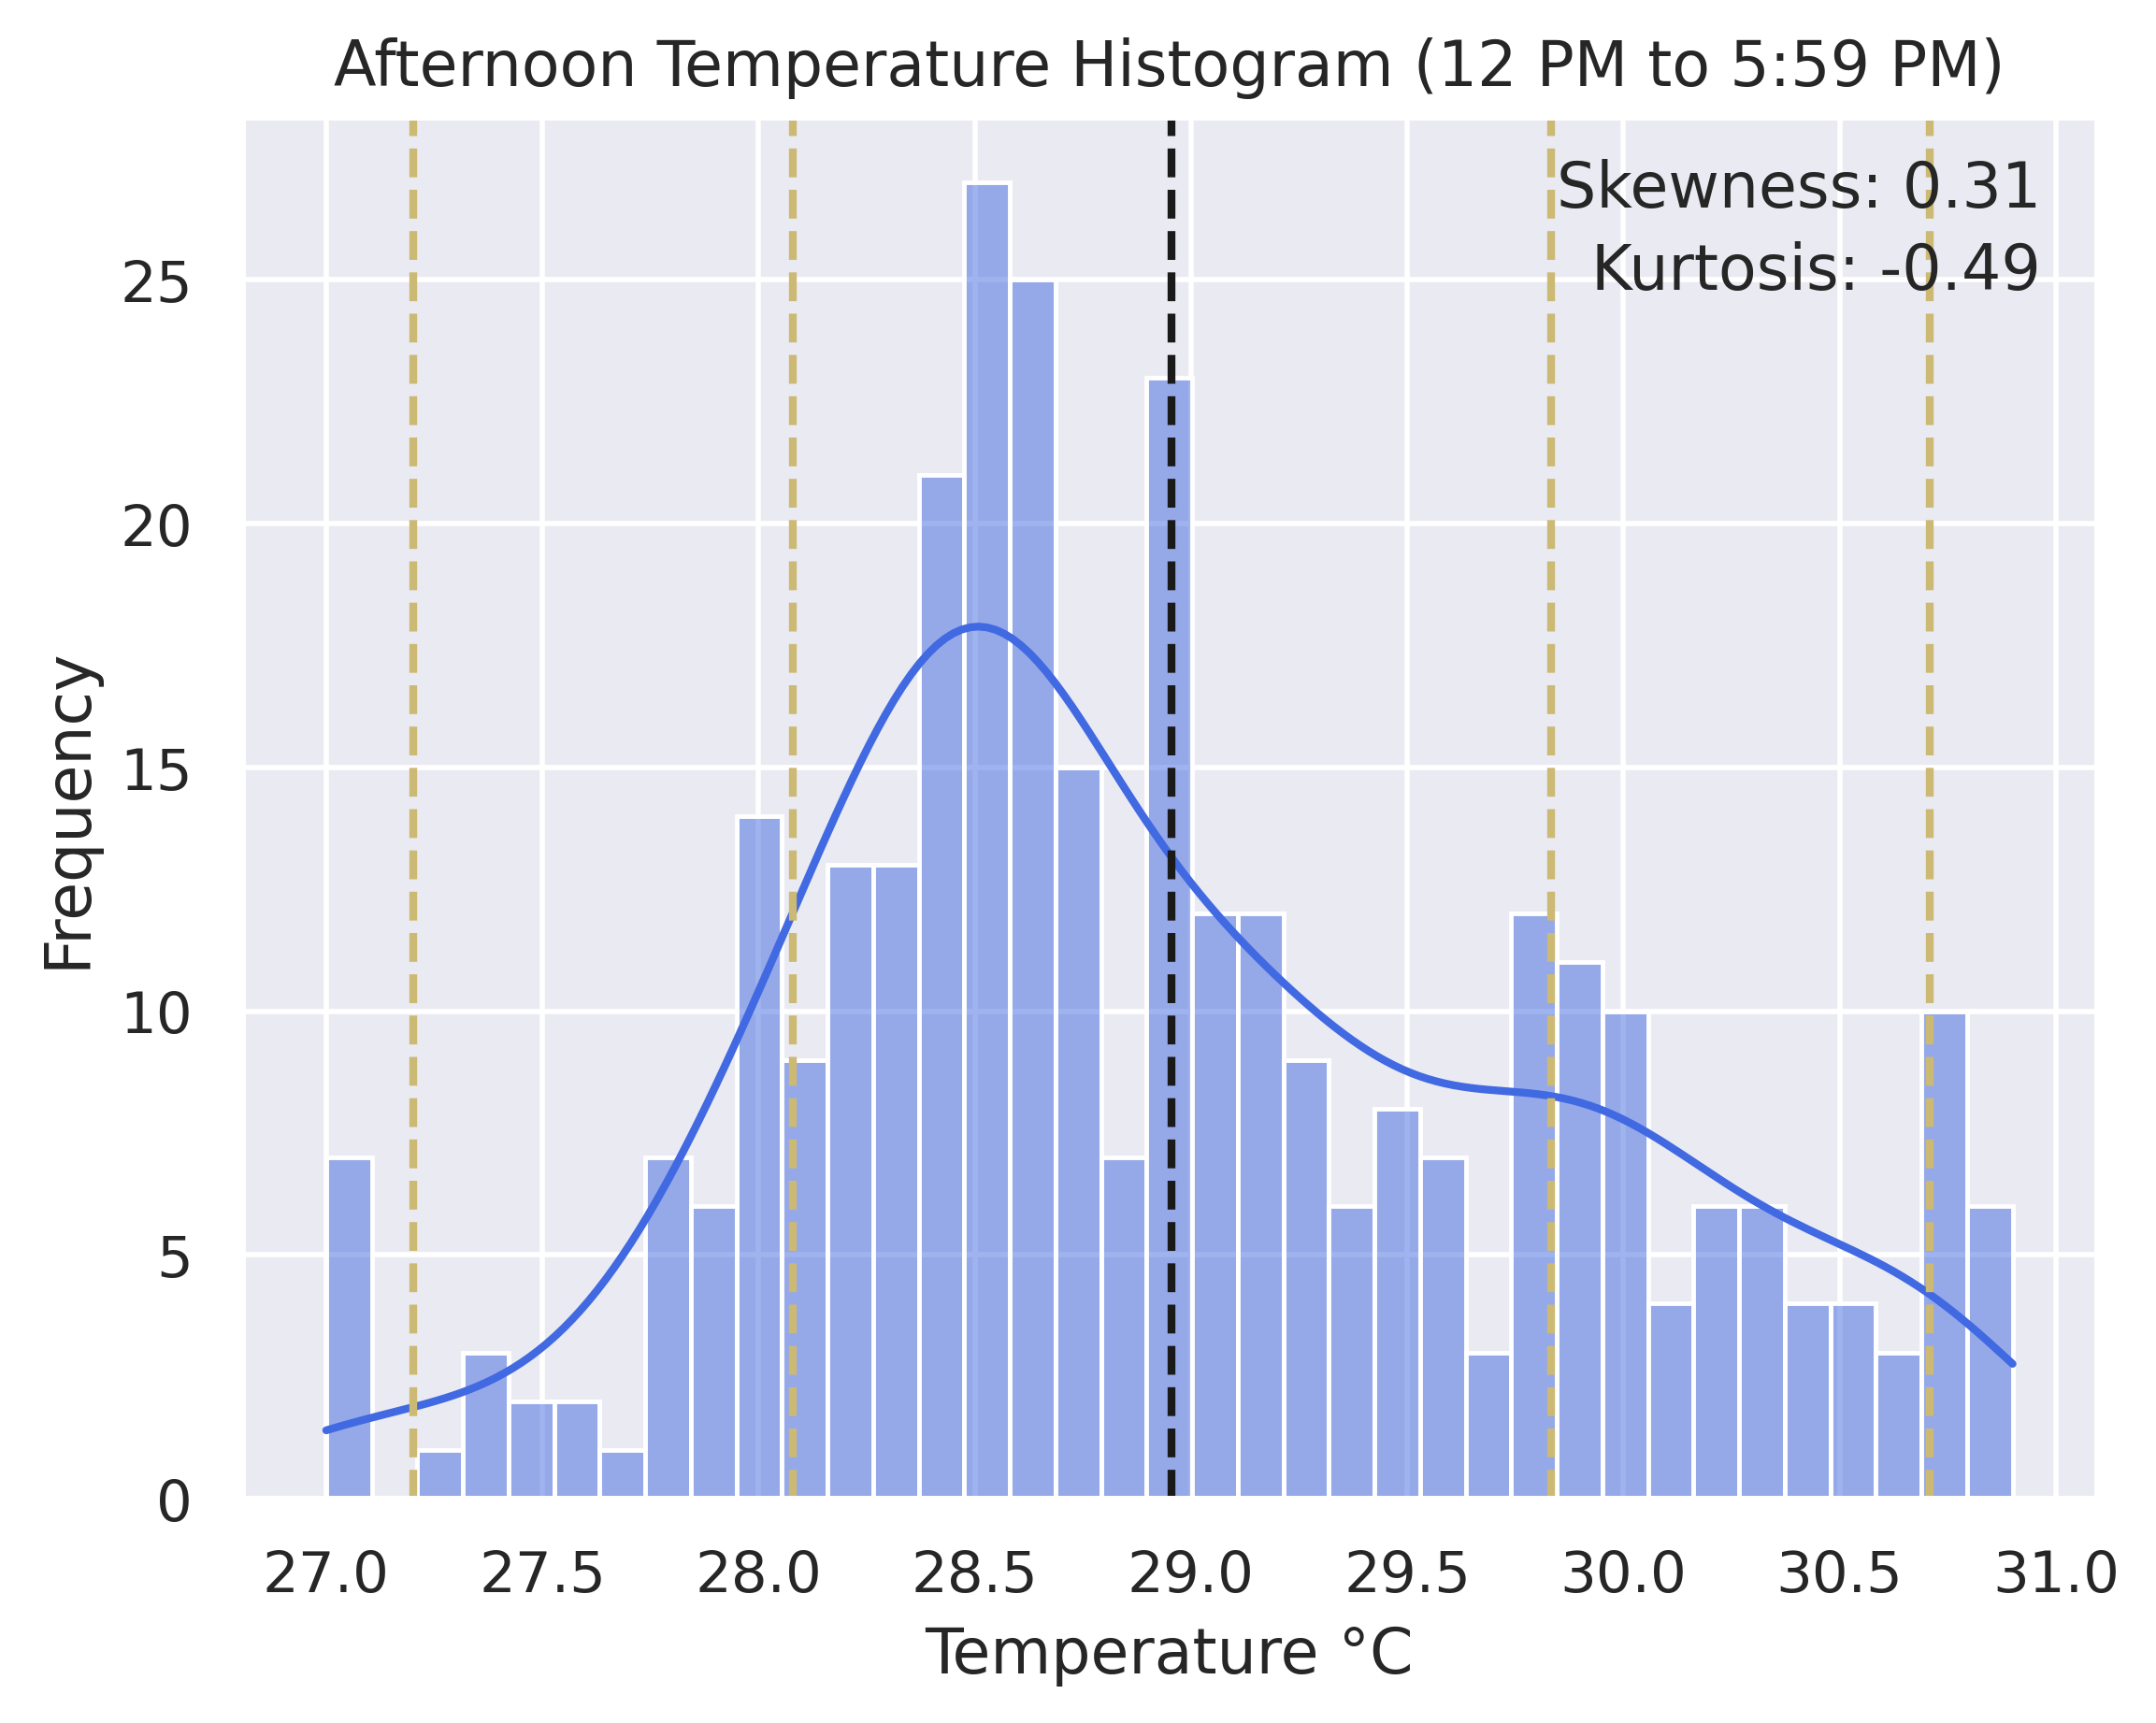

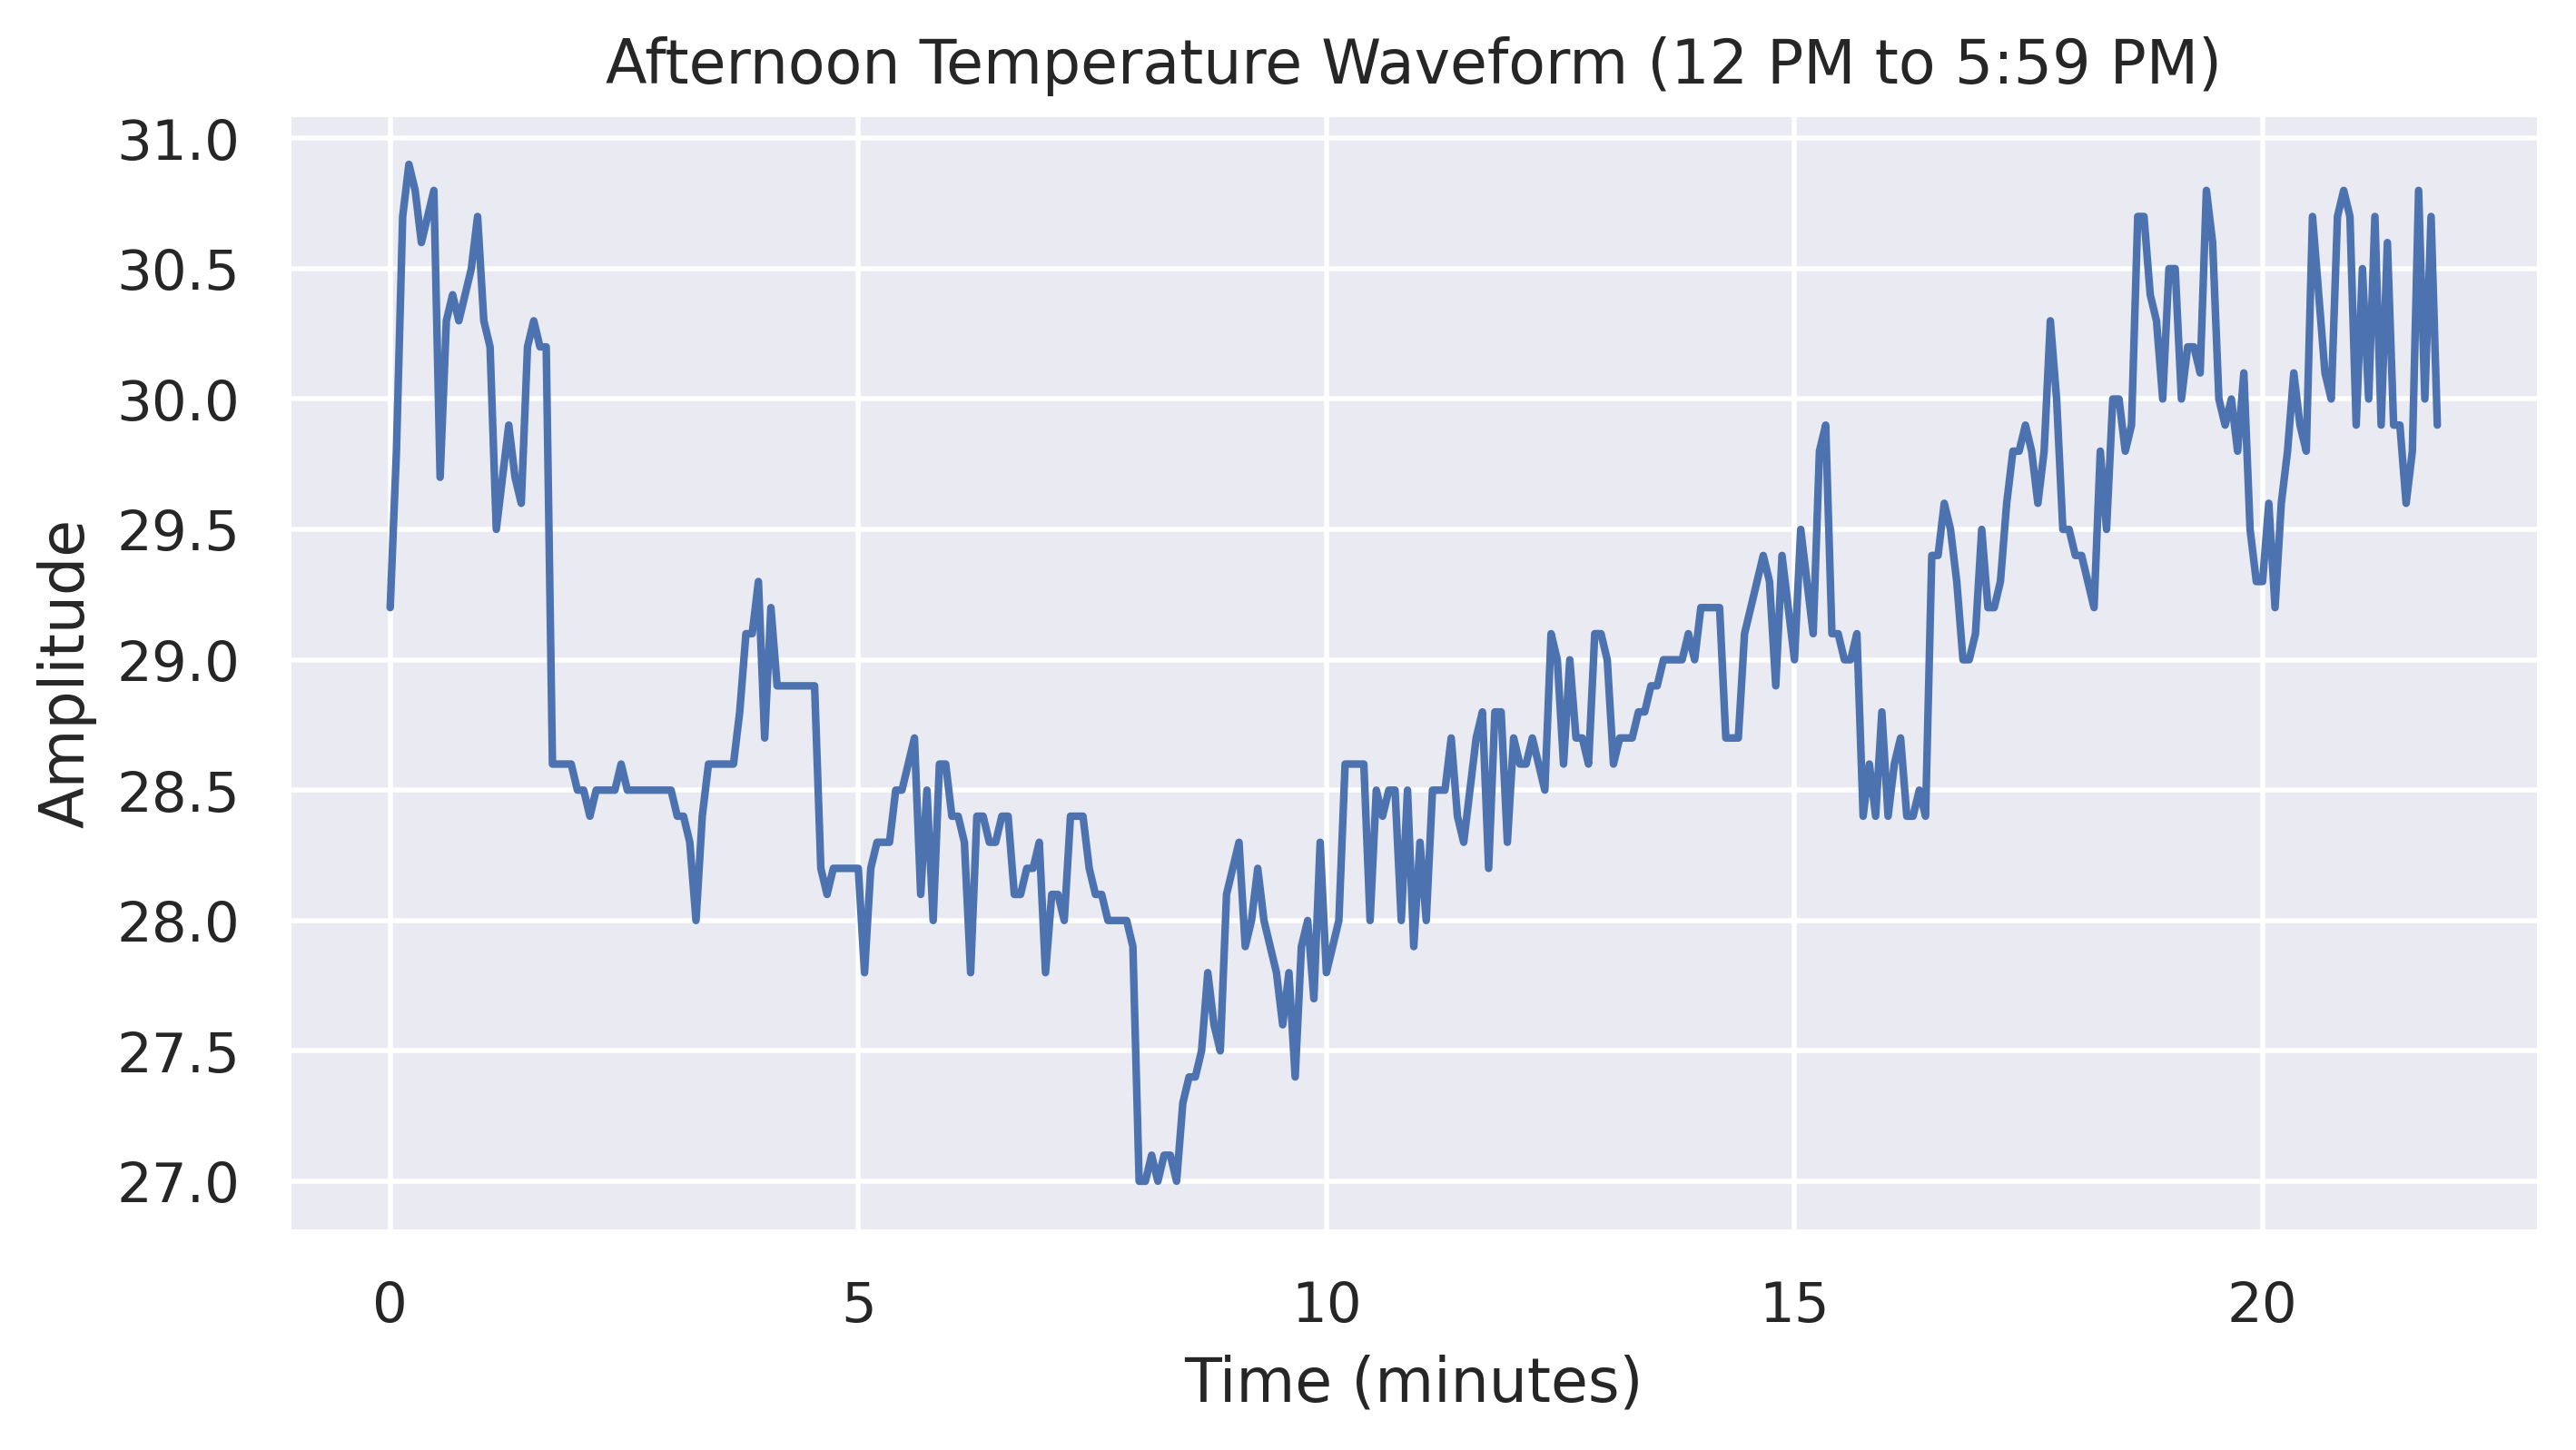

In [ ]:
# Filter the DataFrame to include only rows within 'Afternoon' time (12 PM to 5:59 PM)
afternoon_data = df[(df['Time'].dt.hour >= 12) & (df['Time'].dt.hour < 18)]

# Select only 'Time' and 'Temperature' columns and format 'Time' as string
afternoon_df = afternoon_data[['Time', 'Temperature']].copy()
afternoon_df['Time'] = afternoon_df['Time'].dt.time
print(afternoon_df)

# Generate the summary statistics for the numeric columns
statsum_afternoon = afternoon_df.drop(columns=['Time']).describe()
print(statsum_afternoon)
variance_afternoon = calculate_variance(afternoon_df)
print('\nVariance (Afternoon):', variance_afternoon, '\n')

# Generate Histogram
generate_histogram(afternoon_df, 'Temperature', 'Temperature °C', 'Afternoon Temperature Histogram (12 PM to 5:59 PM)')
print('\n')

# Generate Waveform
generate_waveform(afternoon_df, 'Afternoon Temperature Waveform (12 PM to 5:59 PM)')

          Time  Temperature
0     18:28:08         30.5
1     18:42:11         30.6
2     18:56:14         29.7
3     19:10:17         30.1
4     19:24:23         30.4
...        ...          ...
1286  22:52:59         29.6
1287  23:07:03         29.7
1288  23:21:07         29.1
1289  23:35:10         29.3
1290  23:49:14         29.8

[334 rows x 2 columns]
       Temperature
count   334.000000
mean     28.876347
std       0.757194
min      27.300000
25%      28.200000
50%      28.700000
75%      29.500000
max      30.600000

Variance (Evening): 0.5716261787801643 



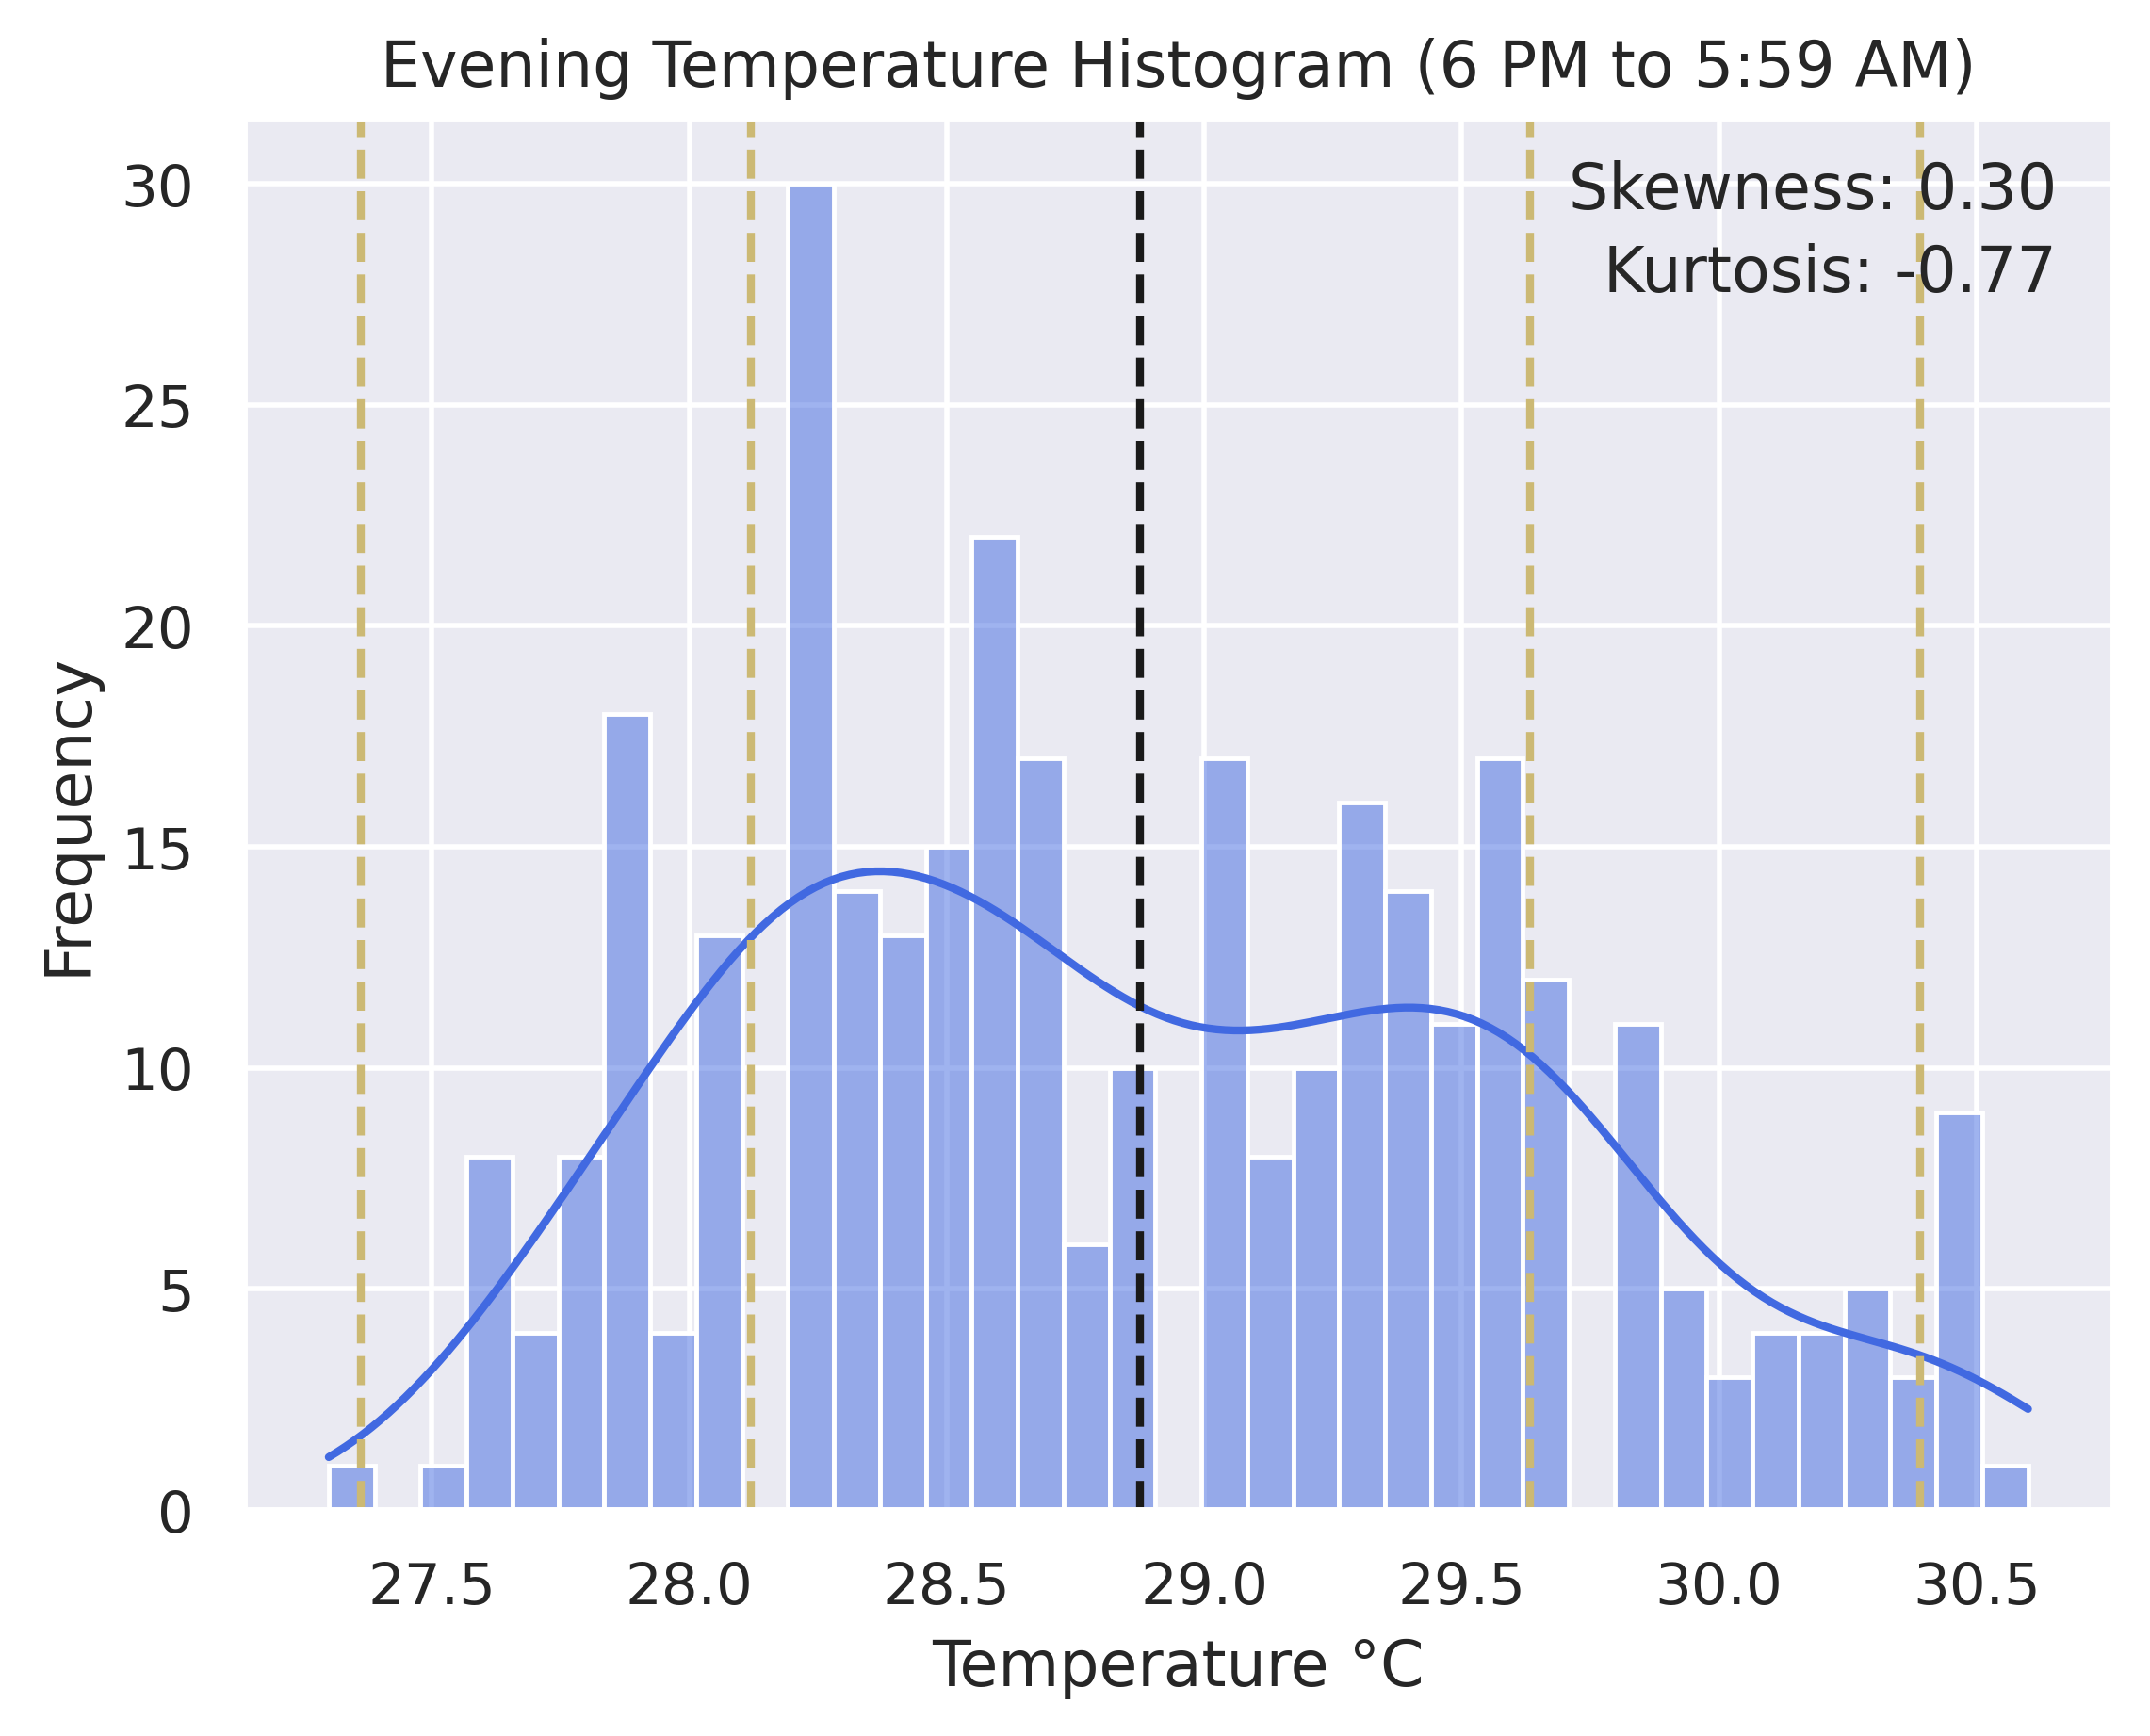

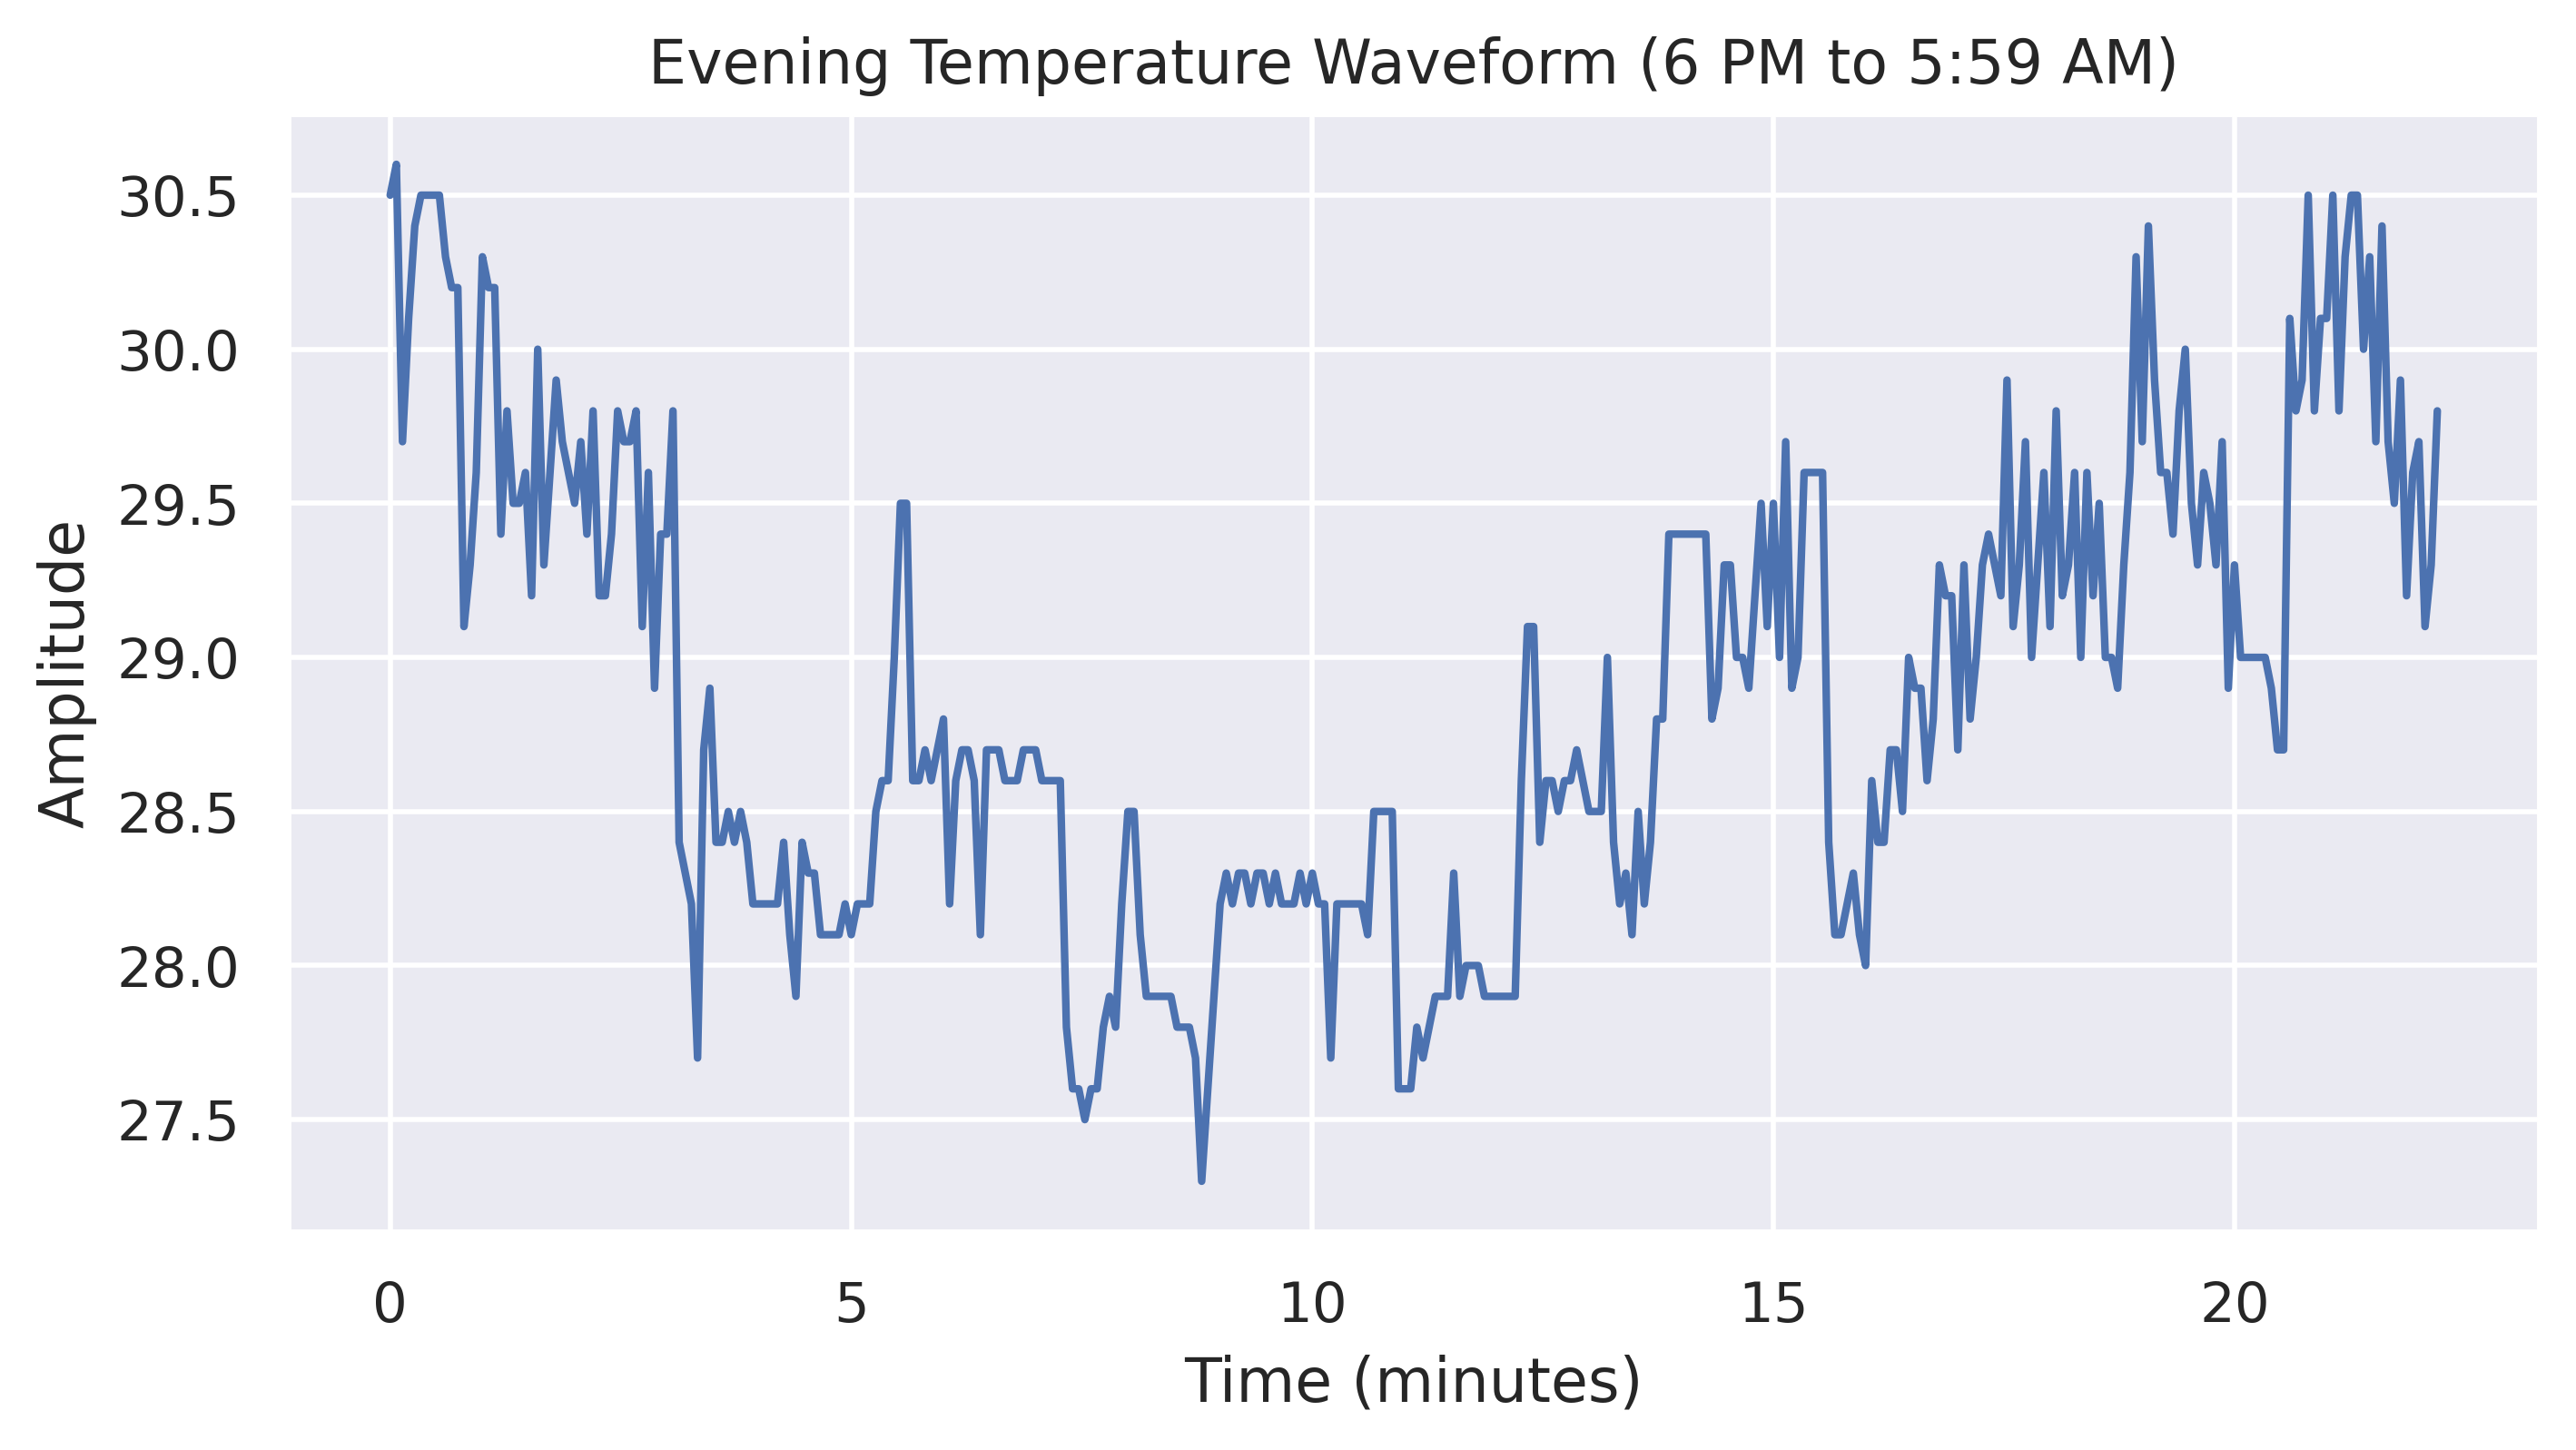

In [ ]:
# Filter the DataFrame to include only rows within 'Evening' time (6 PM to 5:59 AM)
evening_data = df[(df['Time'].dt.hour >= 18) & (df['Time'].dt.hour < 24)]

# Select only 'Time' and 'Temperature' columns and format 'Time' as string
evening_df = evening_data[['Time', 'Temperature']].copy()
evening_df['Time'] = evening_df['Time'].dt.time
print(evening_df)

# Generate the summary statistics for the numeric columns
statsum_evening = evening_df.drop(columns=['Time']).describe()
print(statsum_evening)
variance_evening = calculate_variance(evening_df)
print('\nVariance (Evening):', variance_evening, '\n')

# Generate Histogram
generate_histogram(evening_df, 'Temperature', 'Temperature °C', 'Evening Temperature Histogram (6 PM to 5:59 AM)')
print('\n')

# Generate Waveform
generate_waveform(evening_df, 'Evening Temperature Waveform (6 PM to 5:59 AM)')

**Day of Week**

           Date      Time  Temperature
555  2023-10-23  17:33:47         27.8
548  2023-10-23  15:55:22         28.2
554  2023-10-23  17:19:43         27.9
553  2023-10-23  17:05:40         28.0
552  2023-10-23  16:51:37         28.2
...         ...       ...          ...
1221 2023-10-30  07:24:29         27.4
1220 2023-10-30  07:10:25         27.0
1219 2023-10-30  06:56:22         27.0
1218 2023-10-30  06:42:18         27.0
1217 2023-10-30  06:28:14         27.3

[200 rows x 3 columns]
       Temperature
count   200.000000
mean     28.445500
std       1.070237
min      26.600000
25%      27.800000
50%      28.300000
75%      29.200000
max      30.800000

Variance (Monday): 1.13967975 



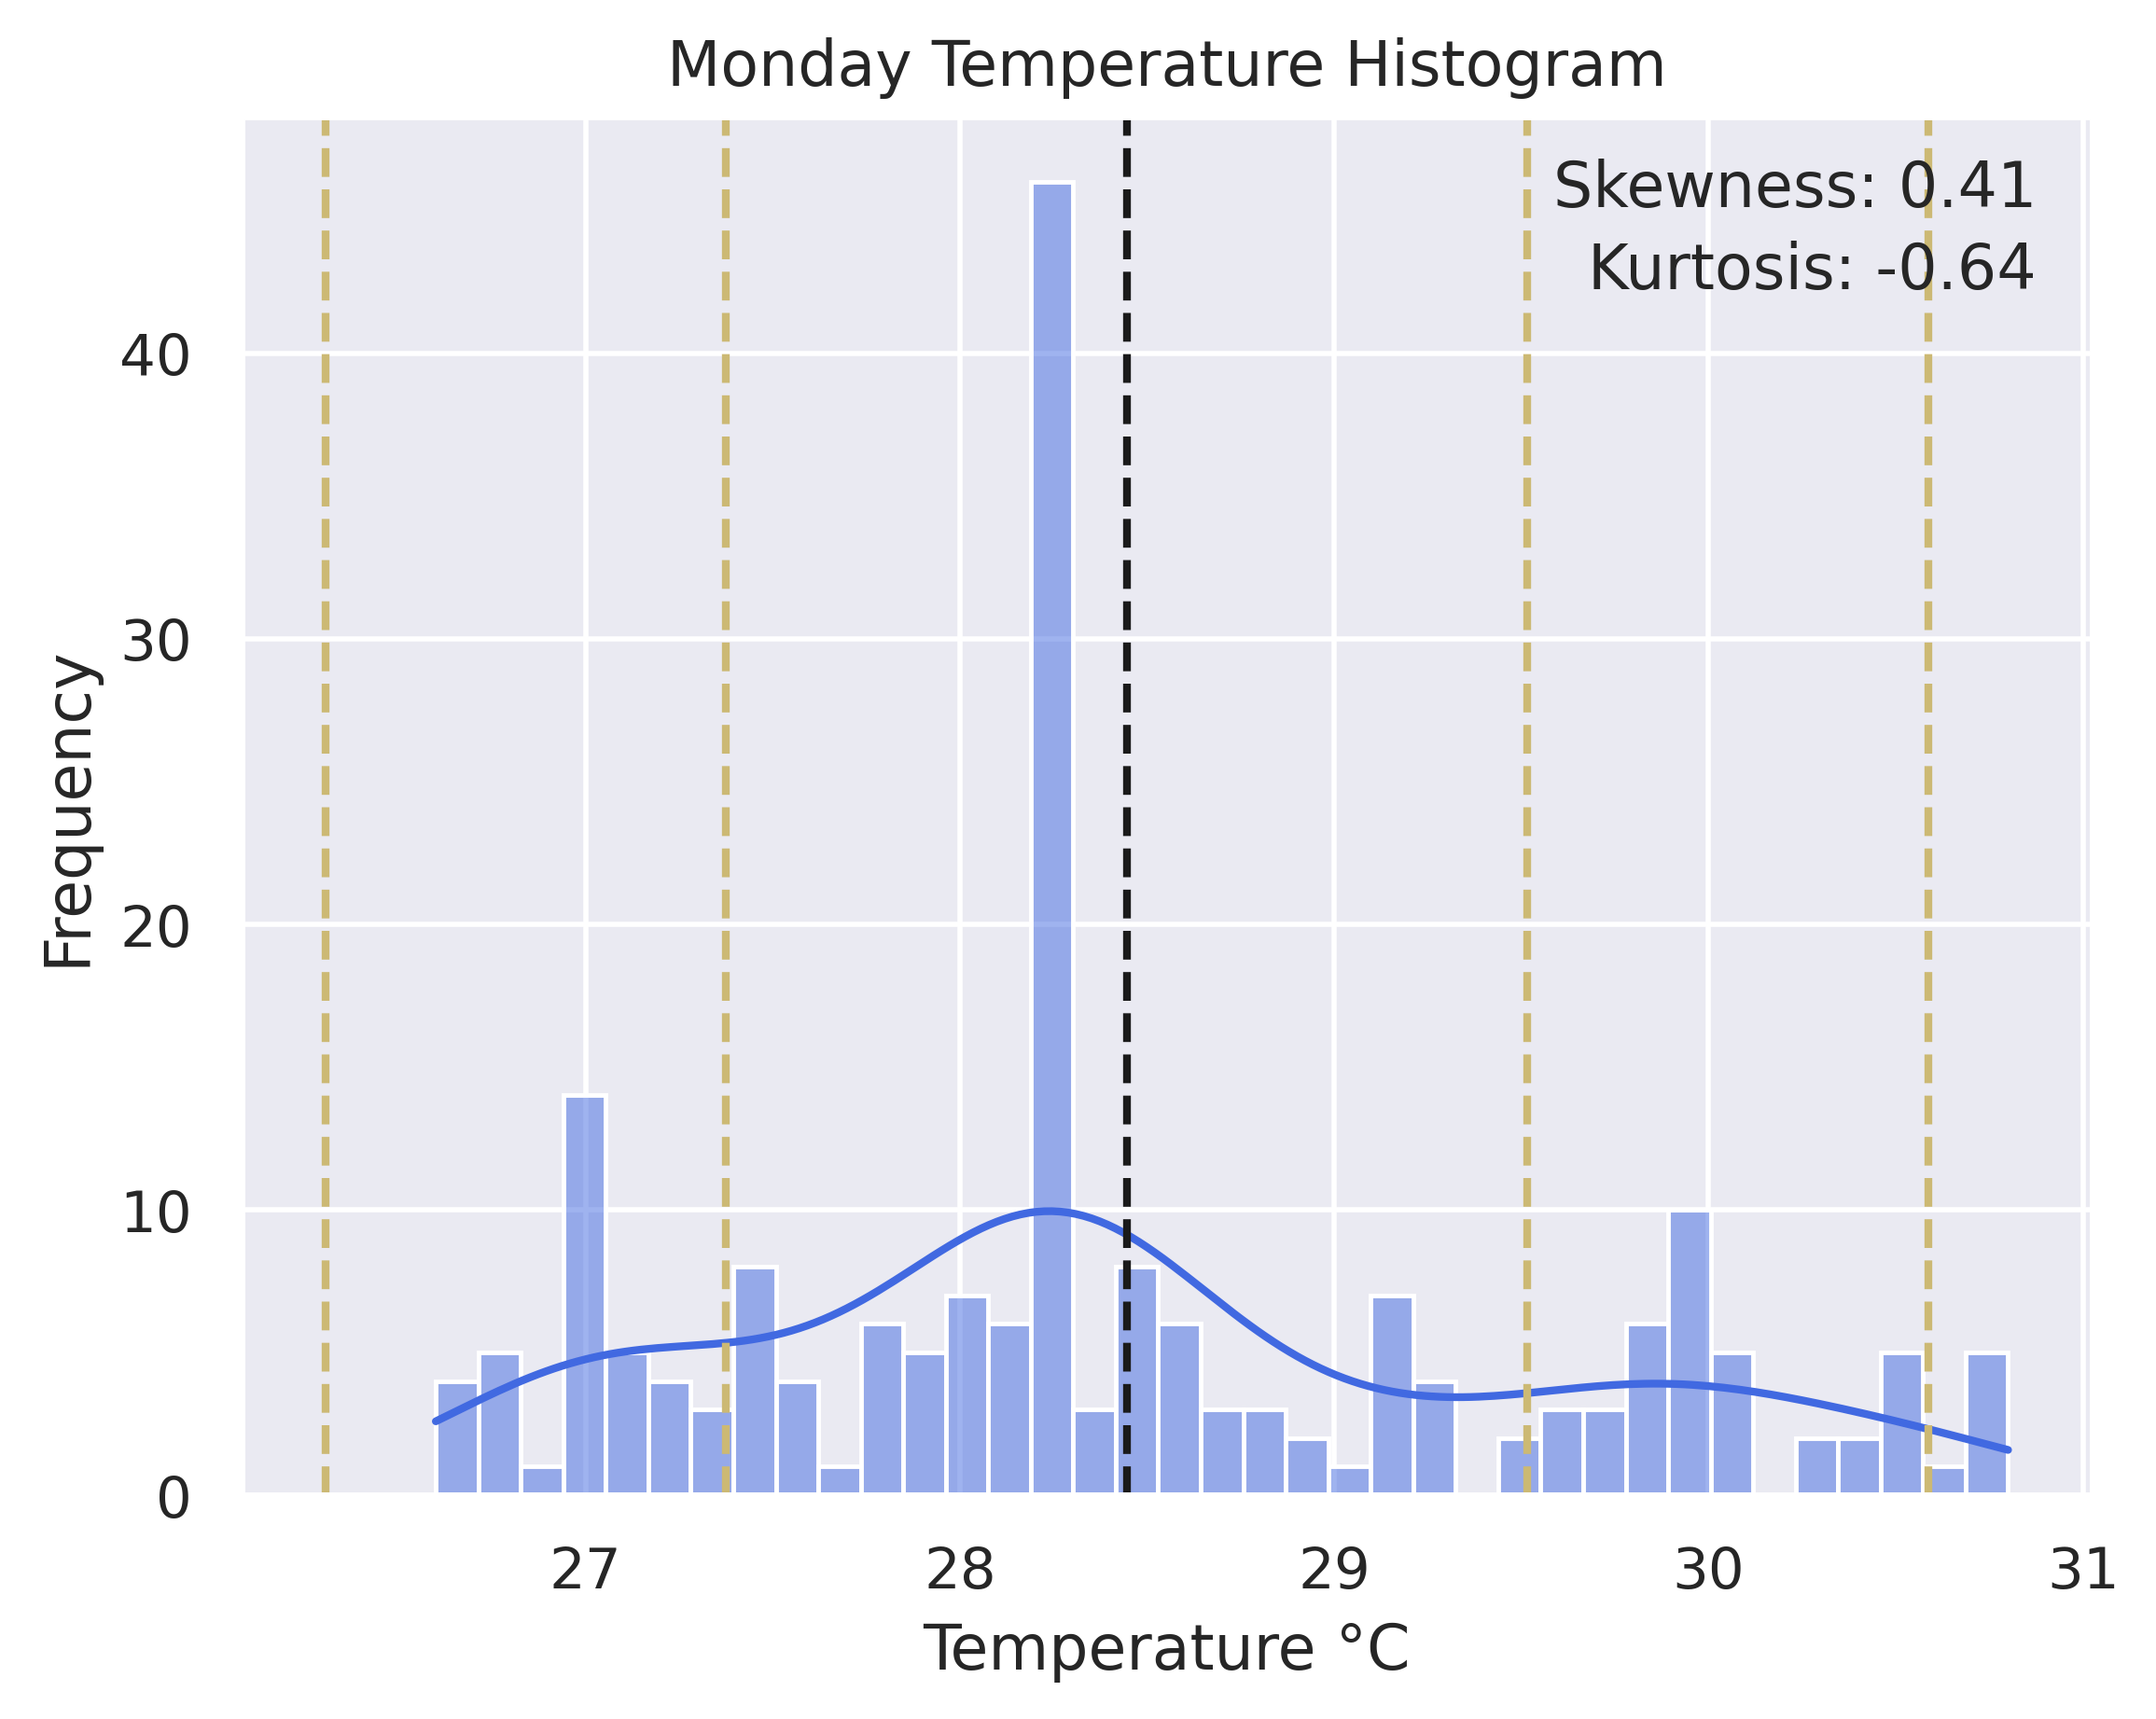

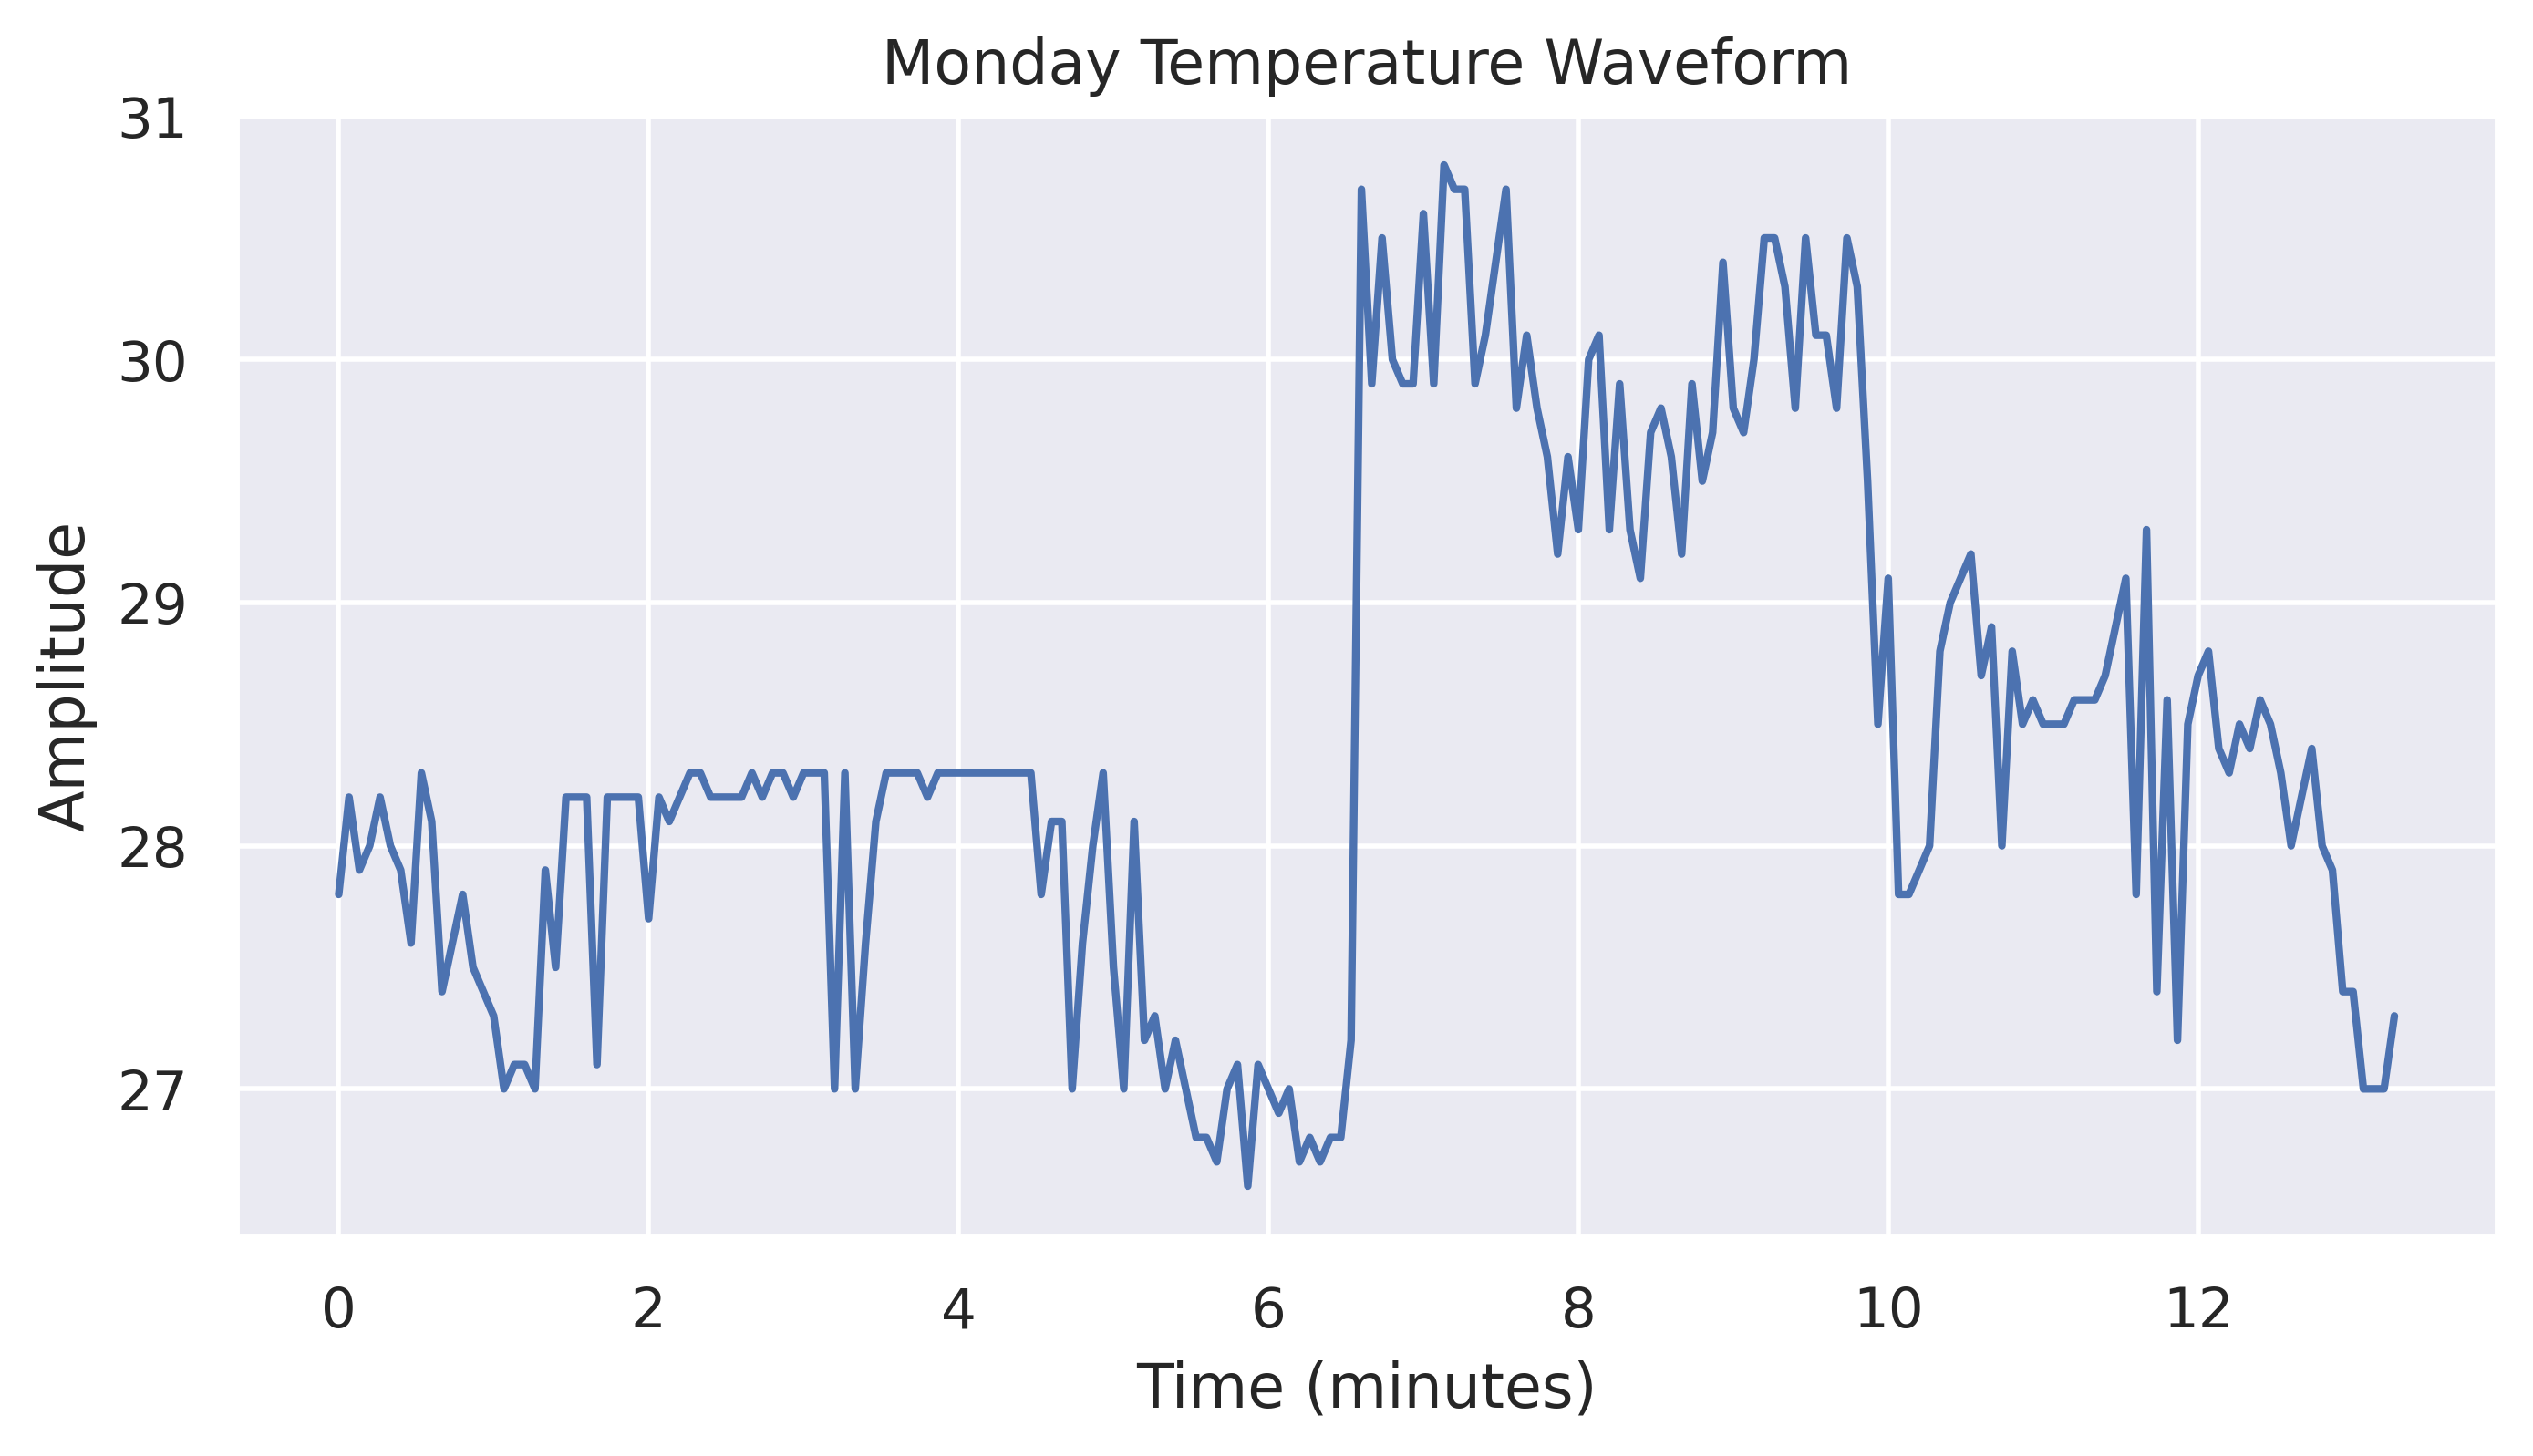

In [ ]:
# Convert the 'date' column to a datetime object if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by the 'date' column
df.sort_values(by='Date', inplace=True)

# Filter the DataFrame to include only rows with Mondays
mondays_df = df[df['Date'].dt.dayofweek == 0].copy()
mondays_df['Time'] = mondays_df['Time'].dt.time
print(mondays_df.drop(columns=['DateTime']))

# Generate the summary statistics for the numeric columns
statsum_mon = mondays_df.drop(columns=['Date']).describe()
print(statsum_mon)
variance_mon = calculate_variance(mondays_df)
print('\nVariance (Monday):', variance_mon, '\n')

# Generate Histogram
generate_histogram(mondays_df, 'Temperature', 'Temperature °C', 'Monday Temperature Histogram')
print('\n')

# Generate Waveform
generate_waveform(mondays_df, 'Monday Temperature Waveform')

           Date      Time  Temperature
0    2023-10-17  18:28:08         30.5
22   2023-10-17  23:36:19         29.6
21   2023-10-17  23:22:17         29.5
20   2023-10-17  23:06:05         29.5
19   2023-10-17  22:55:08         29.8
...         ...       ...          ...
1313 2023-10-31  05:26:52         27.6
1314 2023-10-31  05:40:56         27.5
1315 2023-10-31  05:55:00         27.5
1317 2023-10-31  06:23:07         27.6
1346 2023-10-31  13:11:03         29.9

[181 rows x 3 columns]
       Temperature
count   181.000000
mean     28.276243
std       1.183892
min      25.600000
25%      27.600000
50%      28.000000
75%      29.200000
max      30.800000

Variance (Tuesday): 1.3938554989163947 



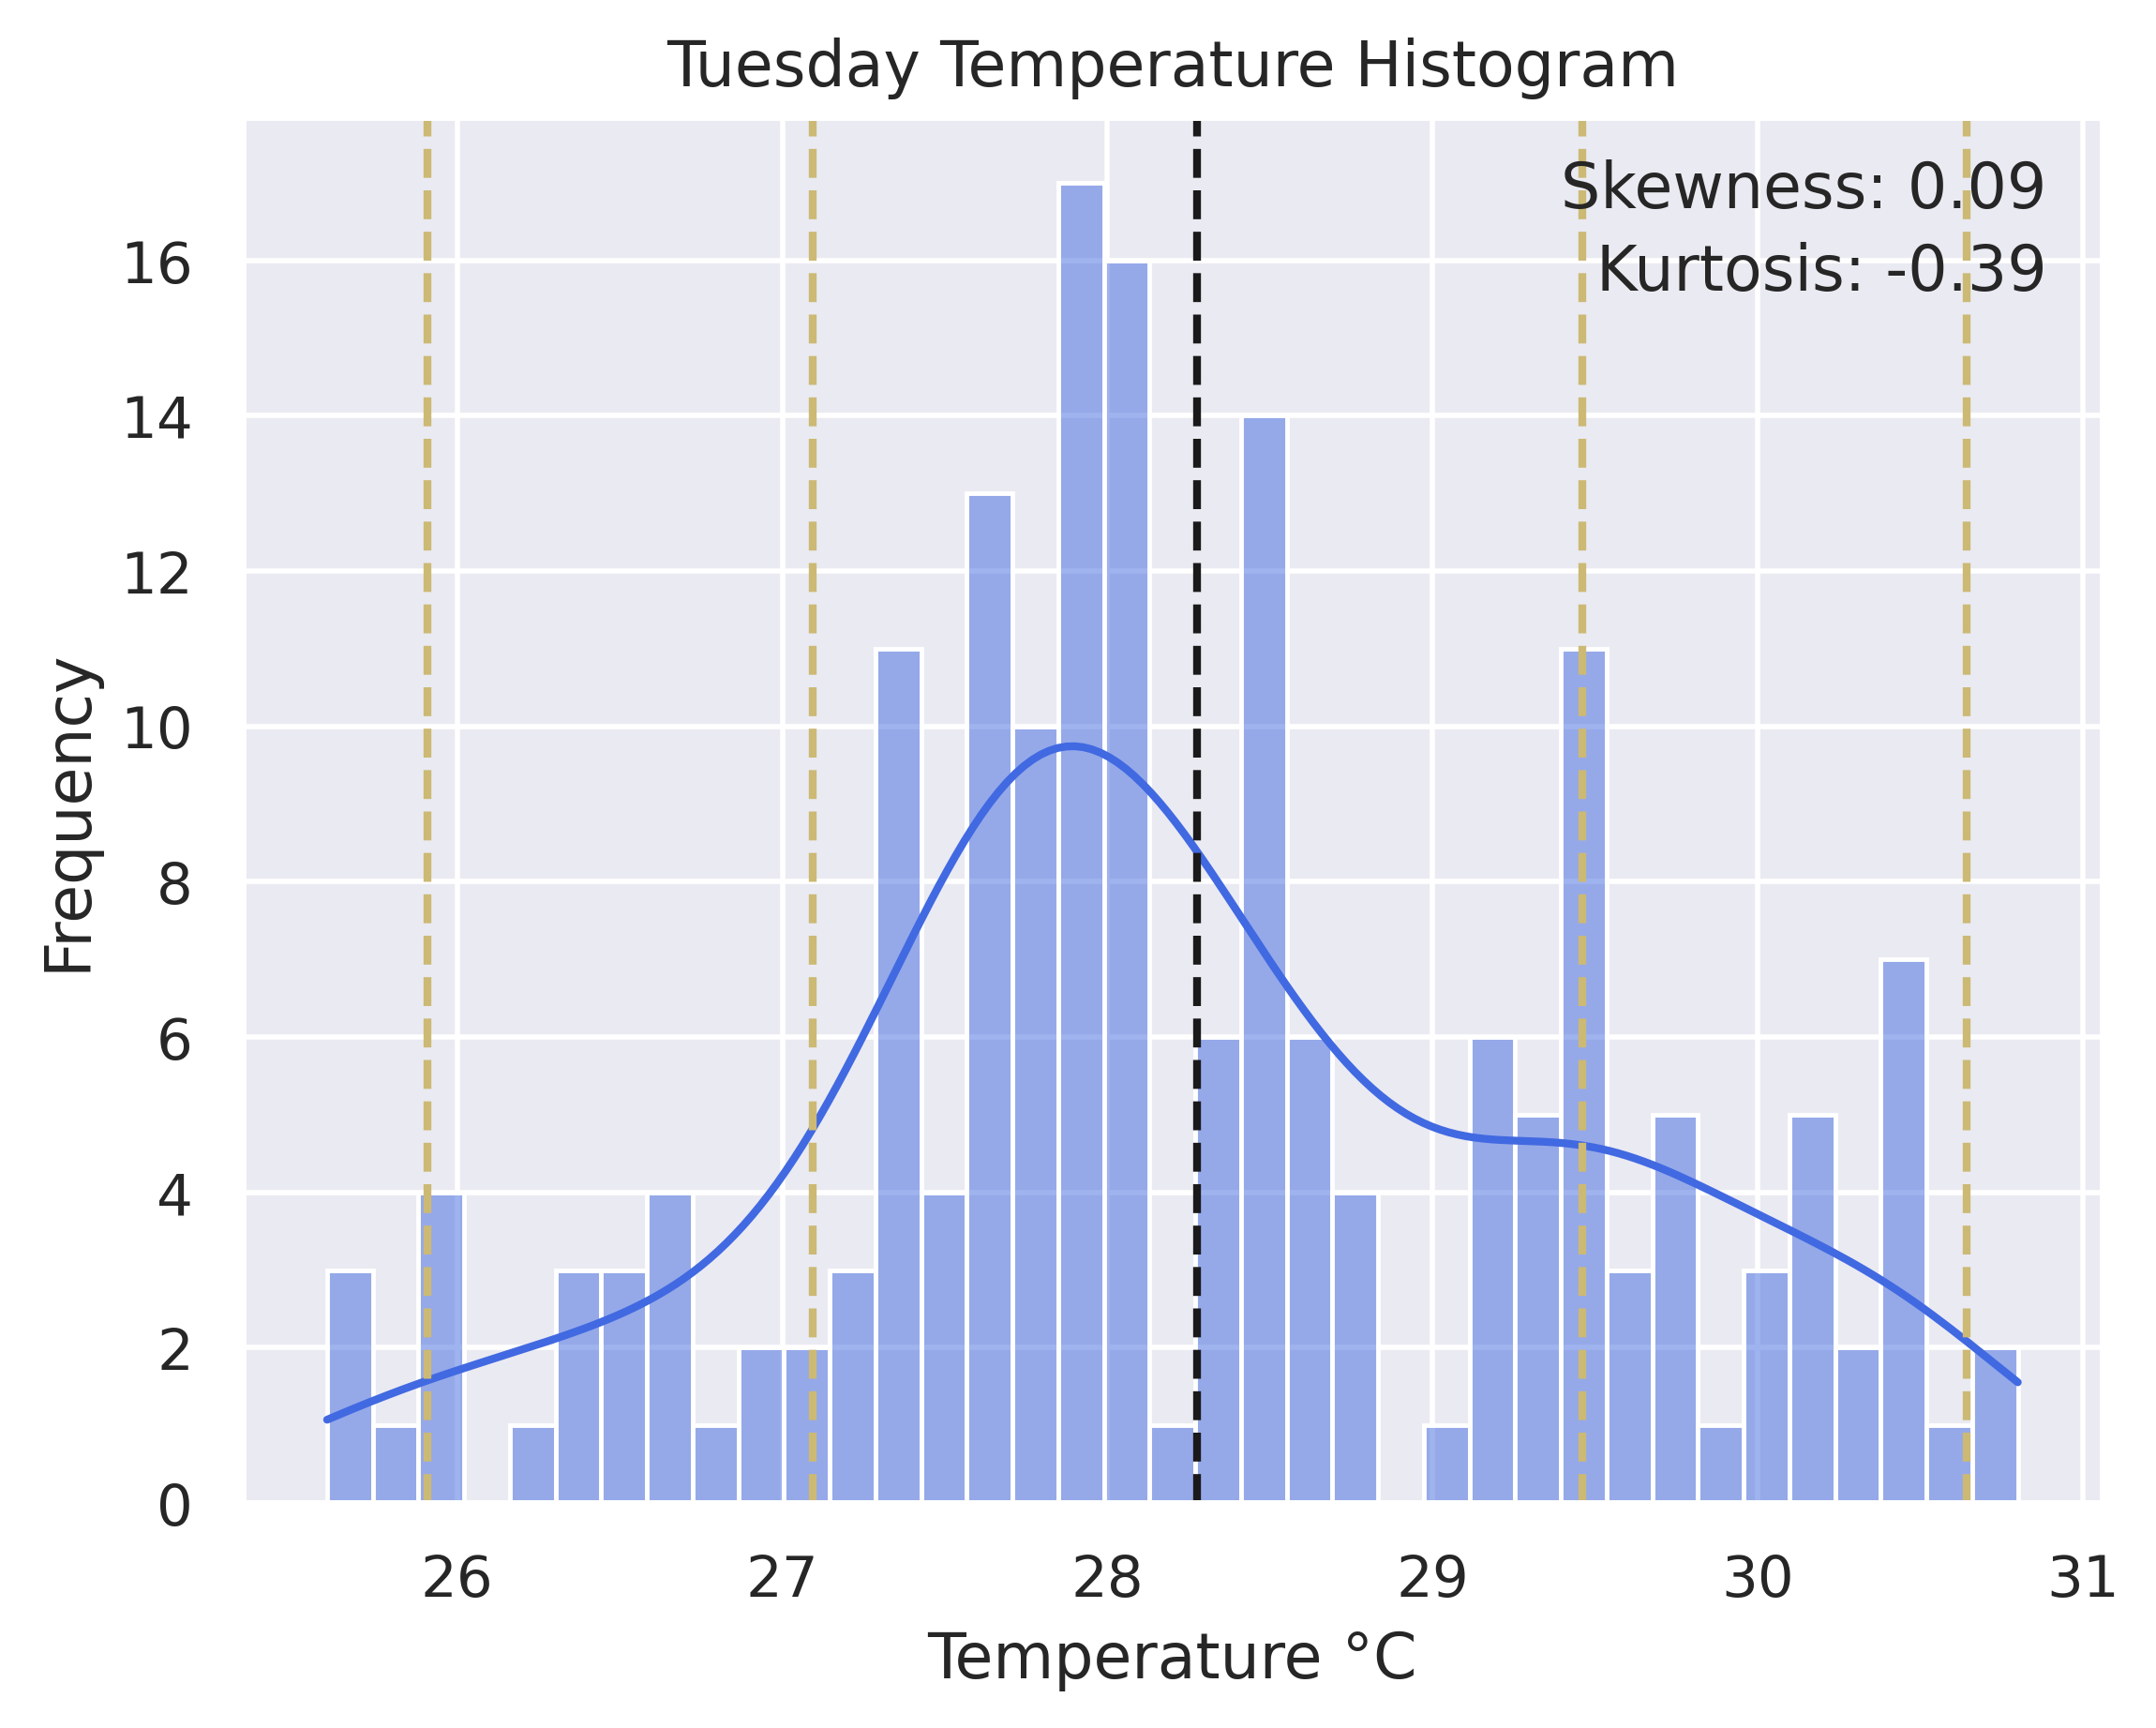

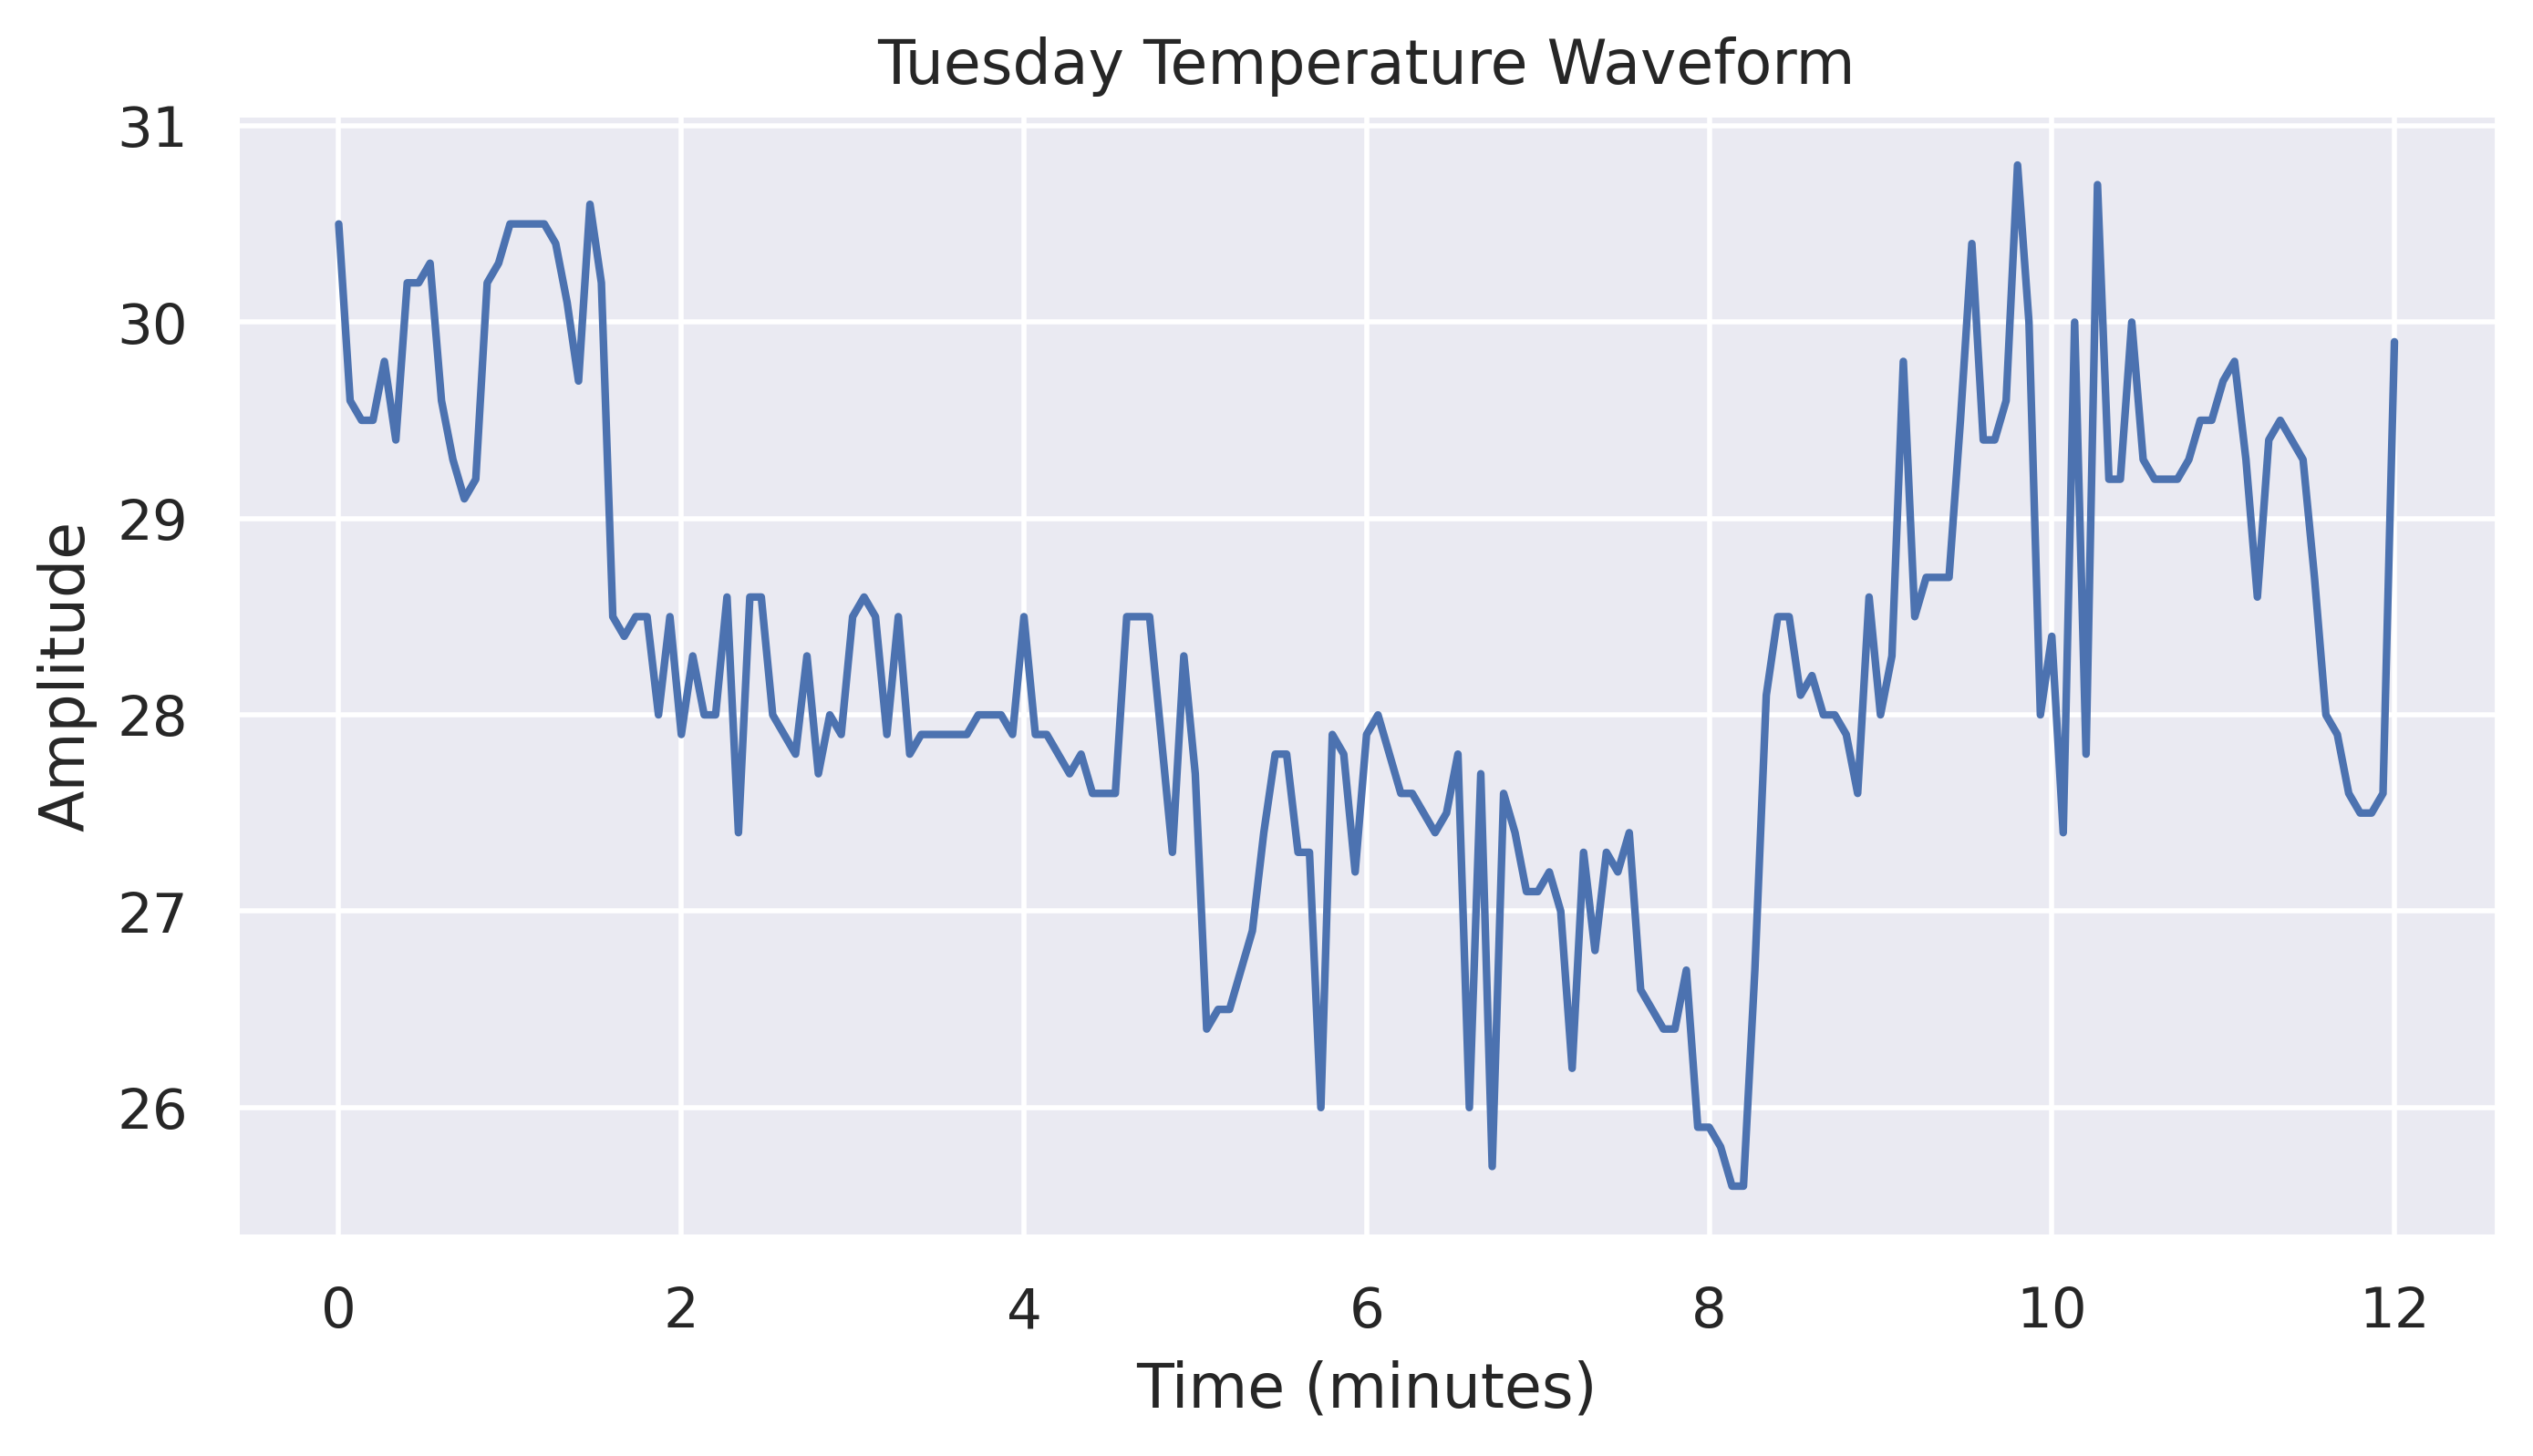

In [ ]:
# Filter the DataFrame to include only rows with Tuesdays
tuesdays_df = df[df['Date'].dt.dayofweek == 1].copy()
tuesdays_df['Time'] = tuesdays_df['Time'].dt.time
print(tuesdays_df.drop(columns=['DateTime']))

# Generate the summary statistics for the numeric columns
statsum_tue = tuesdays_df.drop(columns=['Date']).describe()
print(statsum_tue)
variance_tue = calculate_variance(tuesdays_df)
print('\nVariance (Tuesday):', variance_tue, '\n')

# Generate Histogram
generate_histogram(tuesdays_df, 'Temperature', 'Temperature °C', 'Tuesday Temperature Histogram')
print('\n')

# Generate Waveform
generate_waveform(tuesdays_df, 'Tuesday Temperature Waveform')

          Date      Time  Temperature
89  2023-10-18  15:35:45         30.3
90  2023-10-18  15:49:48         30.2
91  2023-10-18  16:03:51         29.5
96  2023-10-18  17:14:08         30.2
93  2023-10-18  16:31:58         29.9
..         ...       ...          ...
714 2023-10-25  07:05:37         27.3
713 2023-10-25  06:51:33         26.9
712 2023-10-25  06:37:28         27.0
711 2023-10-25  06:23:24         26.8
721 2023-10-25  08:44:05         27.8

[200 rows x 3 columns]
       Temperature
count   200.000000
mean     28.772000
std       0.879193
min      26.800000
25%      28.300000
50%      28.700000
75%      29.300000
max      30.900000

Variance (Wednesday): 0.769116 



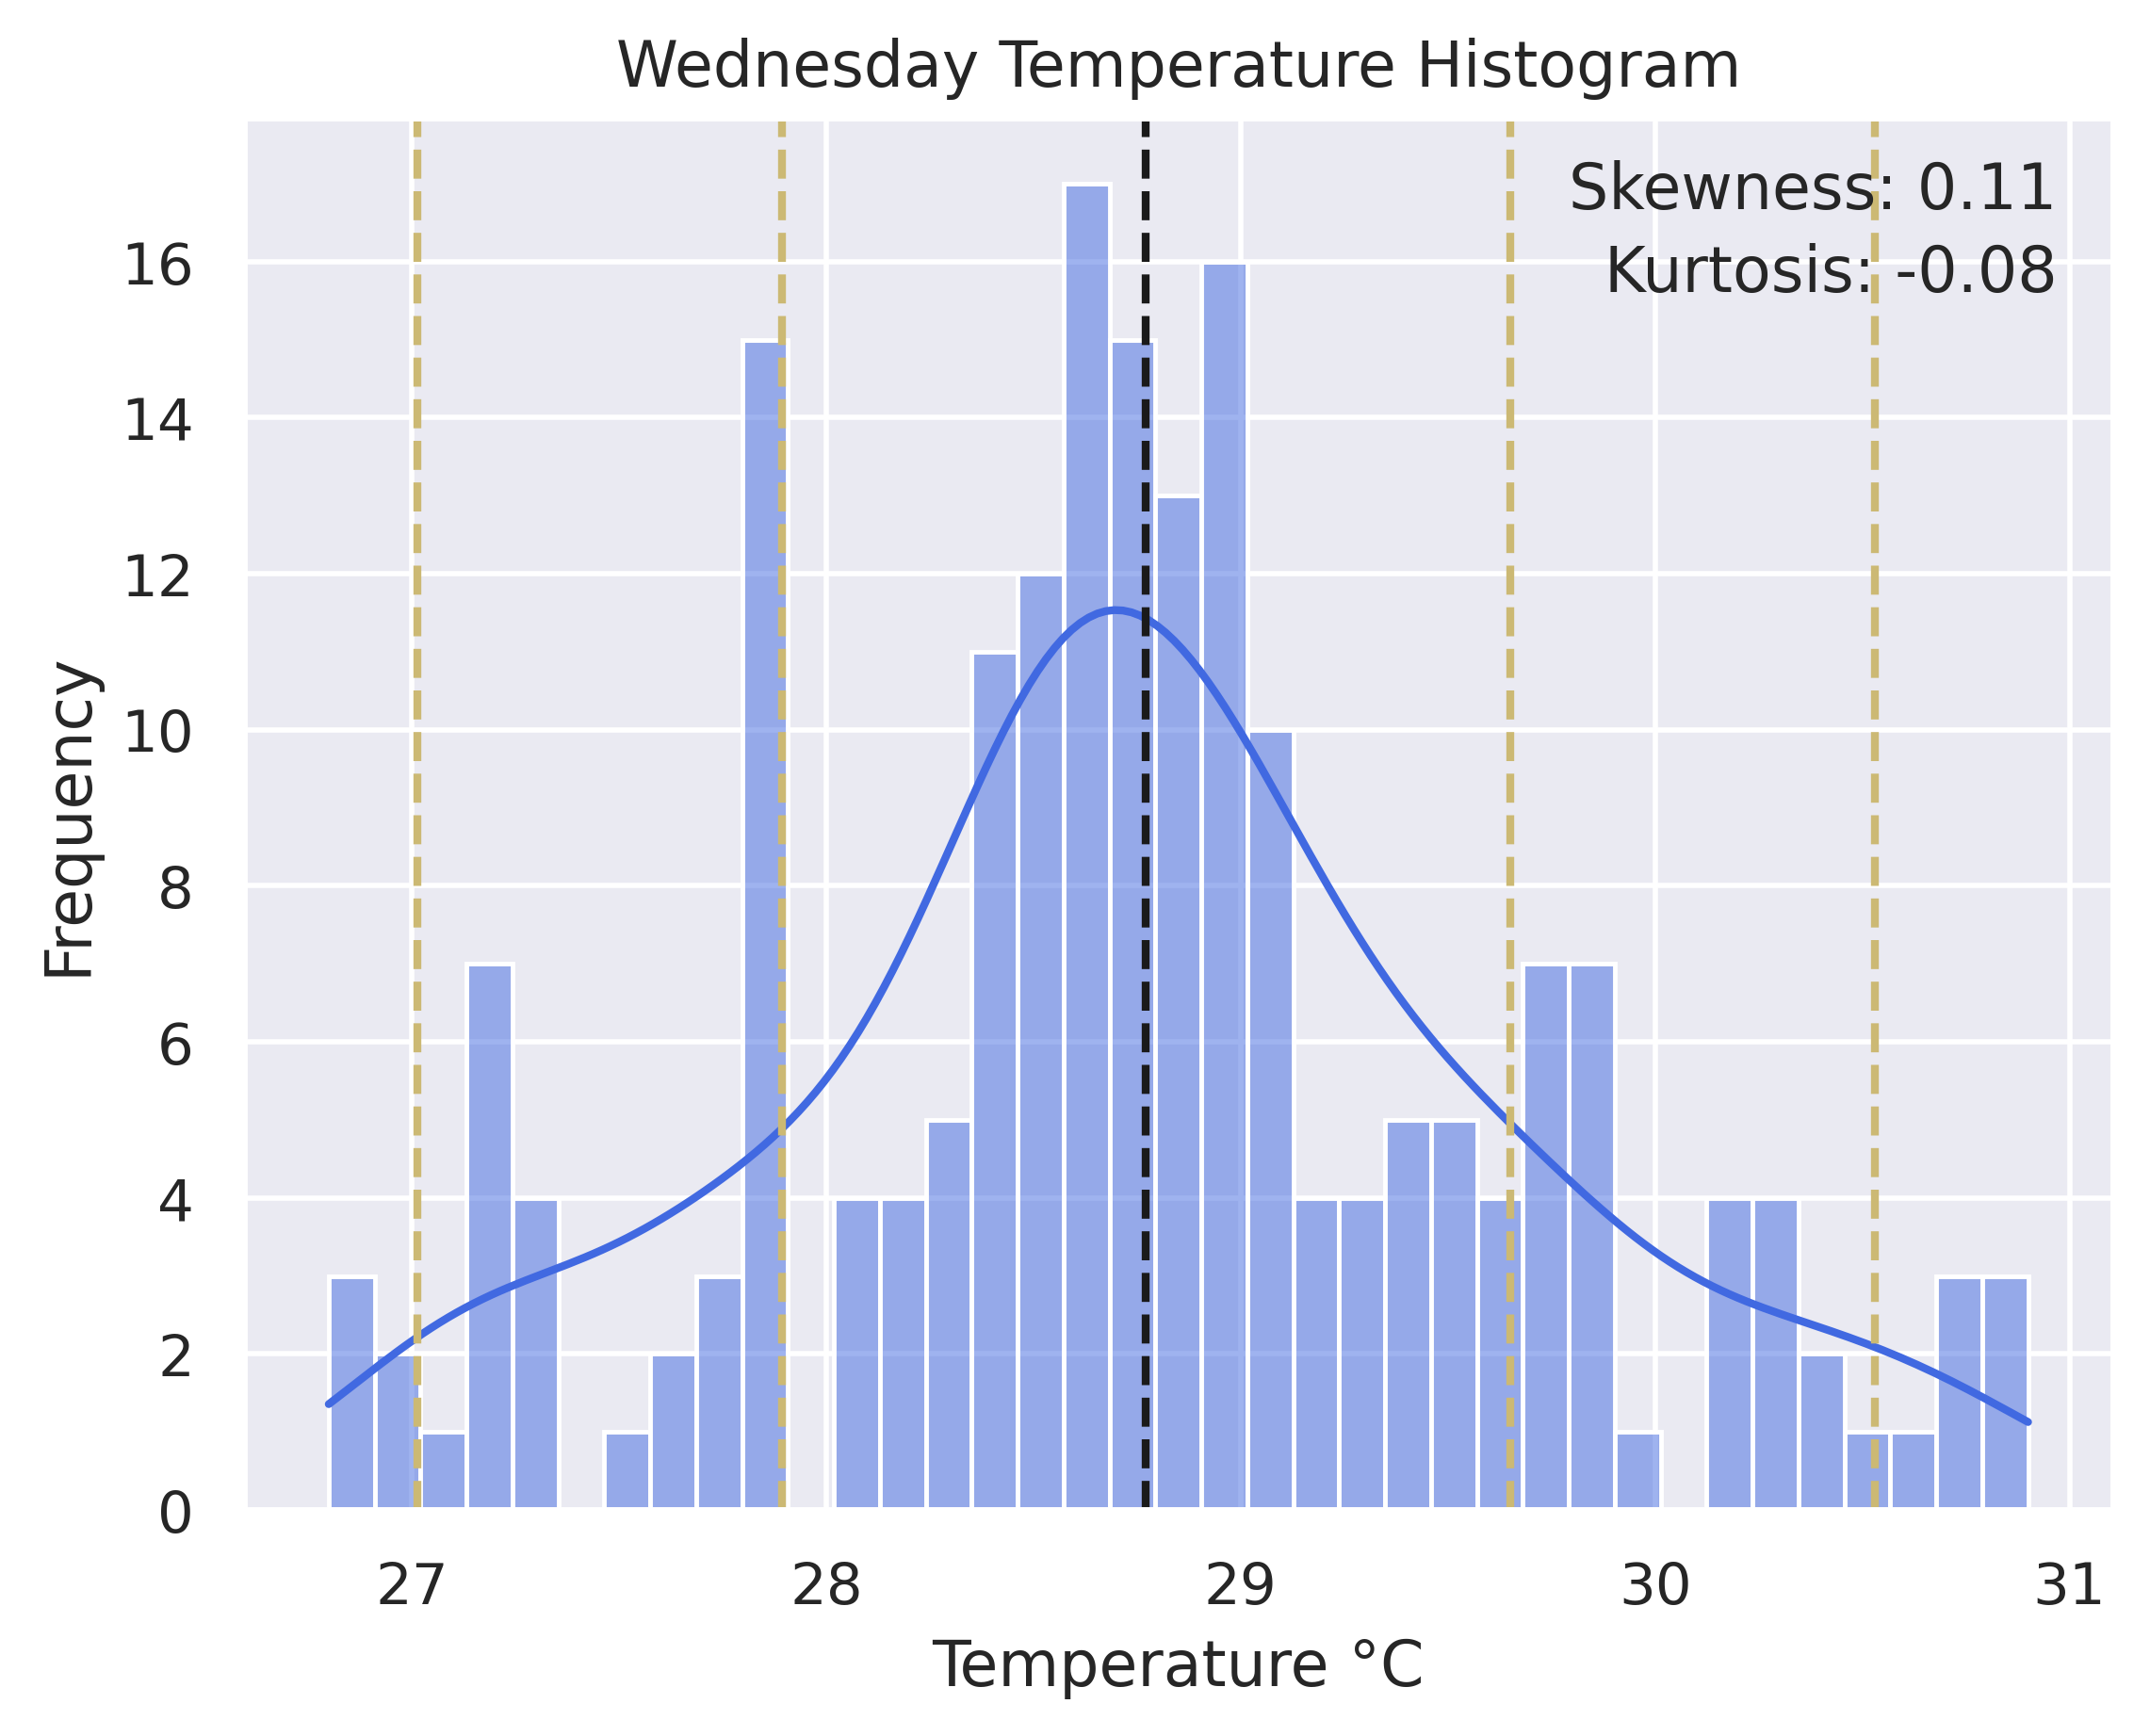

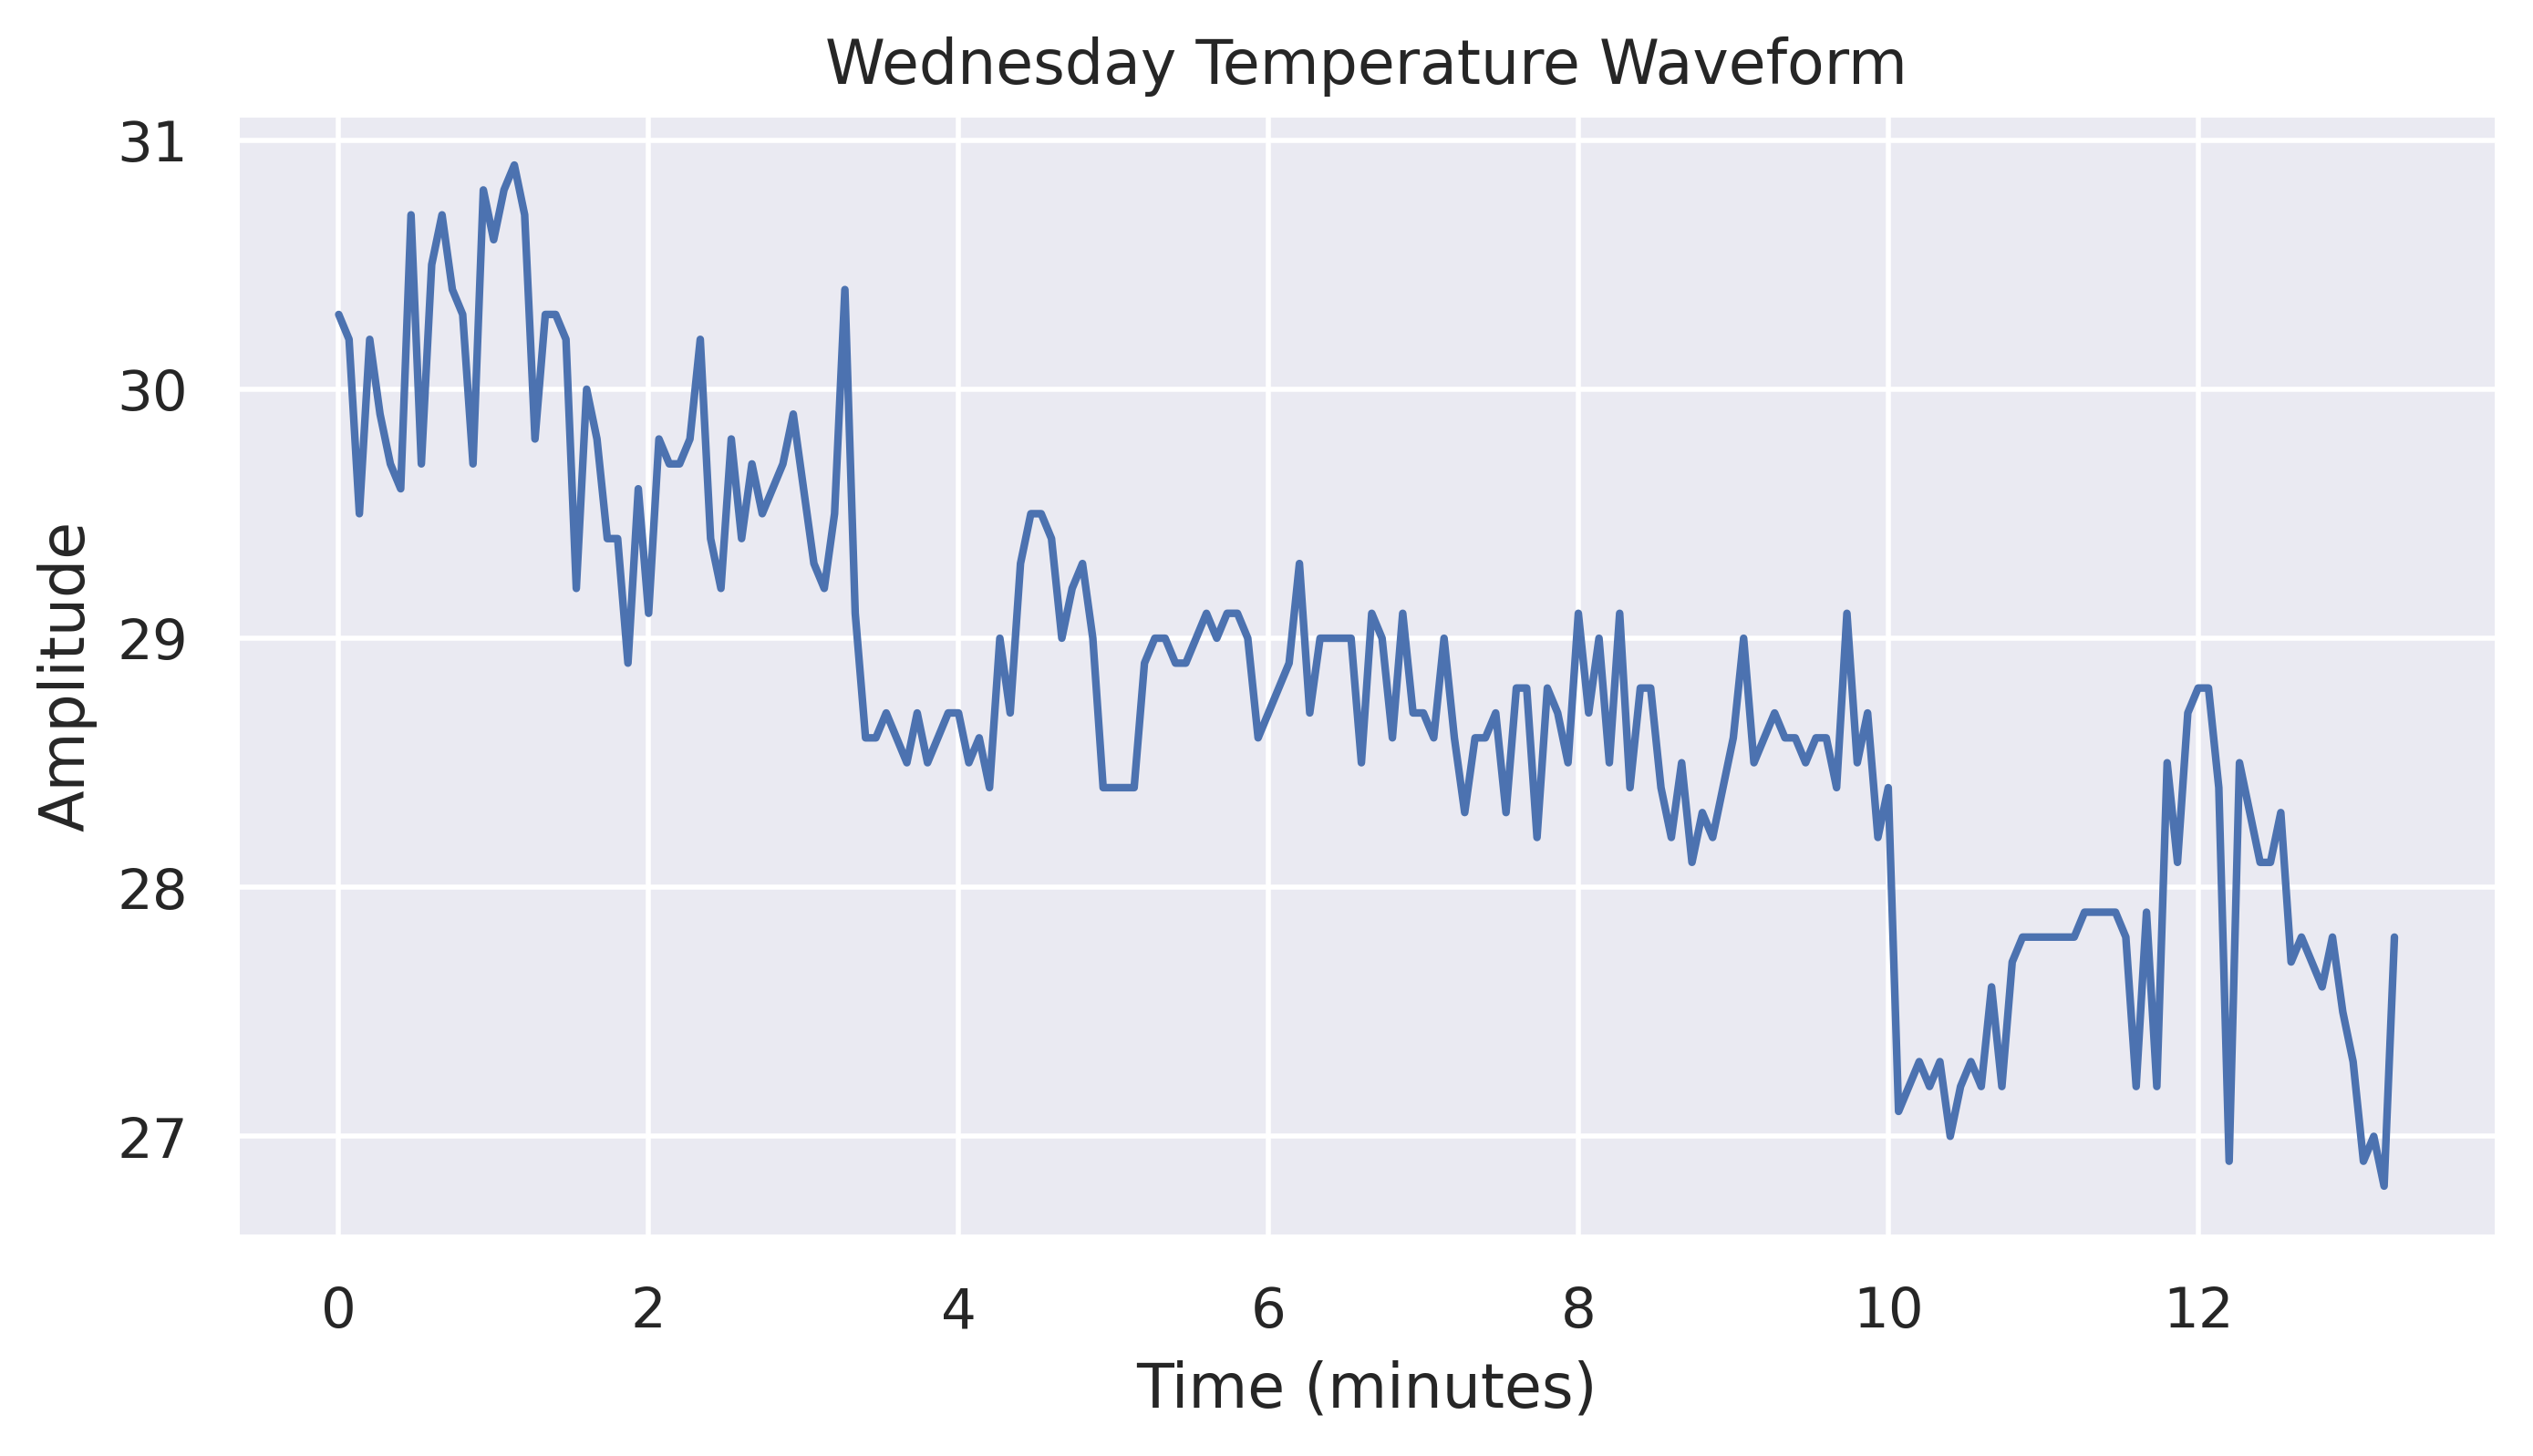

In [ ]:
# Filter the DataFrame to include only rows with Wednesdays
wednesdays_df = df[df['Date'].dt.dayofweek == 2].copy()
wednesdays_df['Time'] = wednesdays_df['Time'].dt.time
print(wednesdays_df.drop(columns=['DateTime']))

# Generate the summary statistics for the numeric columns
statsum_wed = wednesdays_df.drop(columns=['Date']).describe()
print(statsum_wed)
variance_wed = calculate_variance(wednesdays_df)
print('\nVariance (Wednesday):', variance_wed, '\n')

# Generate Histogram
generate_histogram(wednesdays_df, 'Temperature', 'Temperature °C', 'Wednesday Temperature Histogram')
print('\n')

# Generate Waveform
generate_waveform(wednesdays_df, 'Wednesday Temperature Waveform')

          Date      Time  Temperature
198 2023-10-19  17:50:51         28.4
189 2023-10-19  15:44:23         28.5
197 2023-10-19  17:36:47         28.0
196 2023-10-19  17:22:44         28.3
195 2023-10-19  17:08:42         28.4
..         ...       ...          ...
818 2023-10-26  07:57:22         27.1
819 2023-10-26  08:11:28         27.5
820 2023-10-26  08:25:33         27.6
821 2023-10-26  08:39:37         27.7
817 2023-10-26  07:43:18         27.4

[204 rows x 3 columns]
       Temperature
count   204.000000
mean     28.531863
std       0.666595
min      26.600000
25%      28.275000
50%      28.600000
75%      29.000000
max      30.000000

Variance (Thursday): 0.44217103998462115 



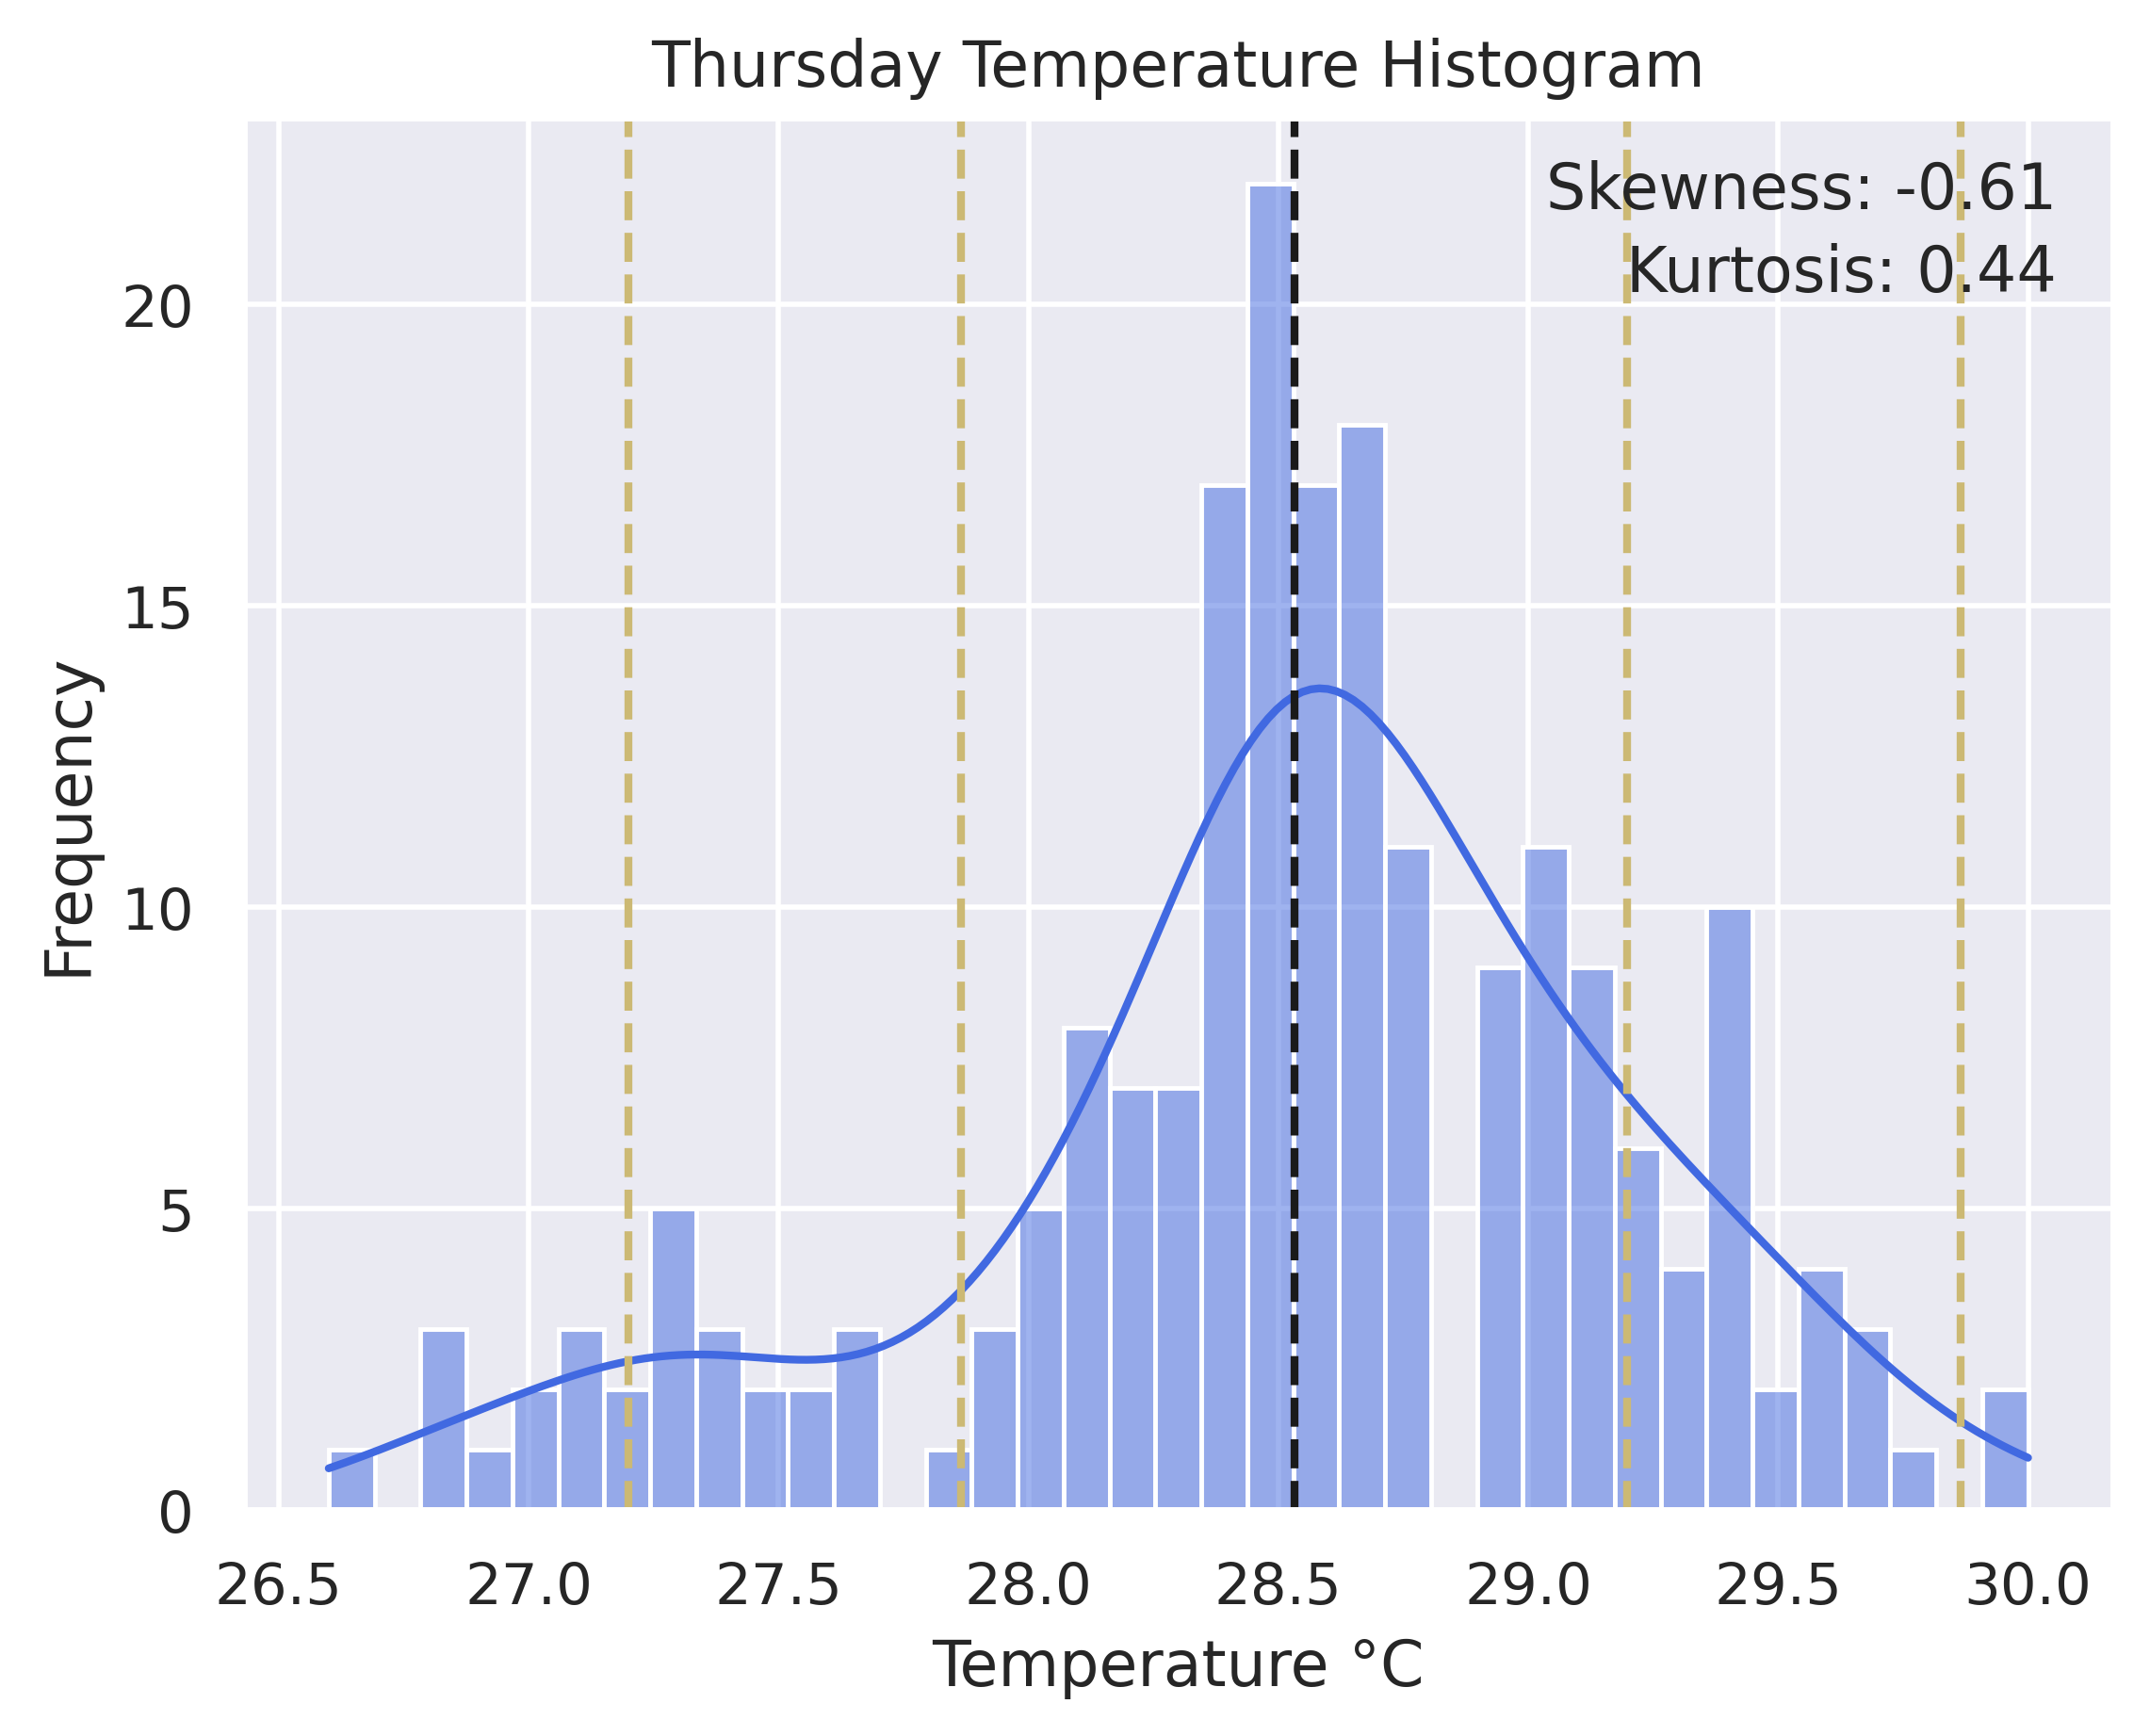

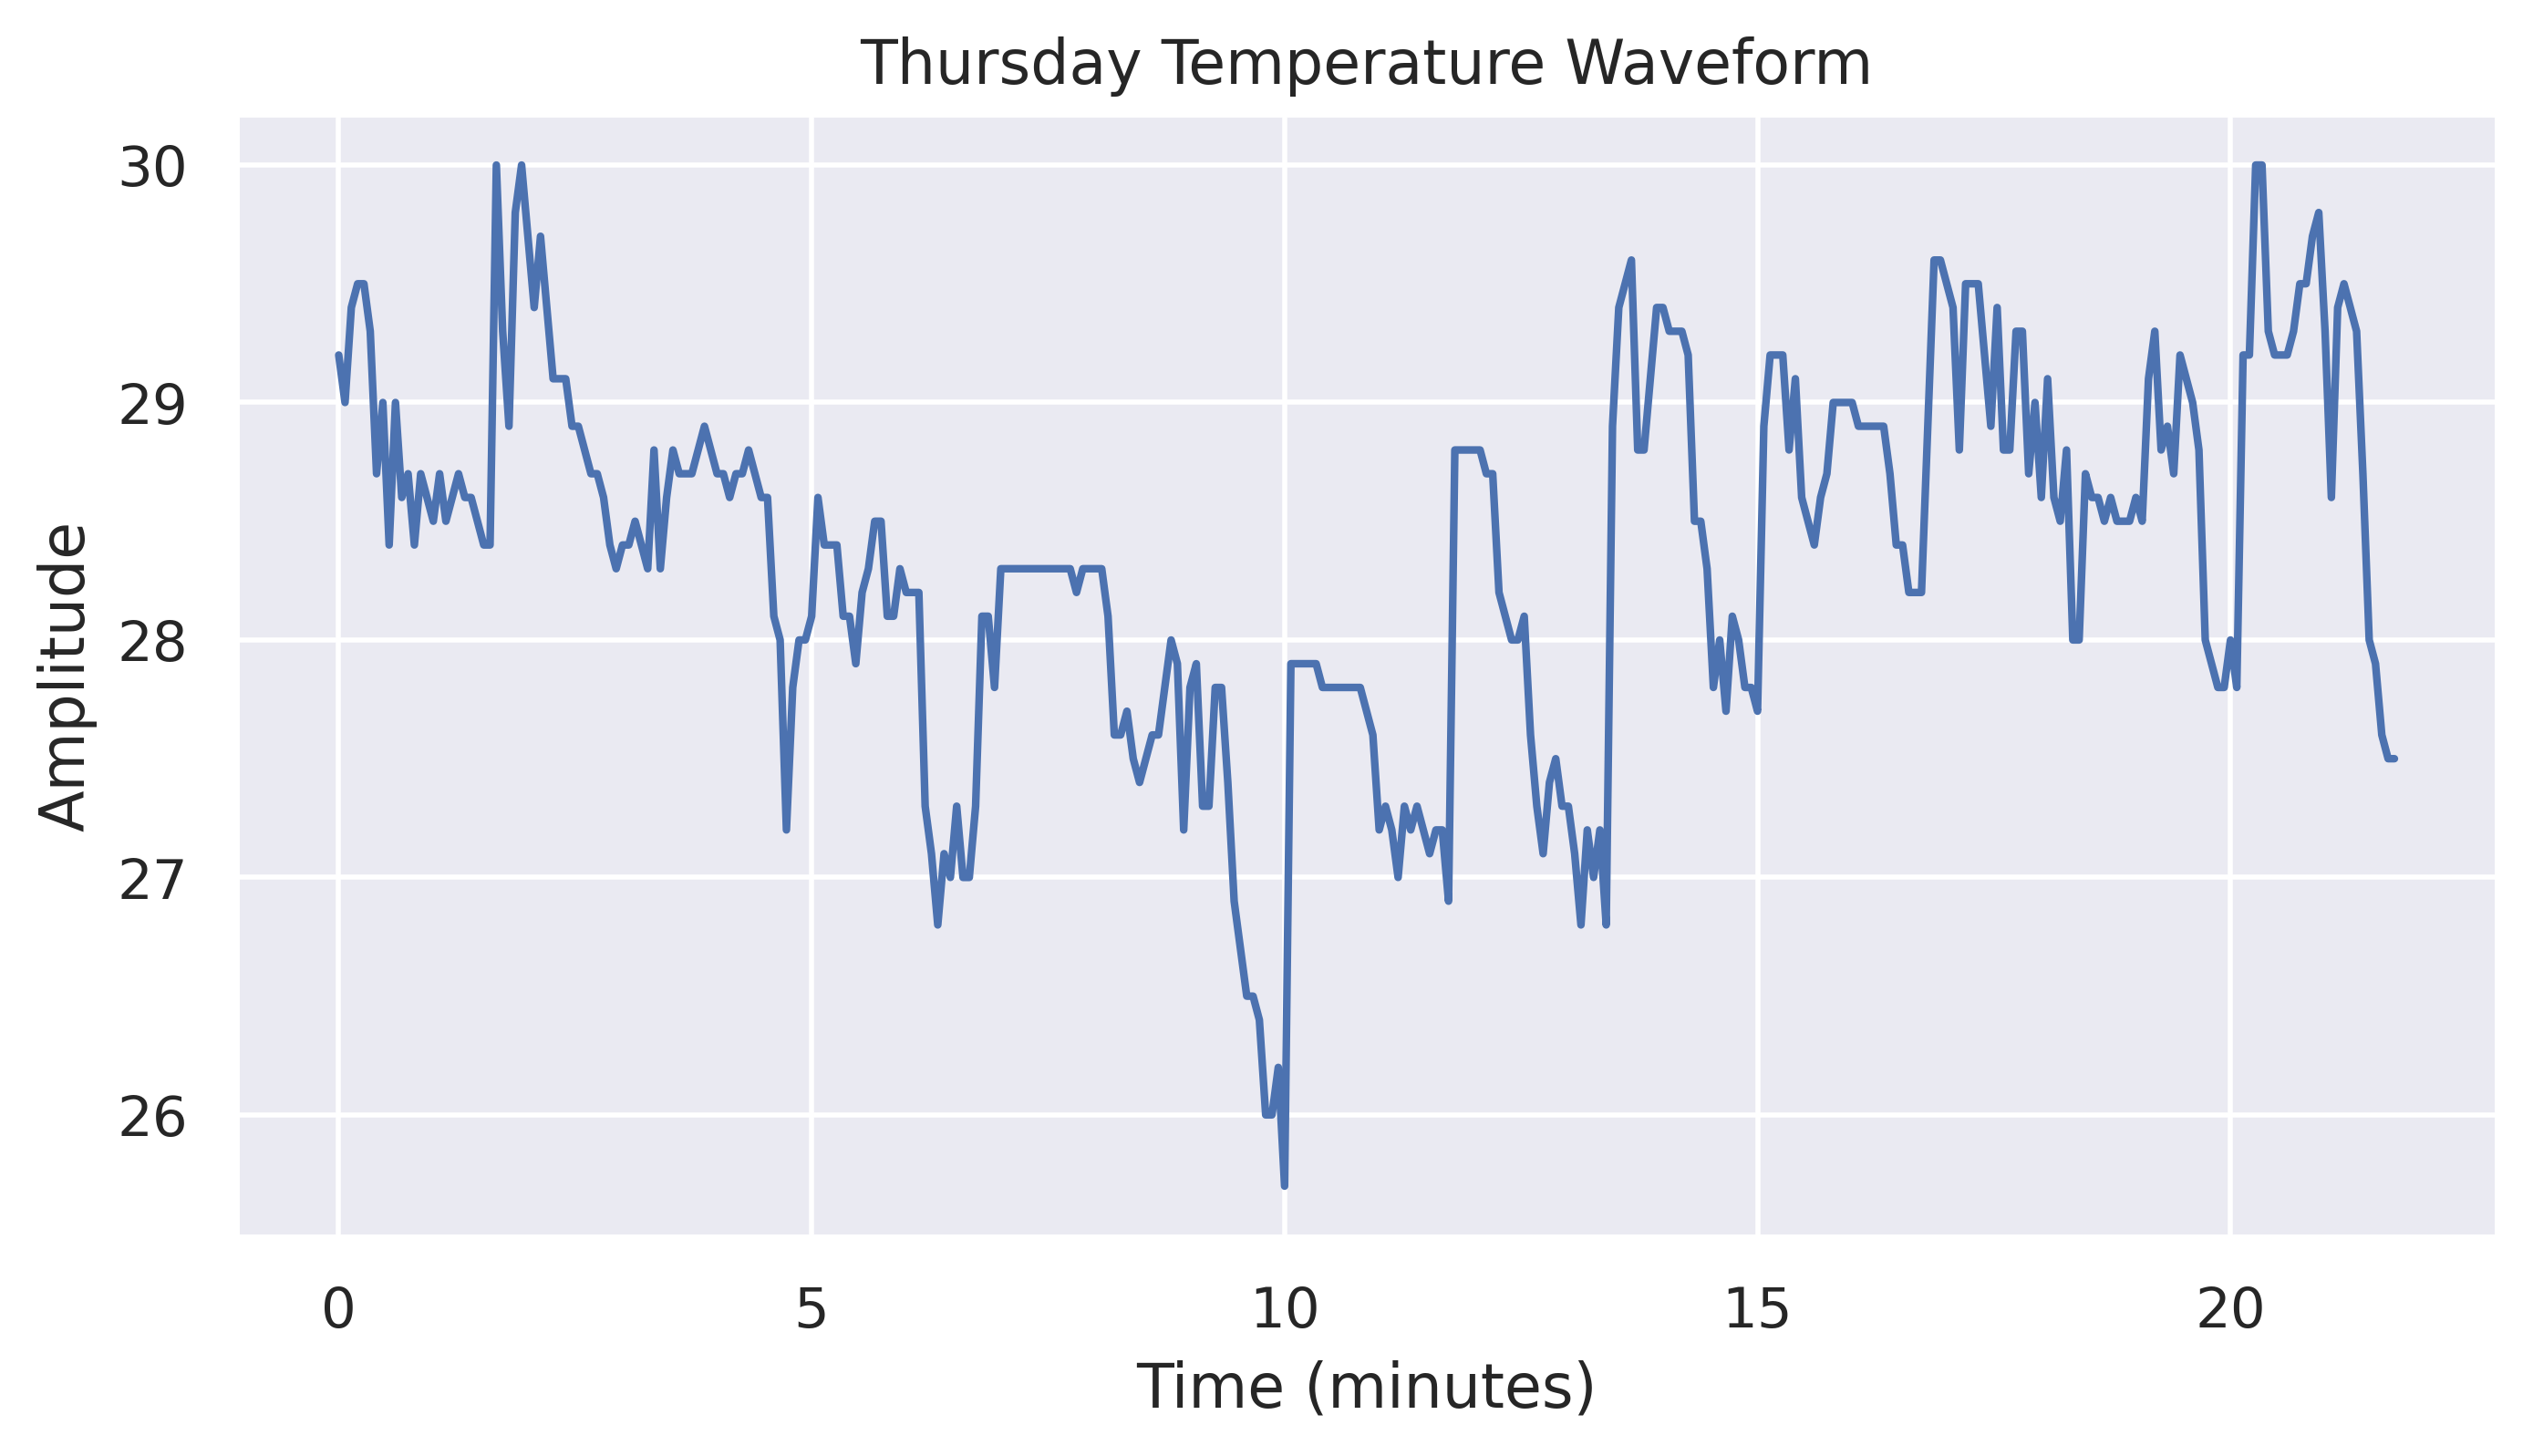

In [ ]:
# Filter the DataFrame to include only rows with Thursdays
thursdays_df = df[df['Date'].dt.dayofweek == 3].copy()
thursdays_df['Time'] = thursdays_df['Time'].dt.time
print(thursdays_df.drop(columns=['DateTime']))

# Generate the summary statistics for the numeric columns
statsum_thu = thursdays_df.drop(columns=['Date']).describe()
print(statsum_thu)
variance_thu = calculate_variance(thursdays_df)
print('\nVariance (Thursday):', variance_thu, '\n')

# Generate Histogram
generate_histogram(thursdays_df, 'Temperature', 'Temperature °C', 'Thursday Temperature Histogram')
print('\n')

# Generate Waveform
generate_waveform(early_morning_df, 'Thursday Temperature Waveform')

          Date      Time  Temperature
280 2023-10-20  14:01:39         29.3
286 2023-10-20  15:26:01         28.9
284 2023-10-20  14:57:55         28.9
283 2023-10-20  14:43:52         28.9
282 2023-10-20  14:29:48         29.2
..         ...       ...          ...
913 2023-10-27  06:28:35         27.6
919 2023-10-27  07:53:01         28.3
920 2023-10-27  08:07:04         28.4
921 2023-10-27  08:21:09         28.4
918 2023-10-27  07:38:57         28.3

[185 rows x 3 columns]
       Temperature
count   185.000000
mean     28.614595
std       0.456181
min      27.600000
25%      28.300000
50%      28.600000
75%      28.900000
max      29.900000

Variance (Friday): 0.20697618699780862 



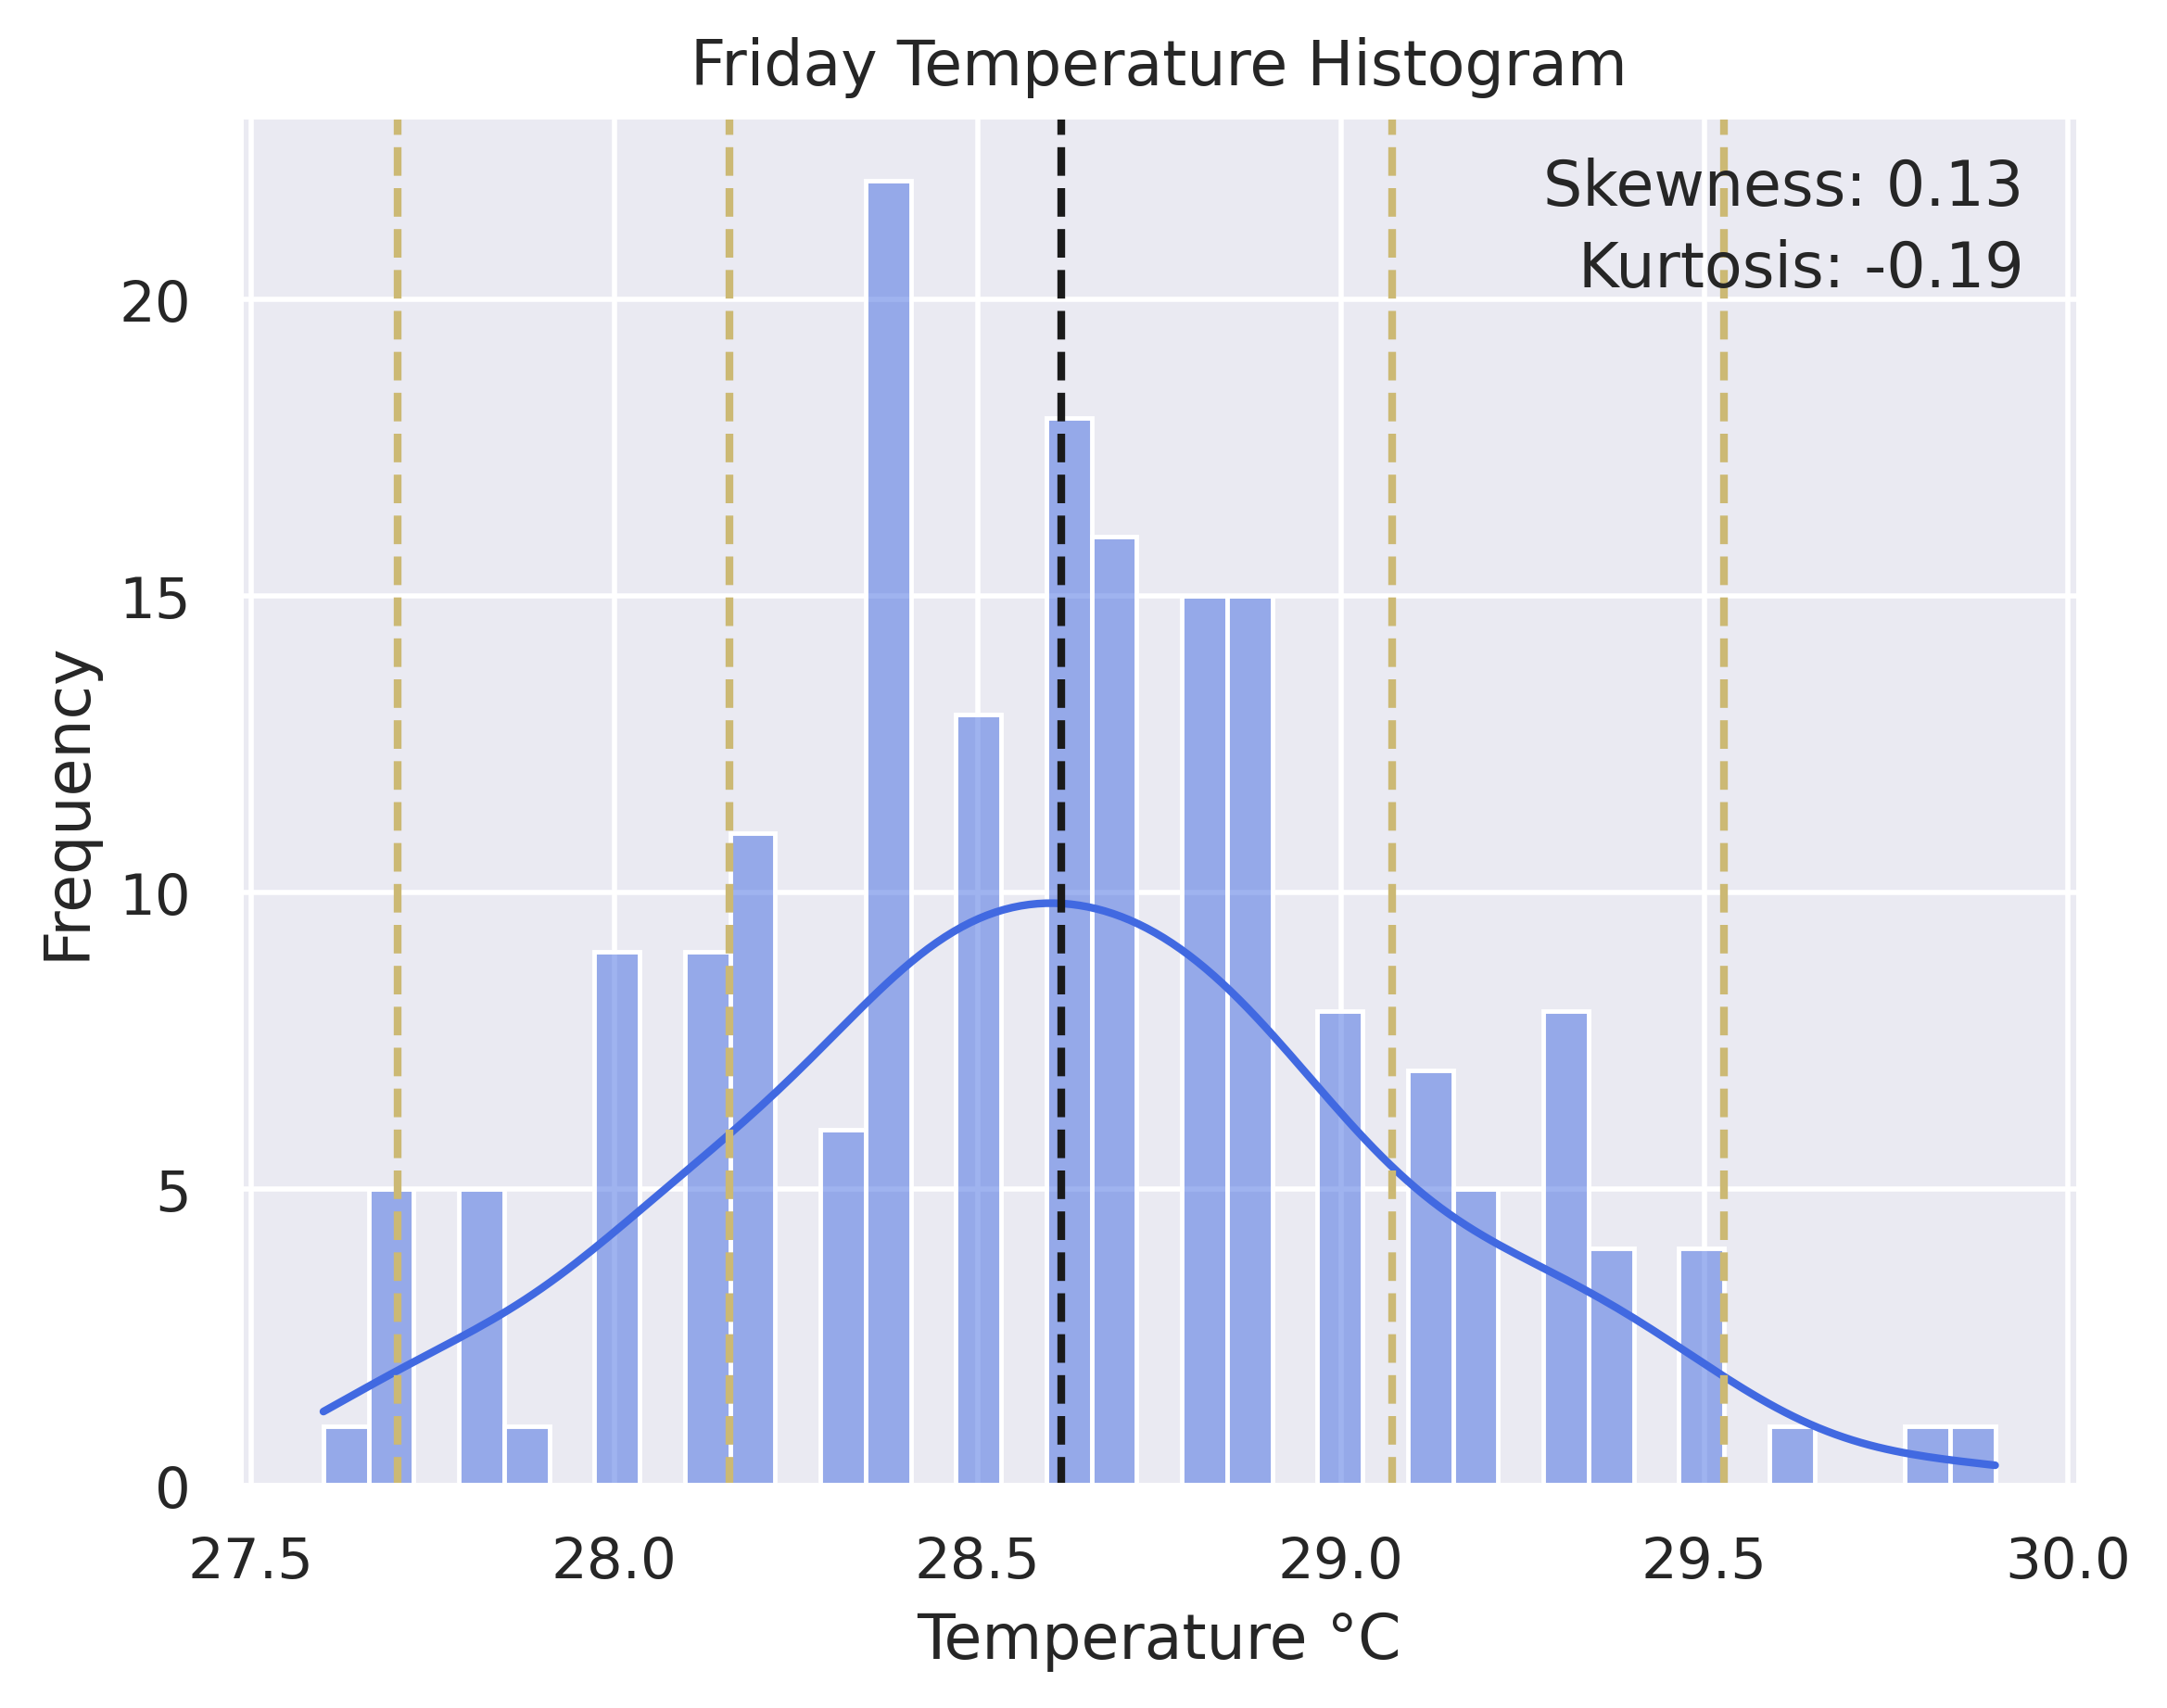

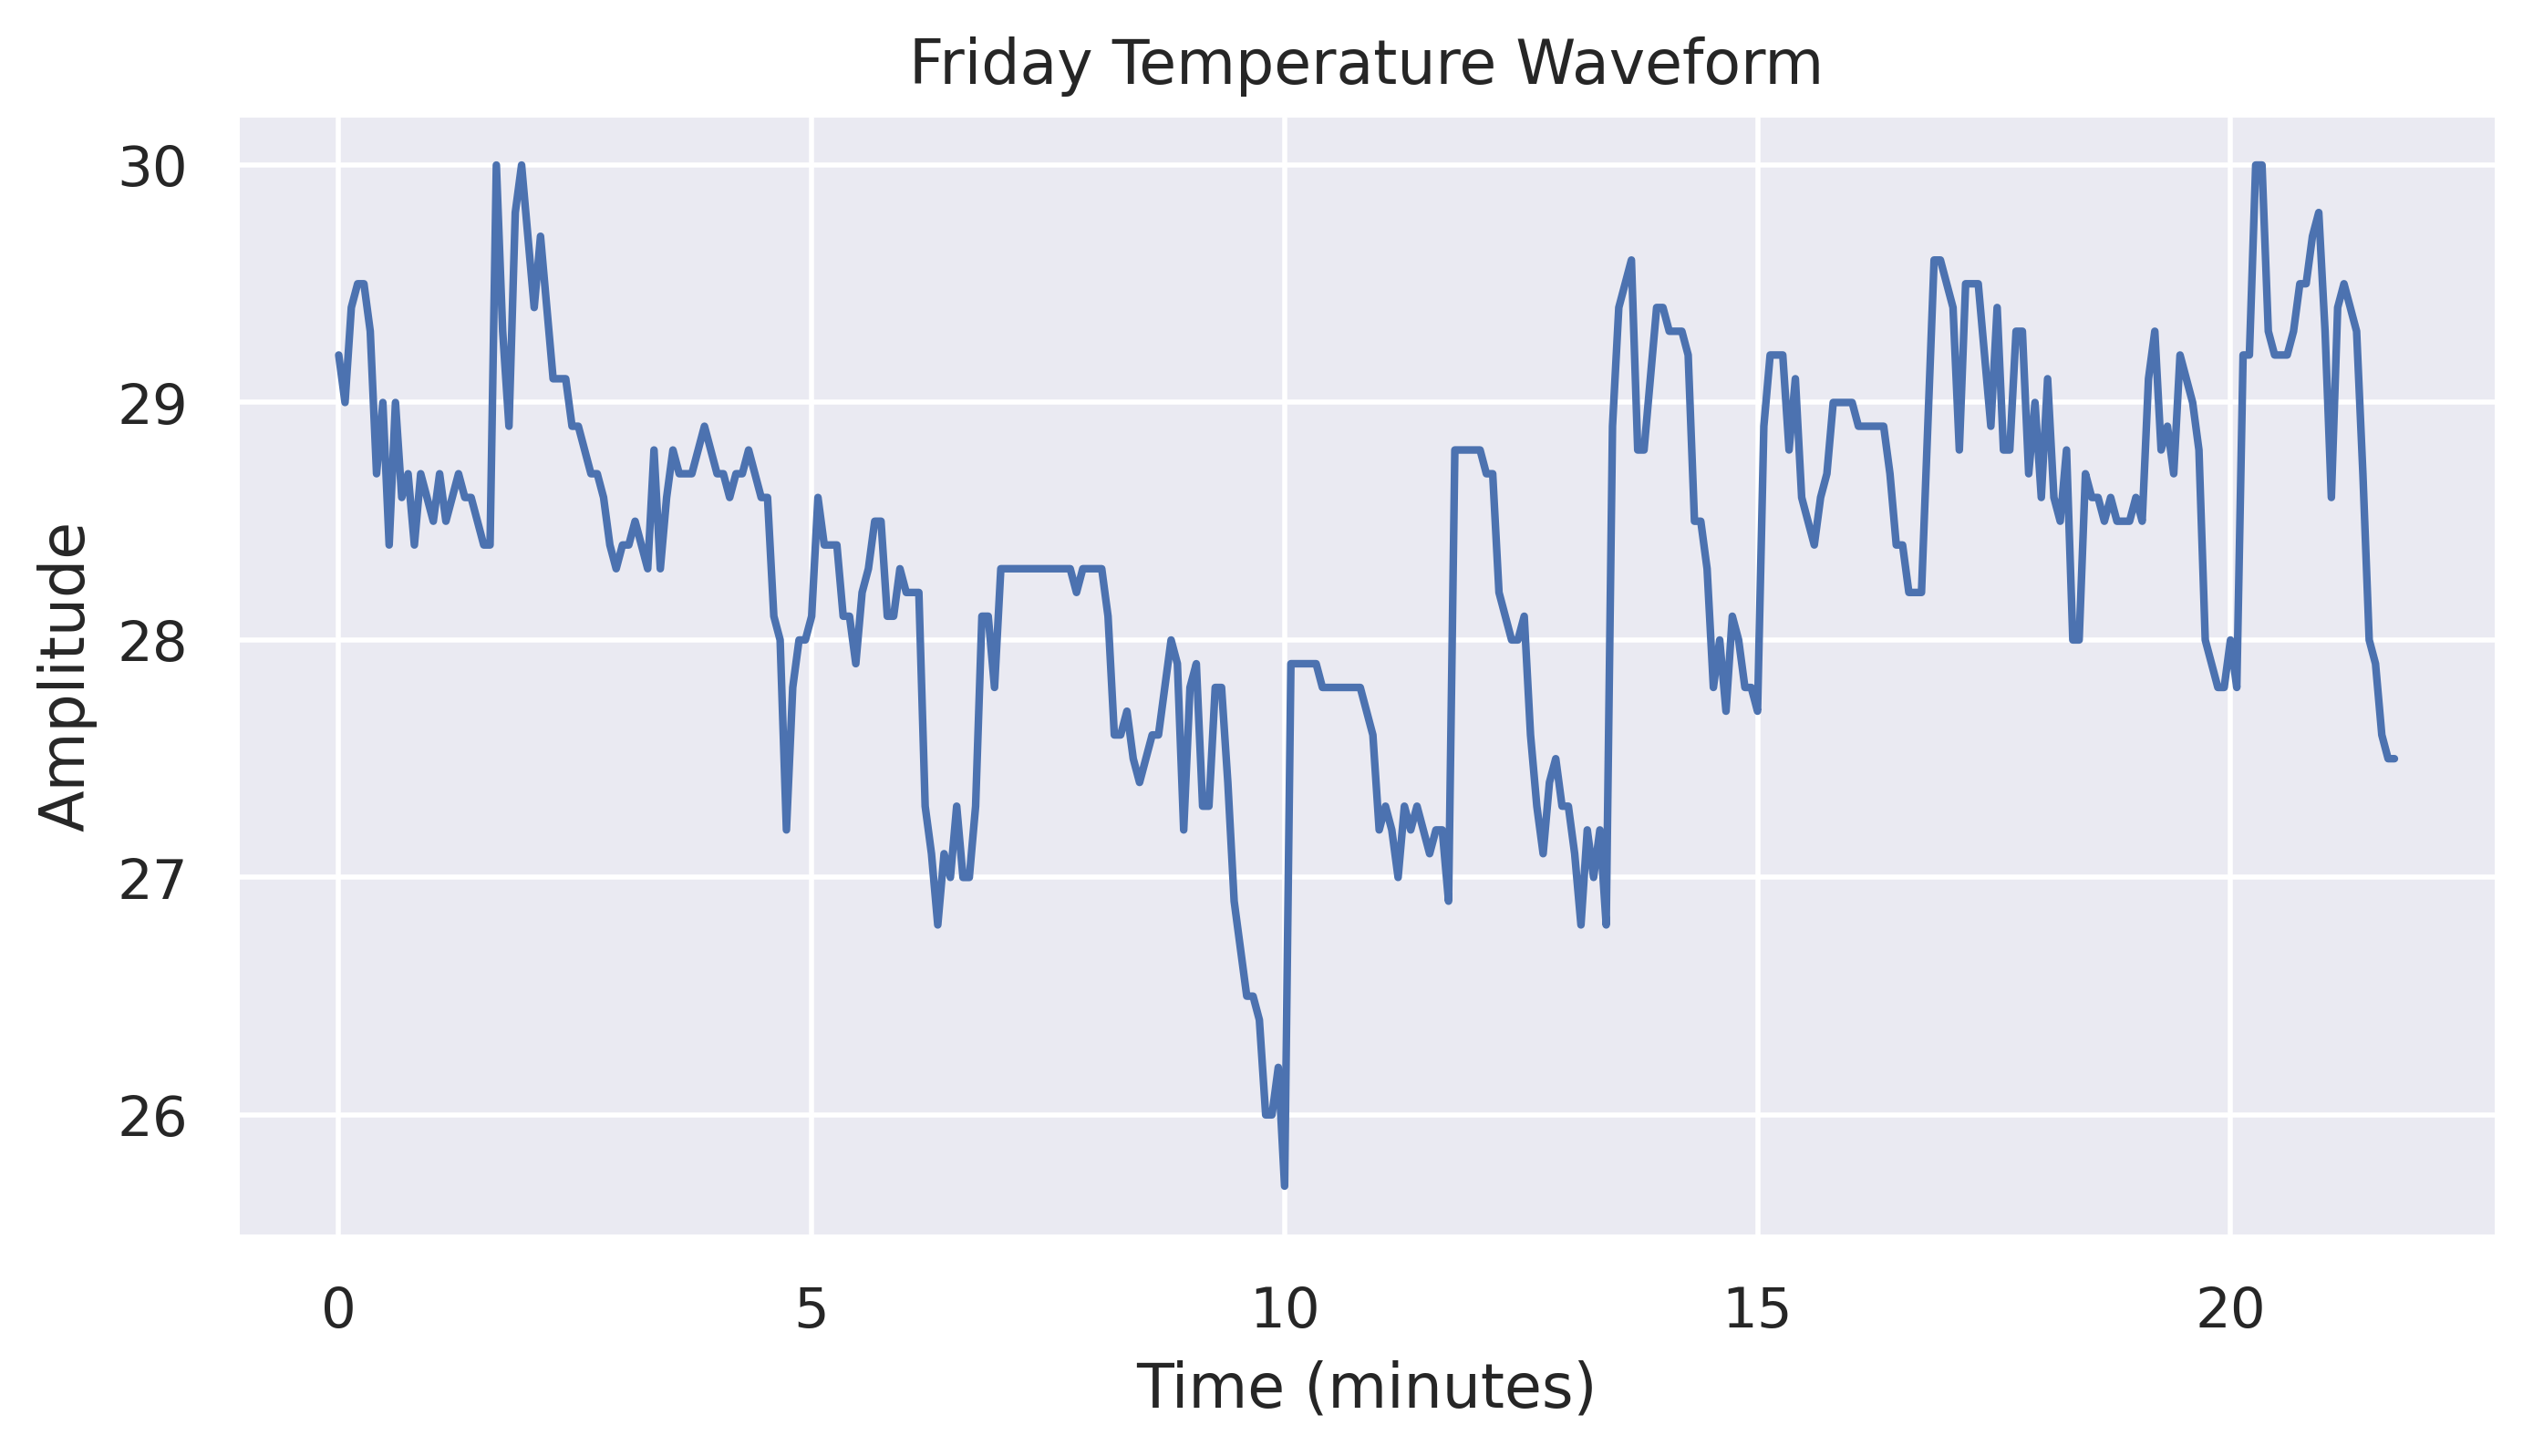

In [ ]:
# Filter the DataFrame to include only rows with Fridays
fridays_df = df[df['Date'].dt.dayofweek == 4].copy()
fridays_df['Time'] = fridays_df['Time'].dt.time
print(fridays_df.drop(columns=['DateTime']))

# Generate the summary statistics for the numeric columns
statsum_fri = fridays_df.drop(columns=['Date']).describe()
print(statsum_fri)
variance_fri = calculate_variance(fridays_df)
print('\nVariance (Friday):', variance_fri, '\n')

# Generate Histogram
generate_histogram(fridays_df, 'Temperature', 'Temperature °C', 'Friday Temperature Histogram')
print('\n')

# Generate Waveform
generate_waveform(early_morning_df, 'Friday Temperature Waveform')

           Date      Time  Temperature
368  2023-10-21  18:51:15         28.6
367  2023-10-21  18:37:12         28.7
366  2023-10-21  18:23:09         28.6
365  2023-10-21  18:09:07         28.6
364  2023-10-21  17:55:04         28.1
...         ...       ...          ...
1018 2023-10-28  07:06:19         27.9
1017 2023-10-28  06:52:15         27.7
1016 2023-10-28  06:38:11         28.0
1015 2023-10-28  06:24:06         28.1
1025 2023-10-28  08:44:48         27.9

[183 rows x 3 columns]
       Temperature
count   183.000000
mean     28.679235
std       0.593005
min      27.200000
25%      28.200000
50%      28.600000
75%      29.100000
max      30.300000

Variance (Saturday): 0.34973274806652926 



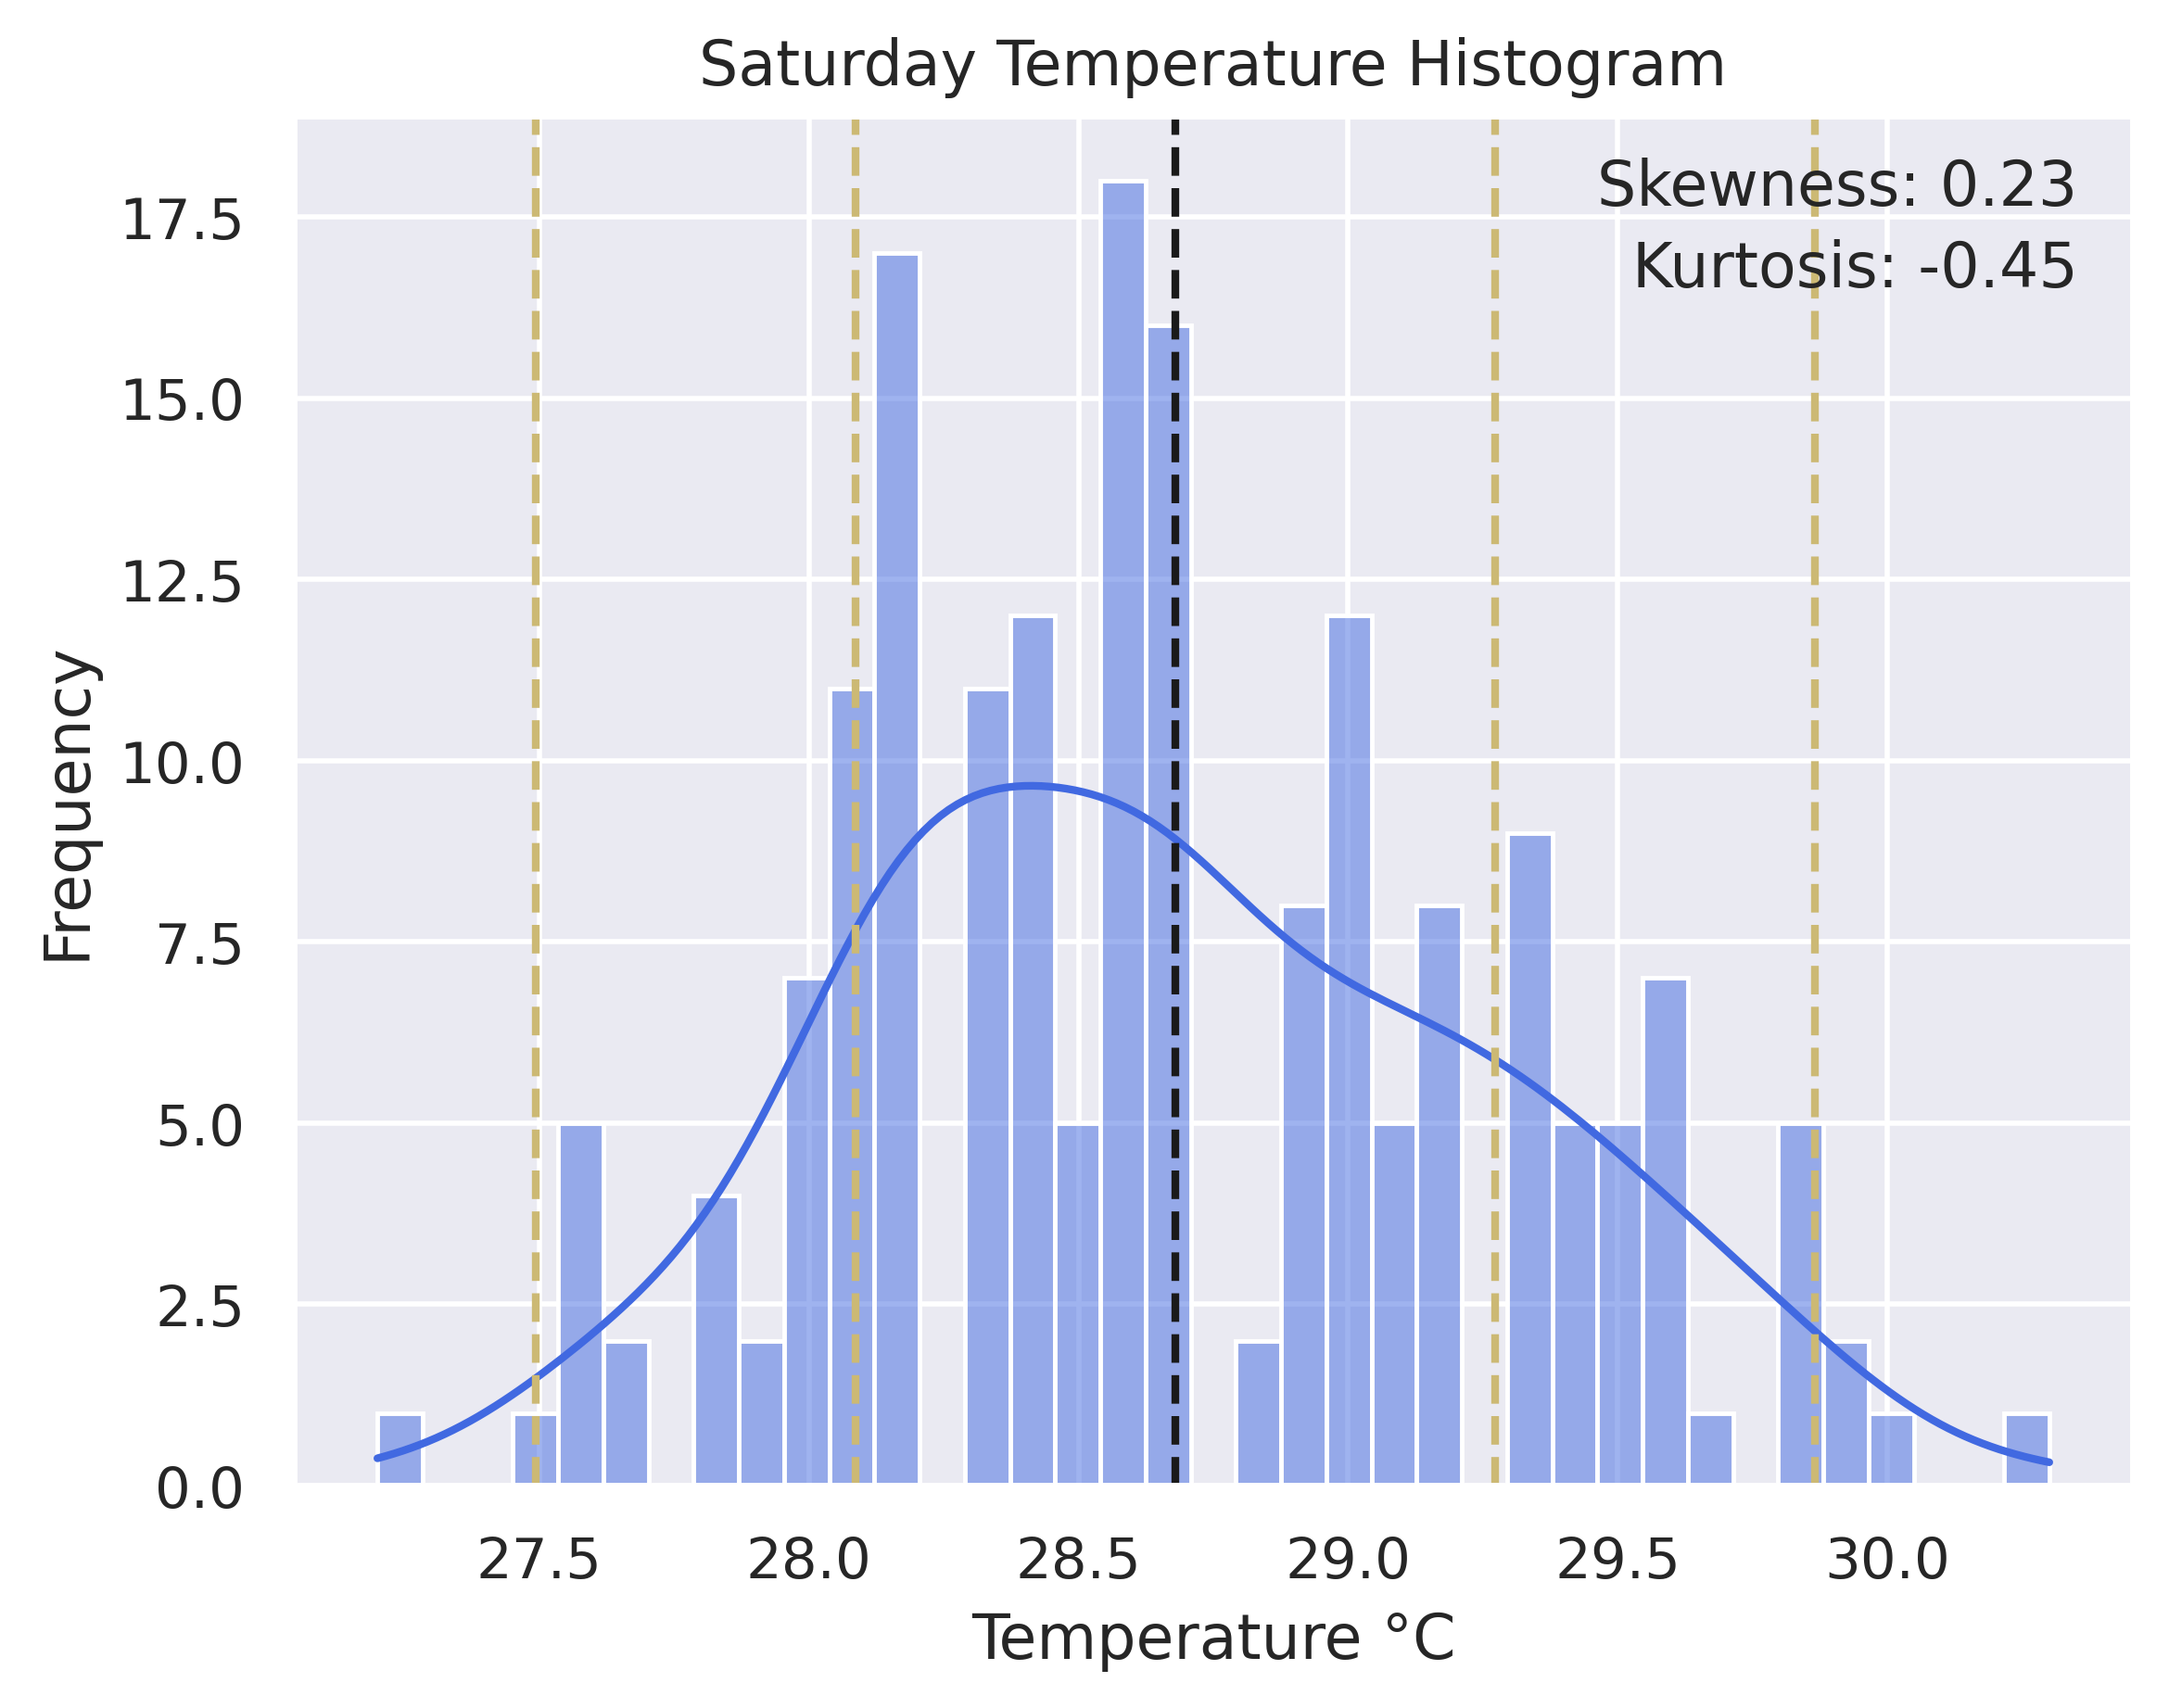

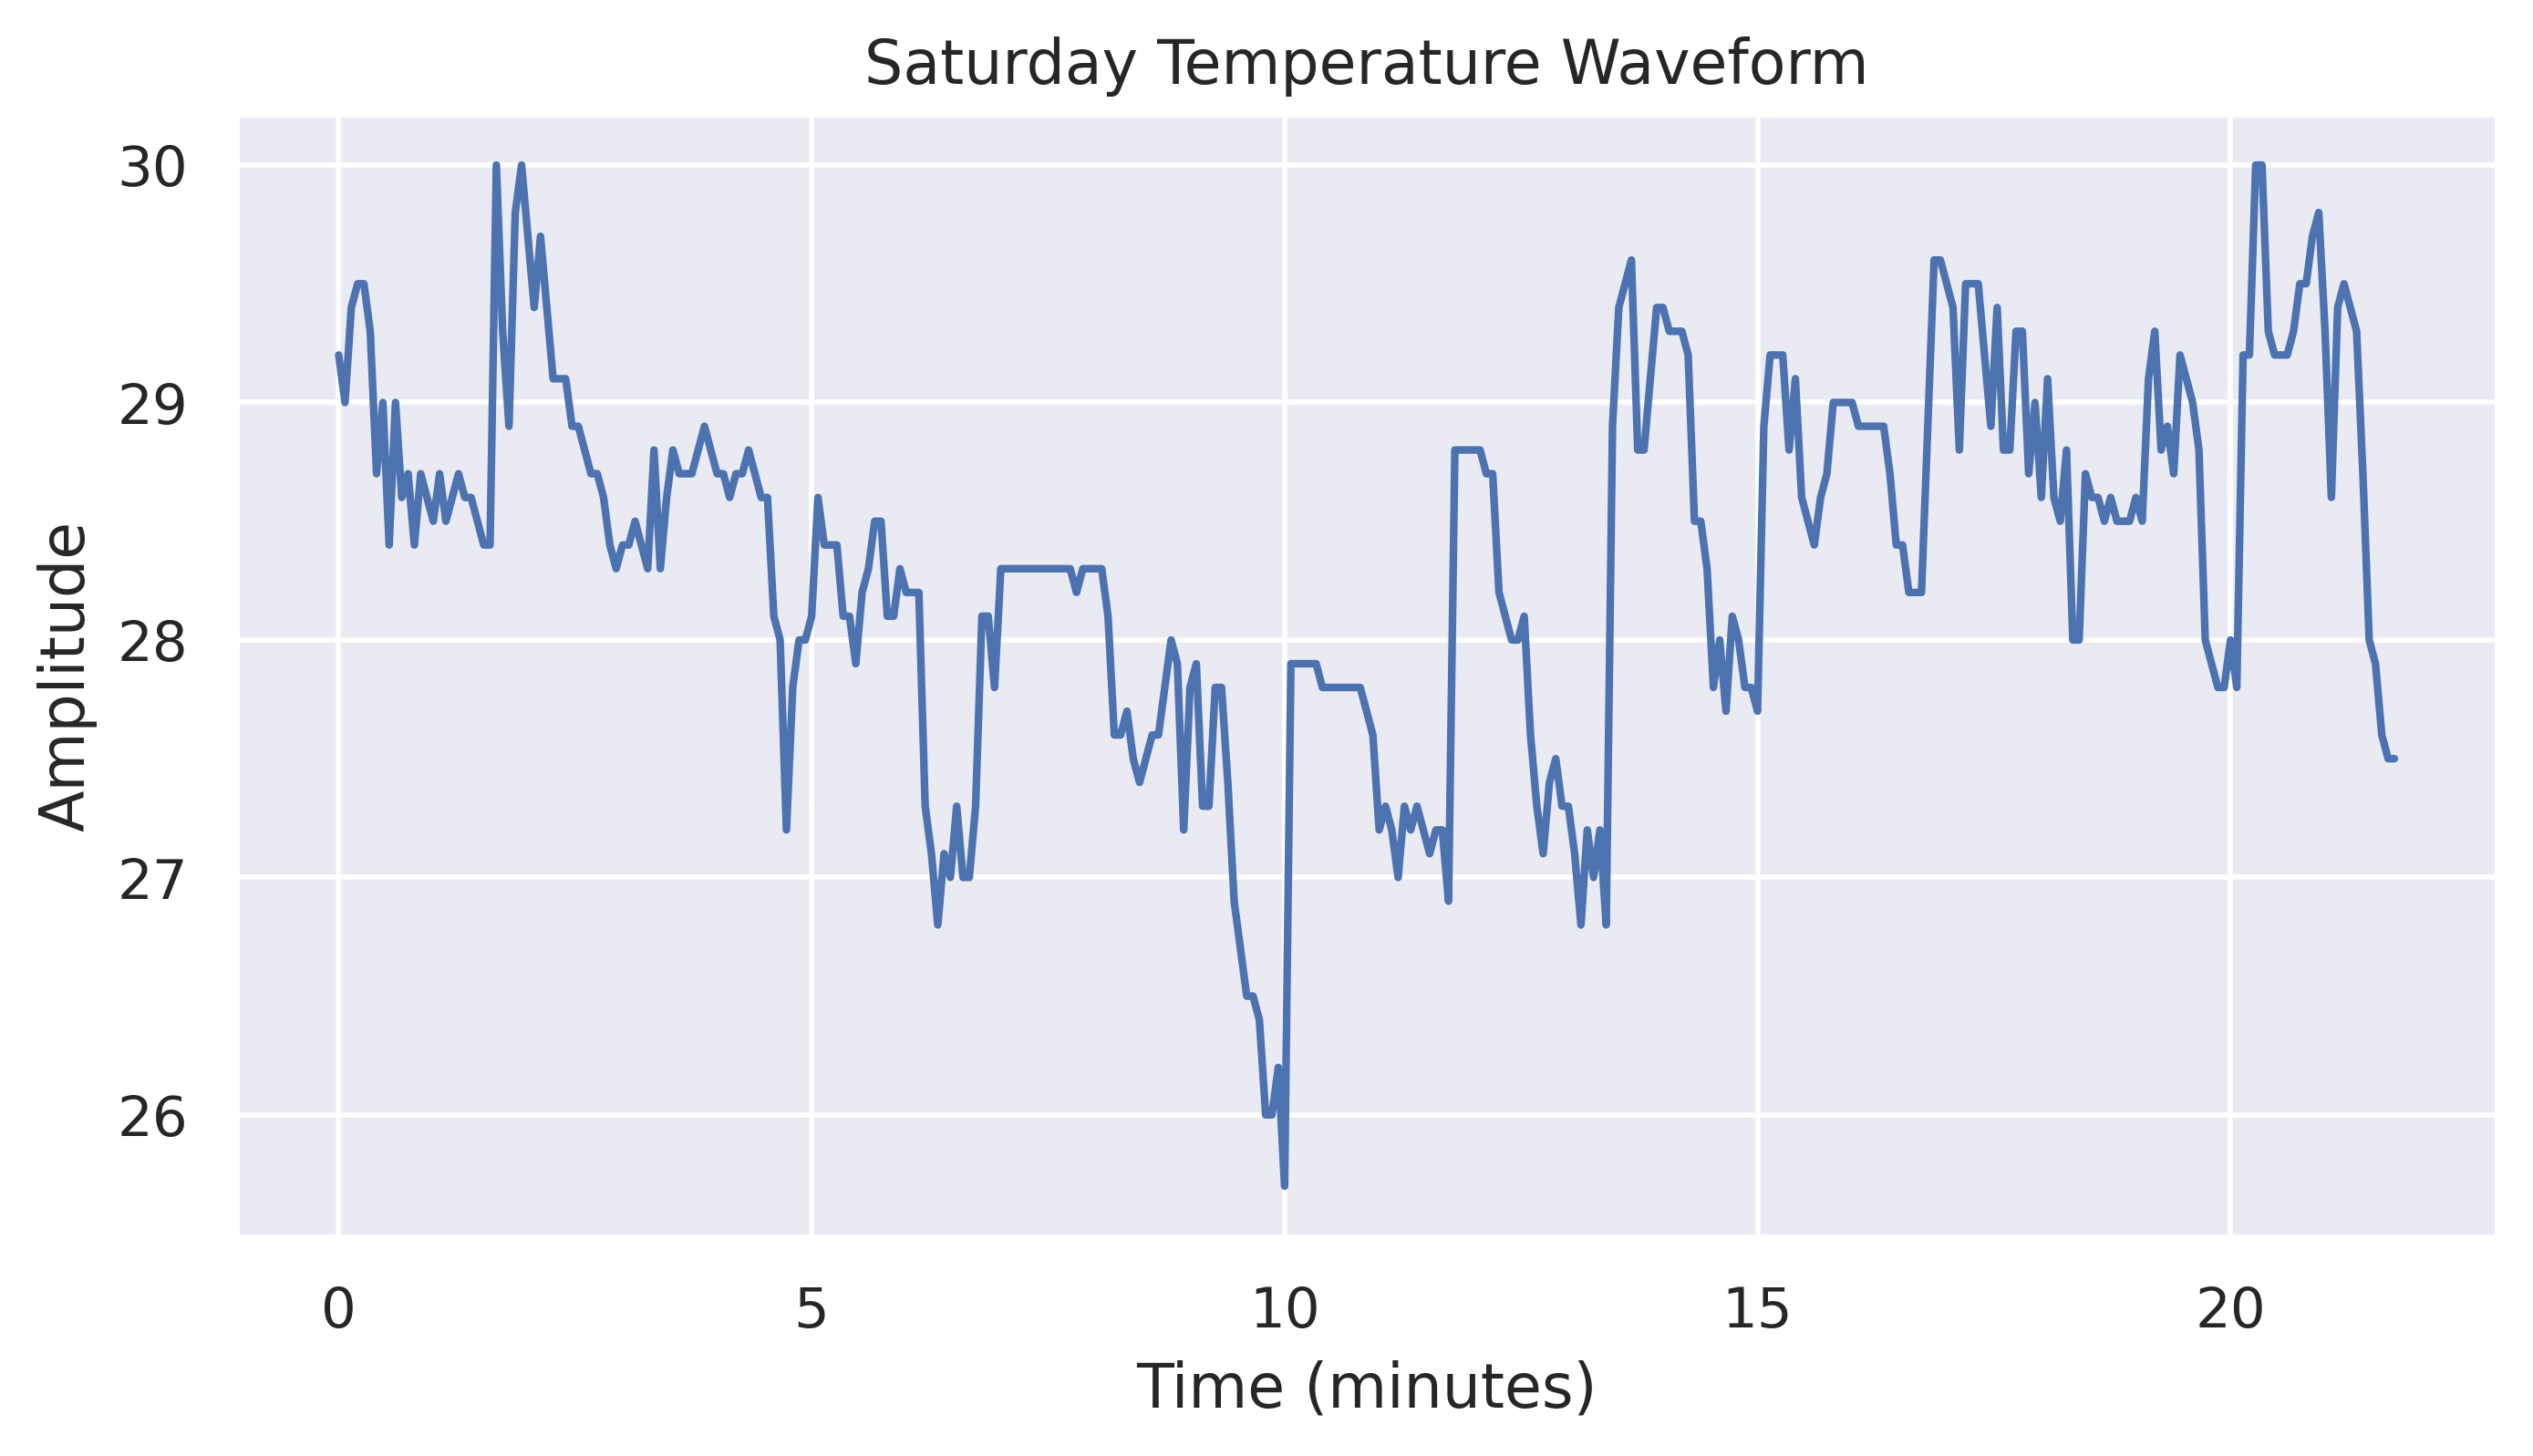

In [ ]:
# Filter the DataFrame to include only rows with Saturdays
saturdays_df = df[df['Date'].dt.dayofweek == 5].copy()
saturdays_df['Time'] = saturdays_df['Time'].dt.time
print(saturdays_df.drop(columns=['DateTime']))

# Generate the summary statistics for the numeric columns
statsum_sat = saturdays_df.drop(columns=['Date']).describe()
print(statsum_sat)
variance_sat = calculate_variance(saturdays_df)
print('\nVariance (Saturday):', variance_sat, '\n')

# Generate Histogram
generate_histogram(saturdays_df, 'Temperature', 'Temperature °C', 'Saturday Temperature Histogram')
print('\n')

# Generate Waveform
generate_waveform(early_morning_df, 'Saturday Temperature Waveform')

           Date      Time  Temperature
452  2023-10-22  14:31:20         28.2
453  2023-10-22  14:45:24         28.1
454  2023-10-22  16:35:16         28.1
455  2023-10-22  16:49:21         28.0
458  2023-10-22  17:45:51         28.0
...         ...       ...          ...
1120 2023-10-29  07:15:39         27.9
1119 2023-10-29  07:01:34         27.6
1118 2023-10-29  06:47:31         27.6
1117 2023-10-29  06:33:26         27.4
1126 2023-10-29  08:54:14         28.2

[194 rows x 3 columns]
       Temperature
count   194.000000
mean     28.553608
std       0.978532
min      26.400000
25%      27.900000
50%      28.400000
75%      29.375000
max      30.800000

Variance (Sunday): 0.9525900733340419 



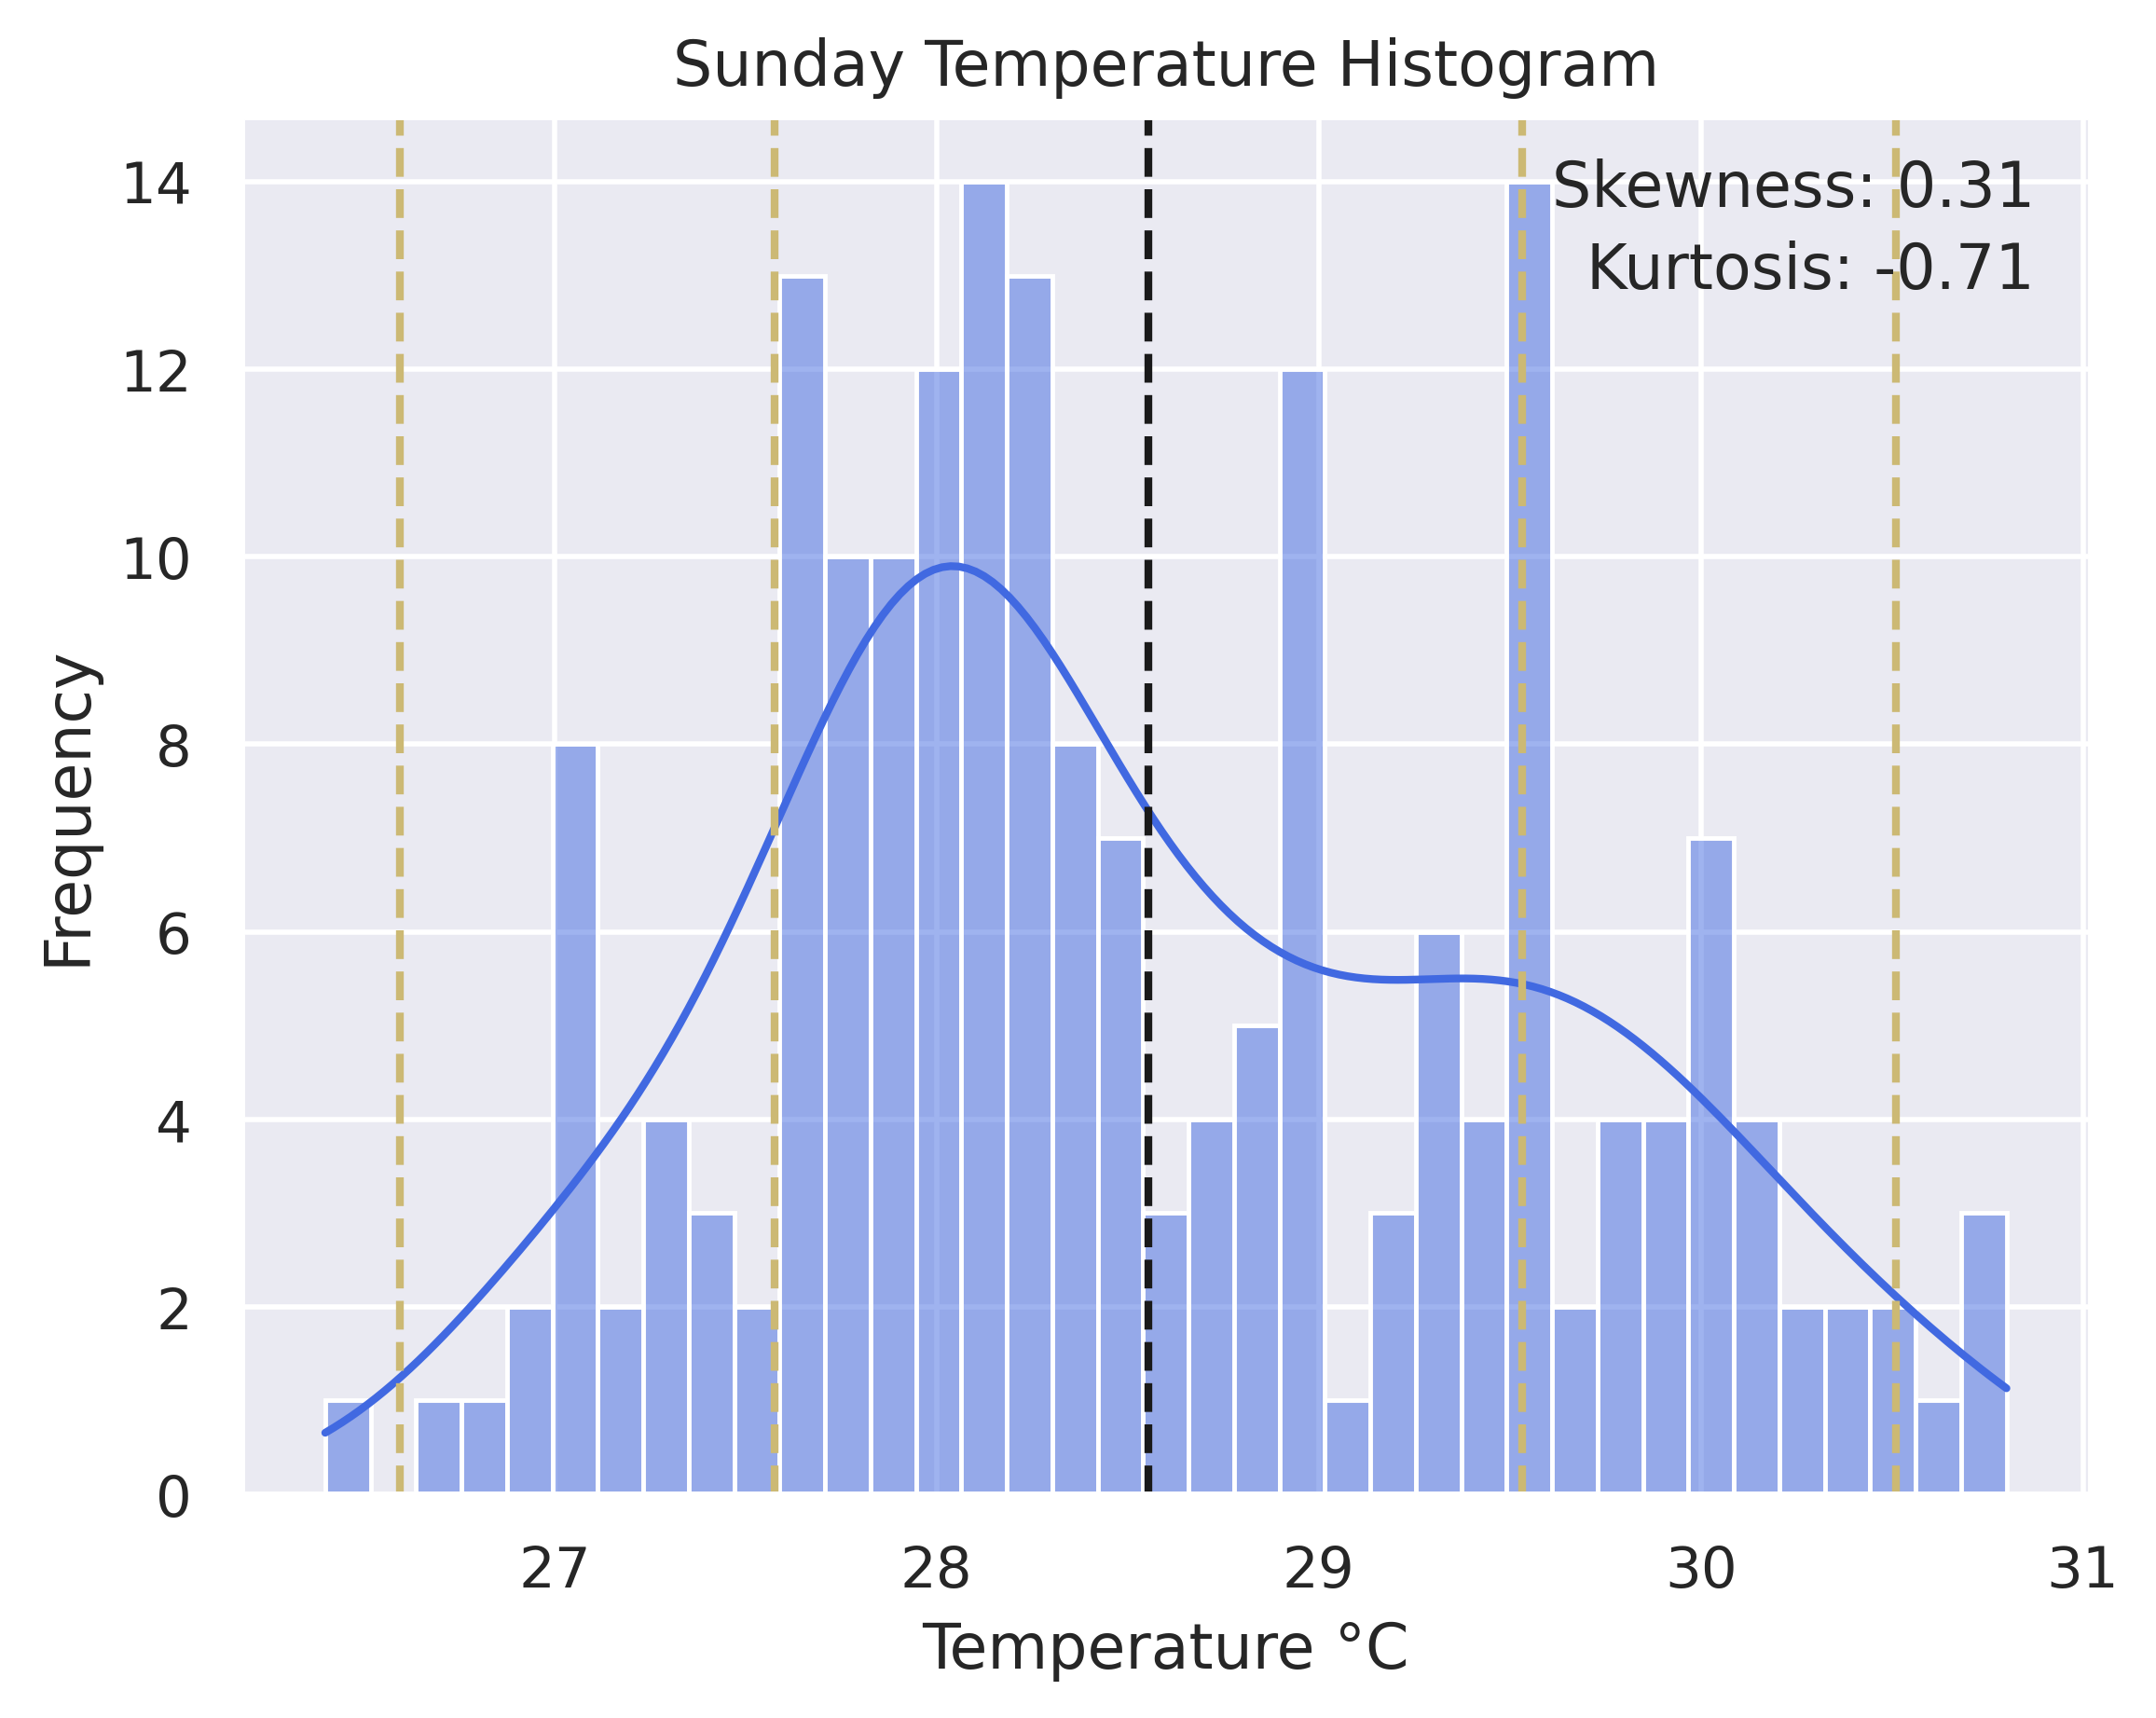

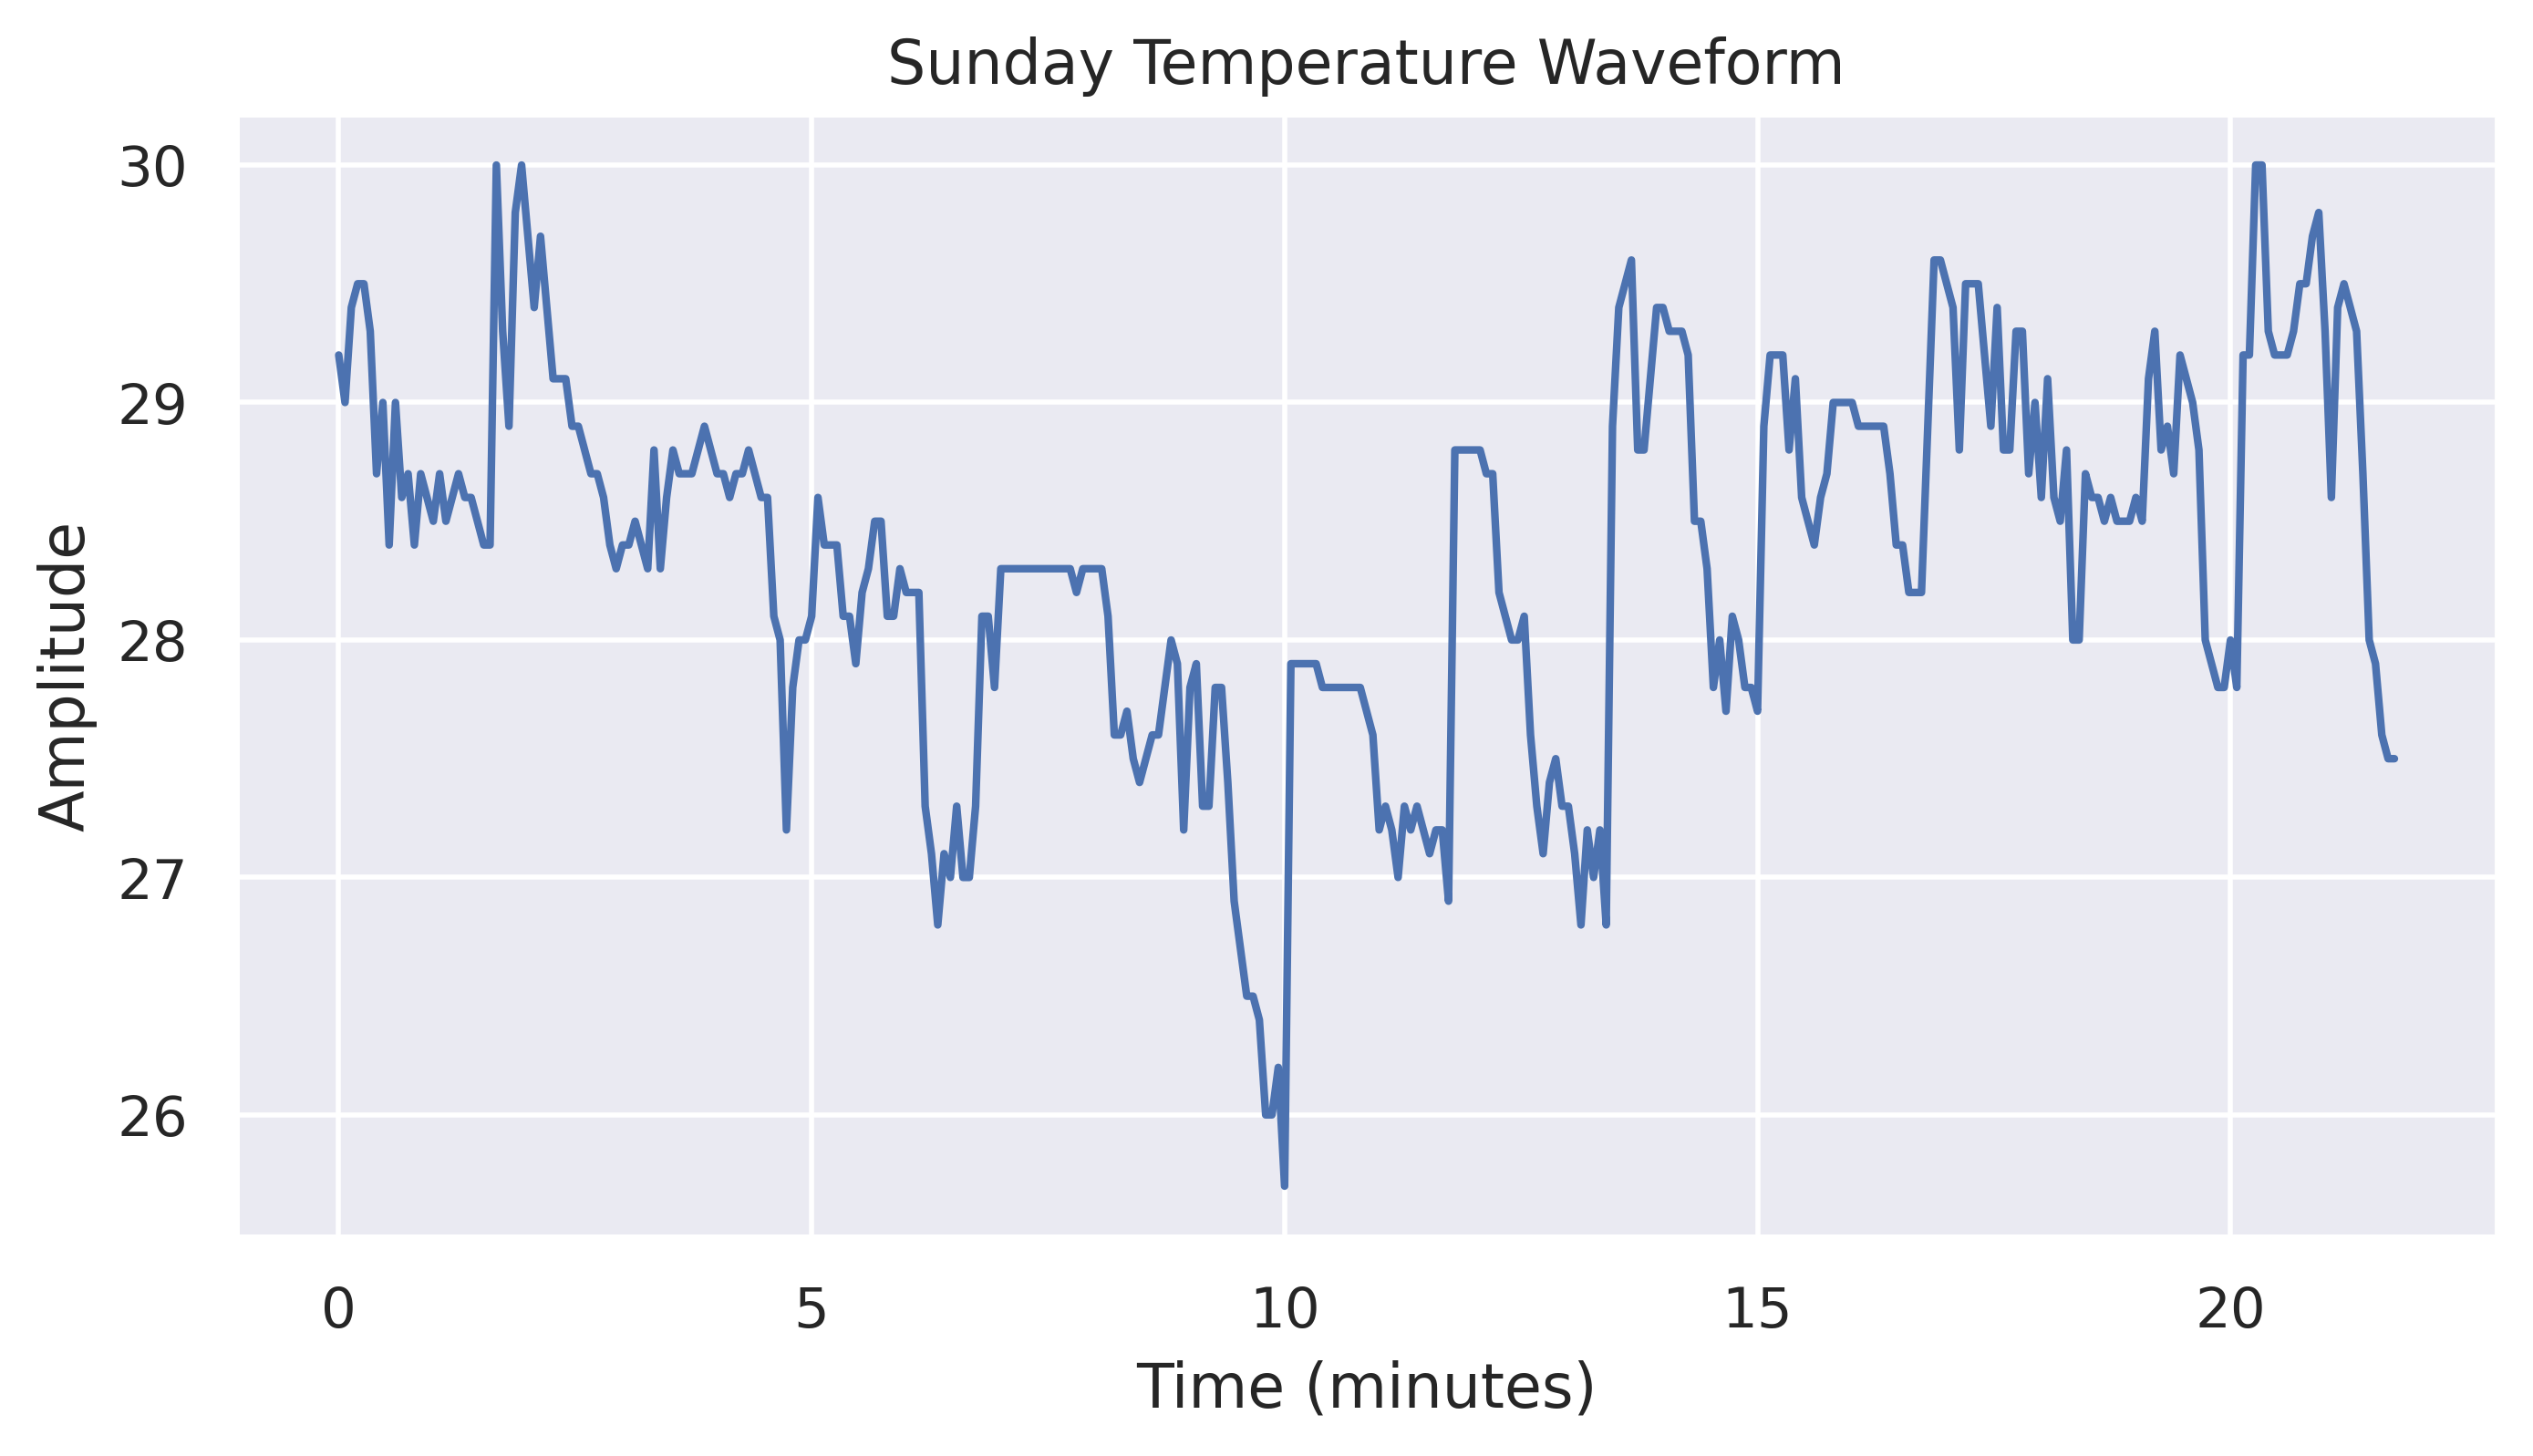

In [ ]:
# Filter the DataFrame to include only rows with Sundays
sundays_df = df[df['Date'].dt.dayofweek == 6].copy()
sundays_df['Time'] = sundays_df['Time'].dt.time
print(sundays_df.drop(columns=['DateTime']))

# Generate the summary statistics for the numeric columns
statsum_sun = sundays_df.drop(columns=['Date']).describe()
print(statsum_sun)
variance_sun = calculate_variance(sundays_df)
print('\nVariance (Sunday):', variance_sun, '\n')

# Generate Histogram
generate_histogram(sundays_df, 'Temperature', 'Temperature °C', 'Sunday Temperature Histogram')
print('\n')

# Generate Waveform
generate_waveform(early_morning_df, 'Sunday Temperature Waveform')

**General**

           Date      Time  Temperature
0    2023-10-17  18:28:08         30.5
22   2023-10-17  23:36:19         29.6
21   2023-10-17  23:22:17         29.5
20   2023-10-17  23:06:05         29.5
19   2023-10-17  22:55:08         29.8
...         ...       ...          ...
1313 2023-10-31  05:26:52         27.6
1314 2023-10-31  05:40:56         27.5
1315 2023-10-31  05:55:00         27.5
1317 2023-10-31  06:23:07         27.6
1346 2023-10-31  13:11:03         29.9

[1347 rows x 3 columns]
       Temperature
count  1347.000000
mean     28.554863
std       0.879355
min      25.600000
25%      28.000000
50%      28.500000
75%      29.100000
max      30.900000

Variance (General): 0.7726916478037751 



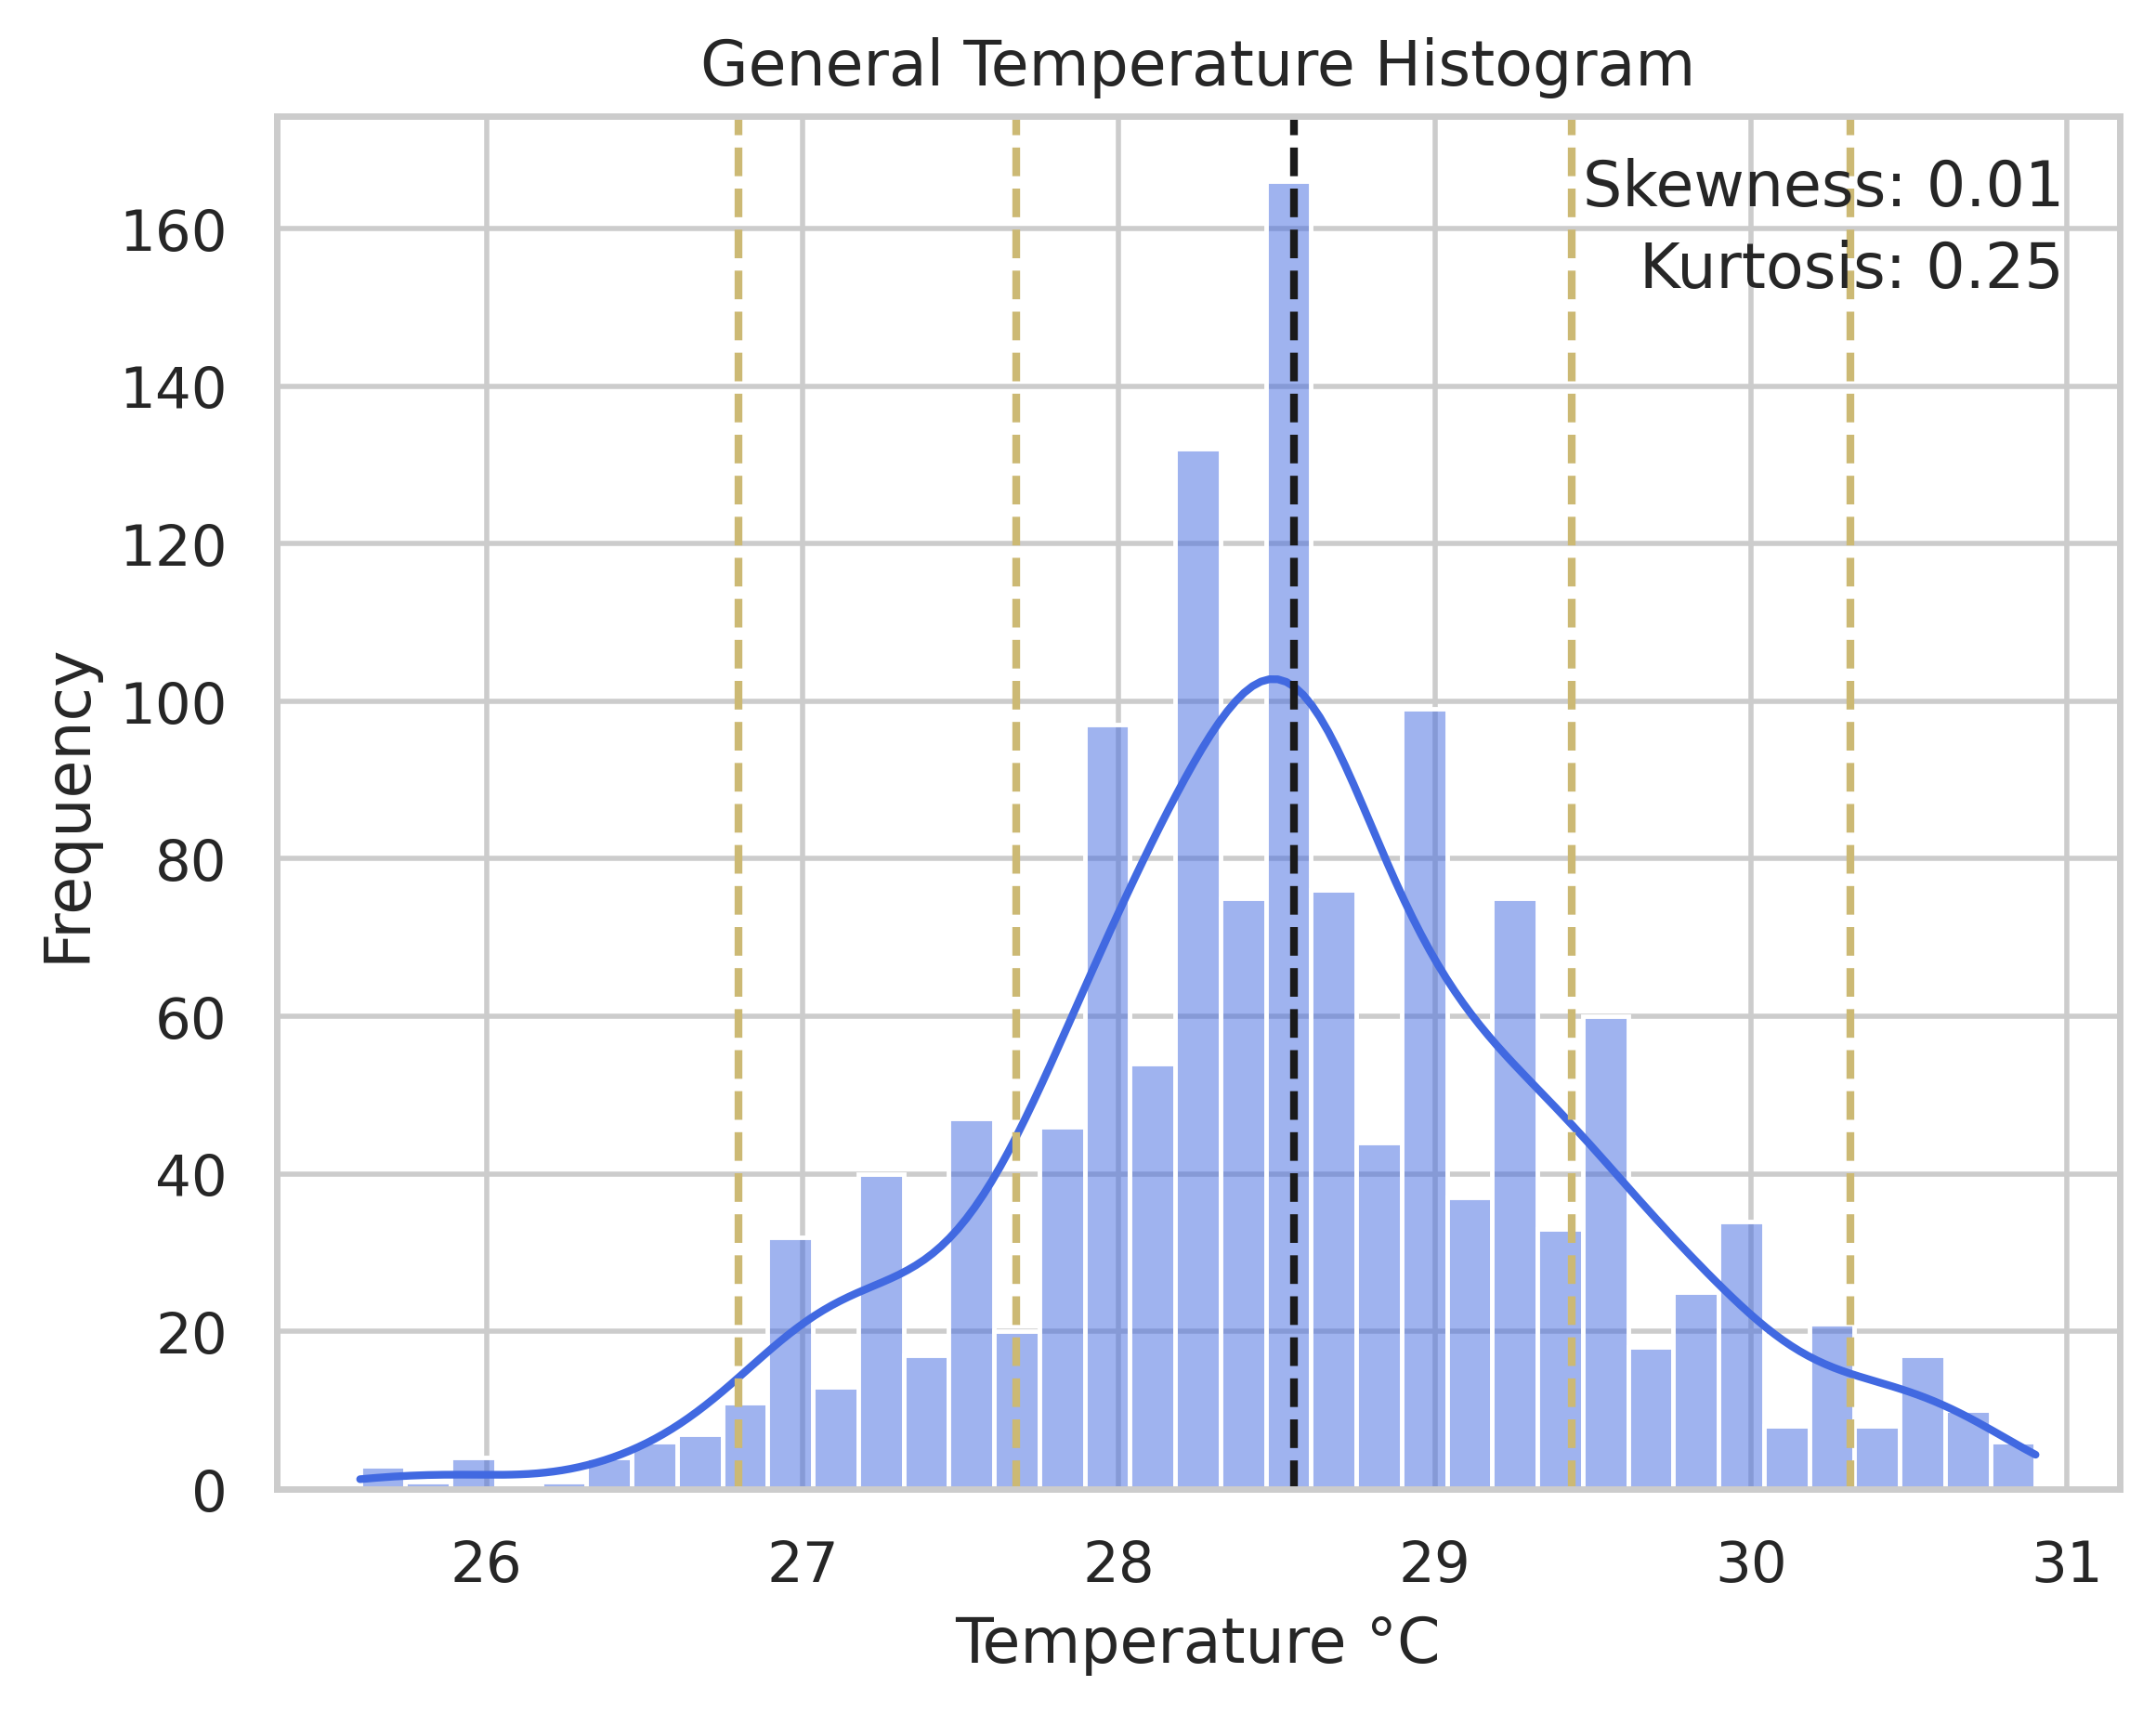

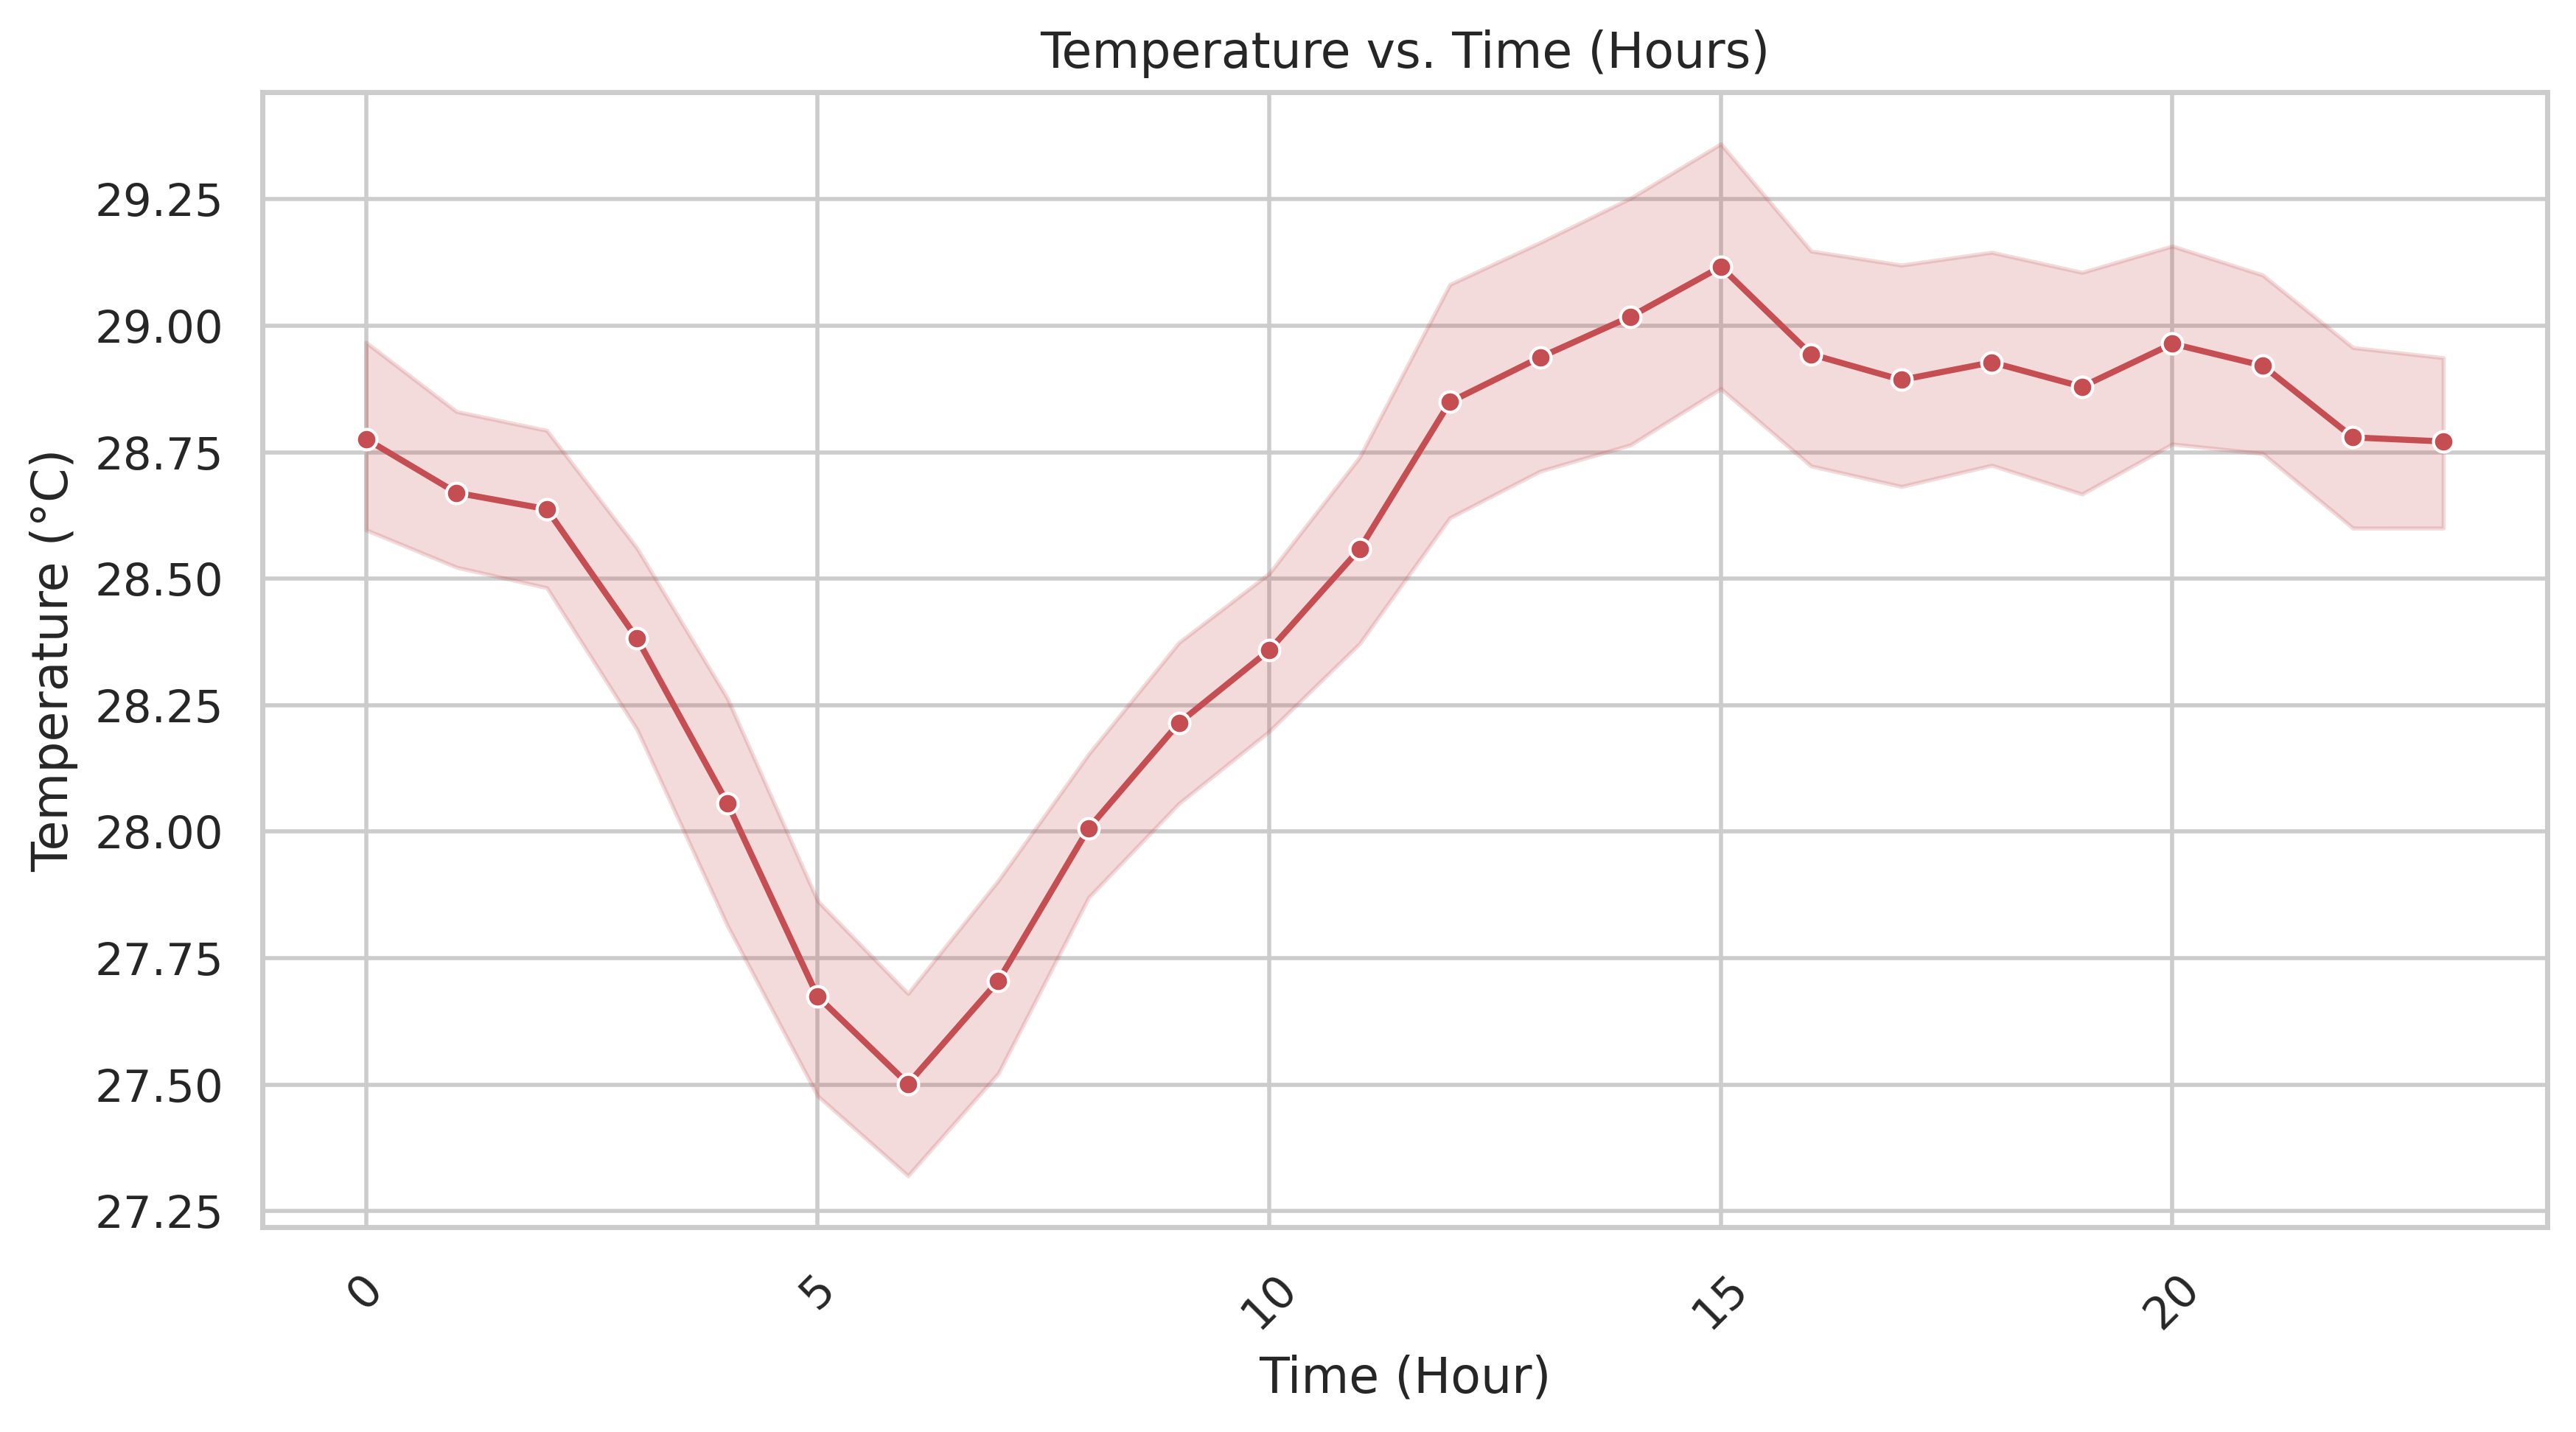

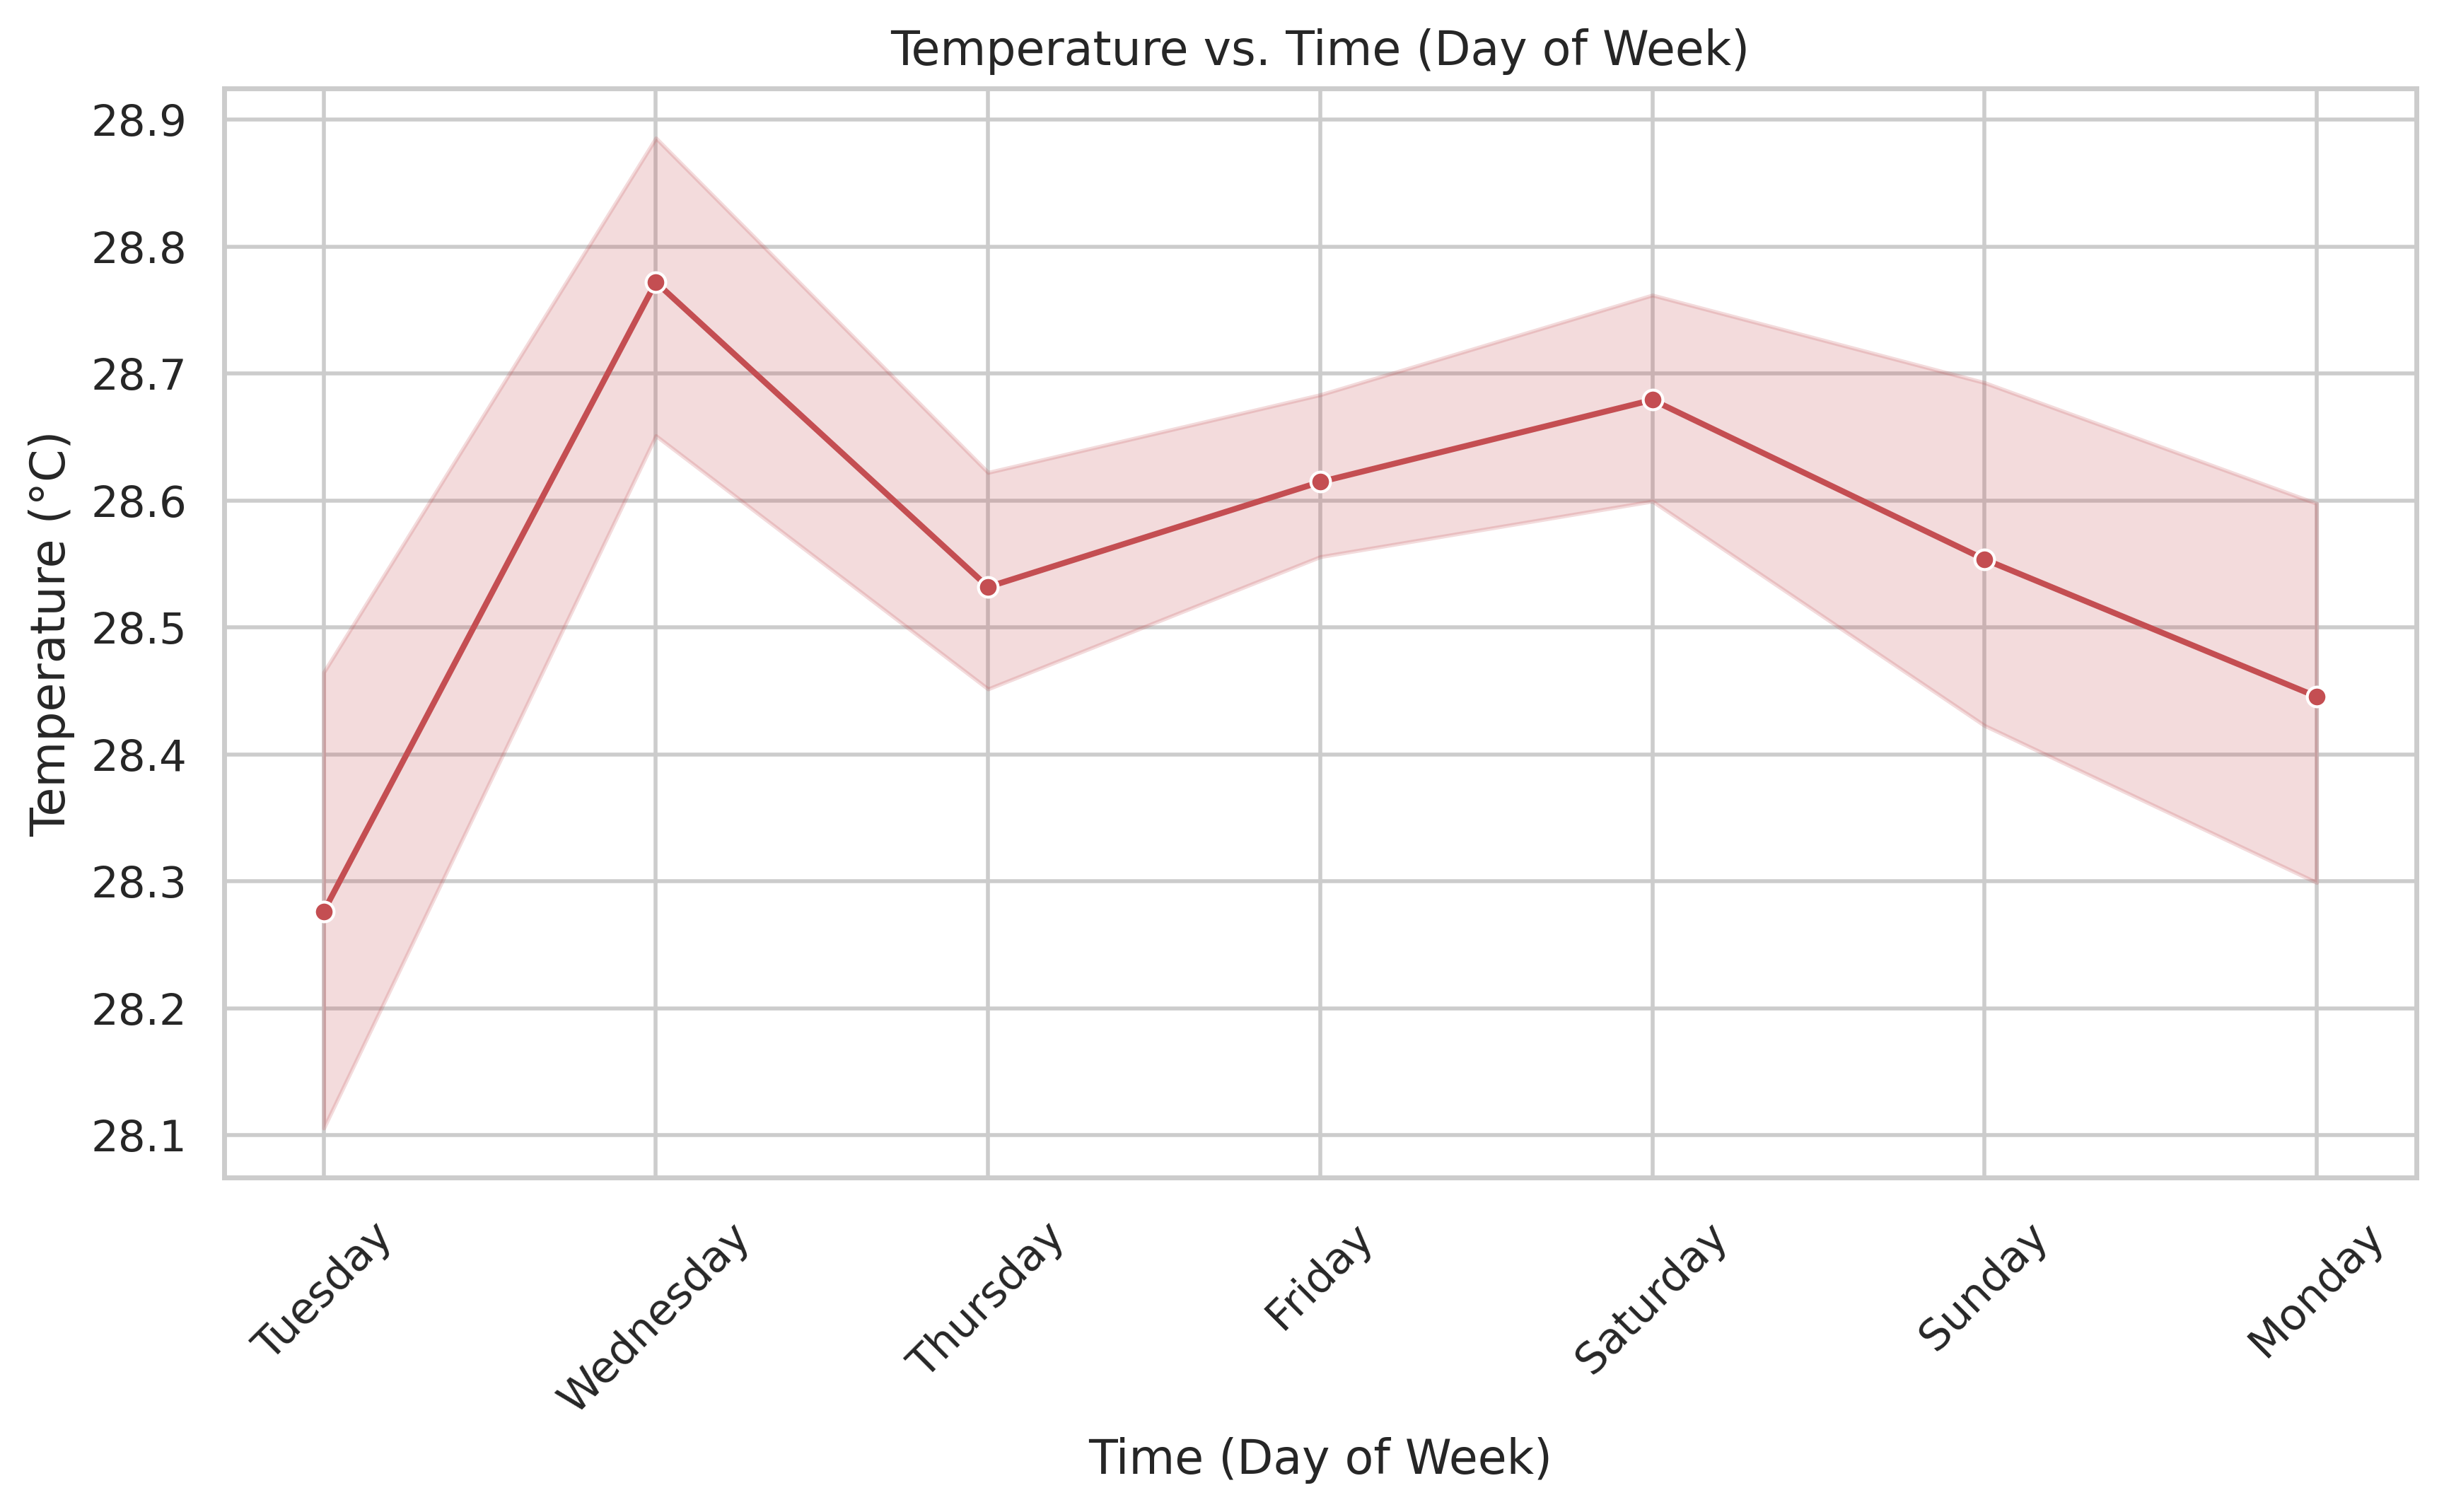

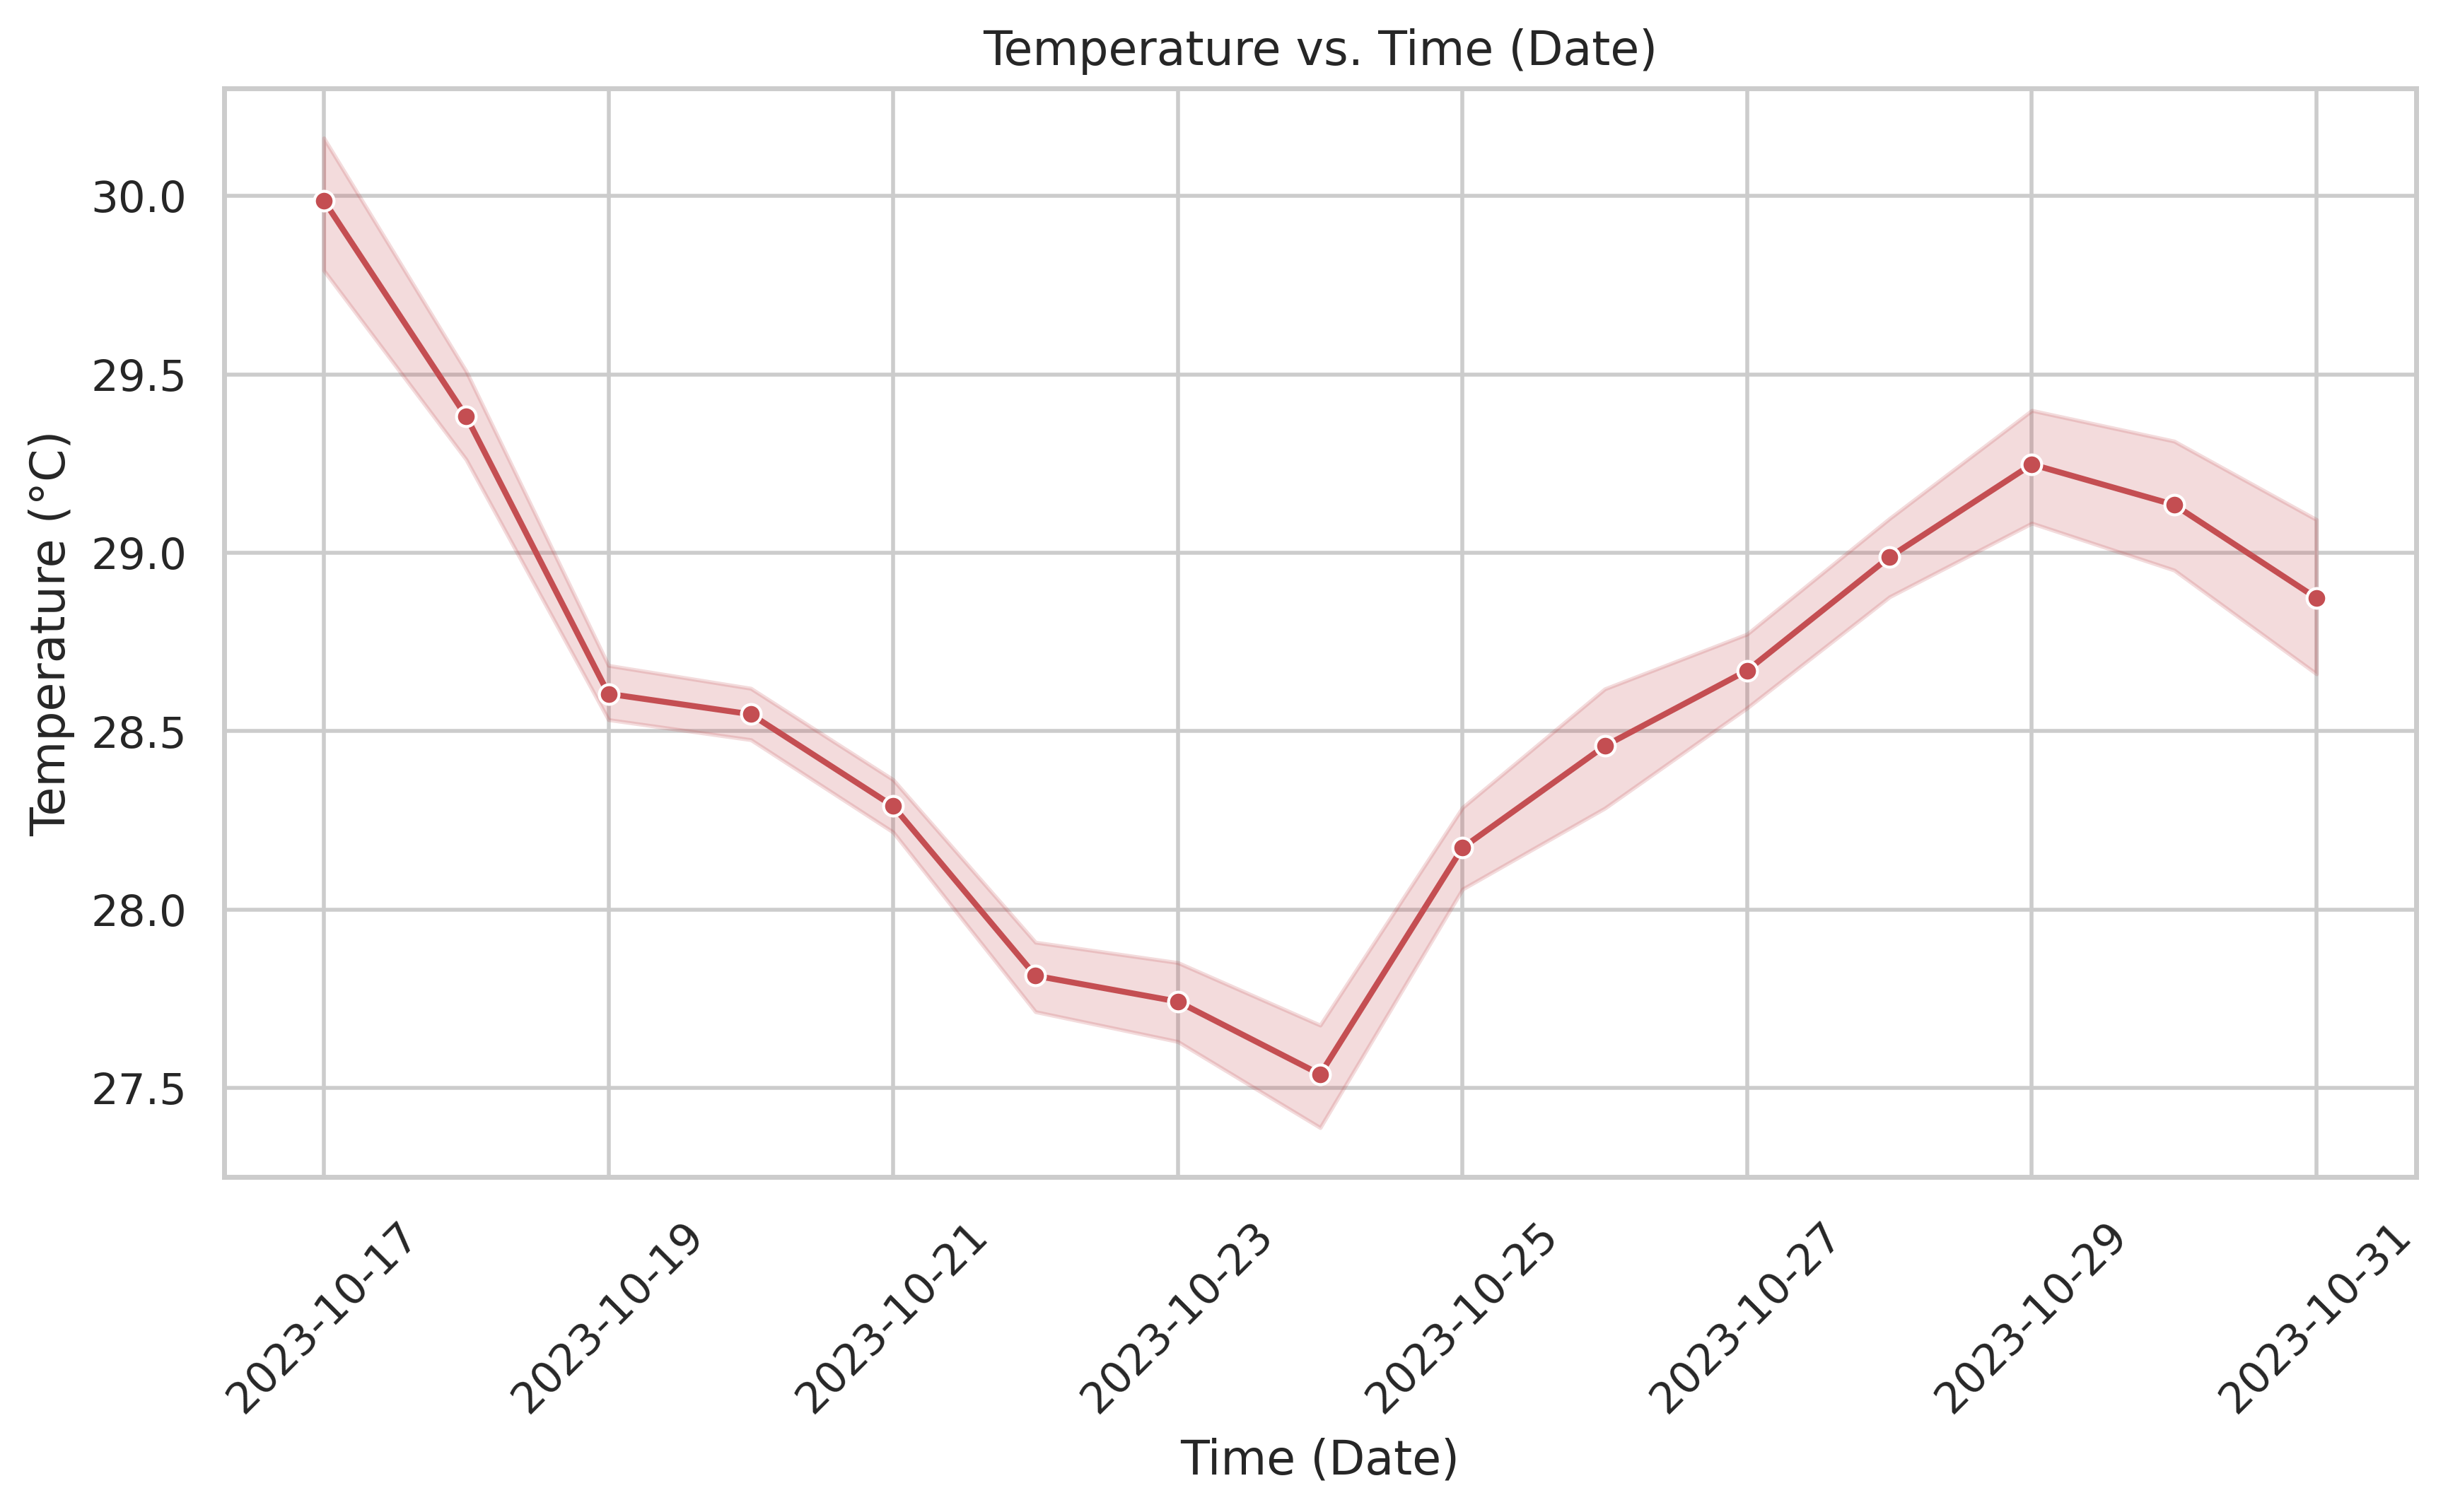

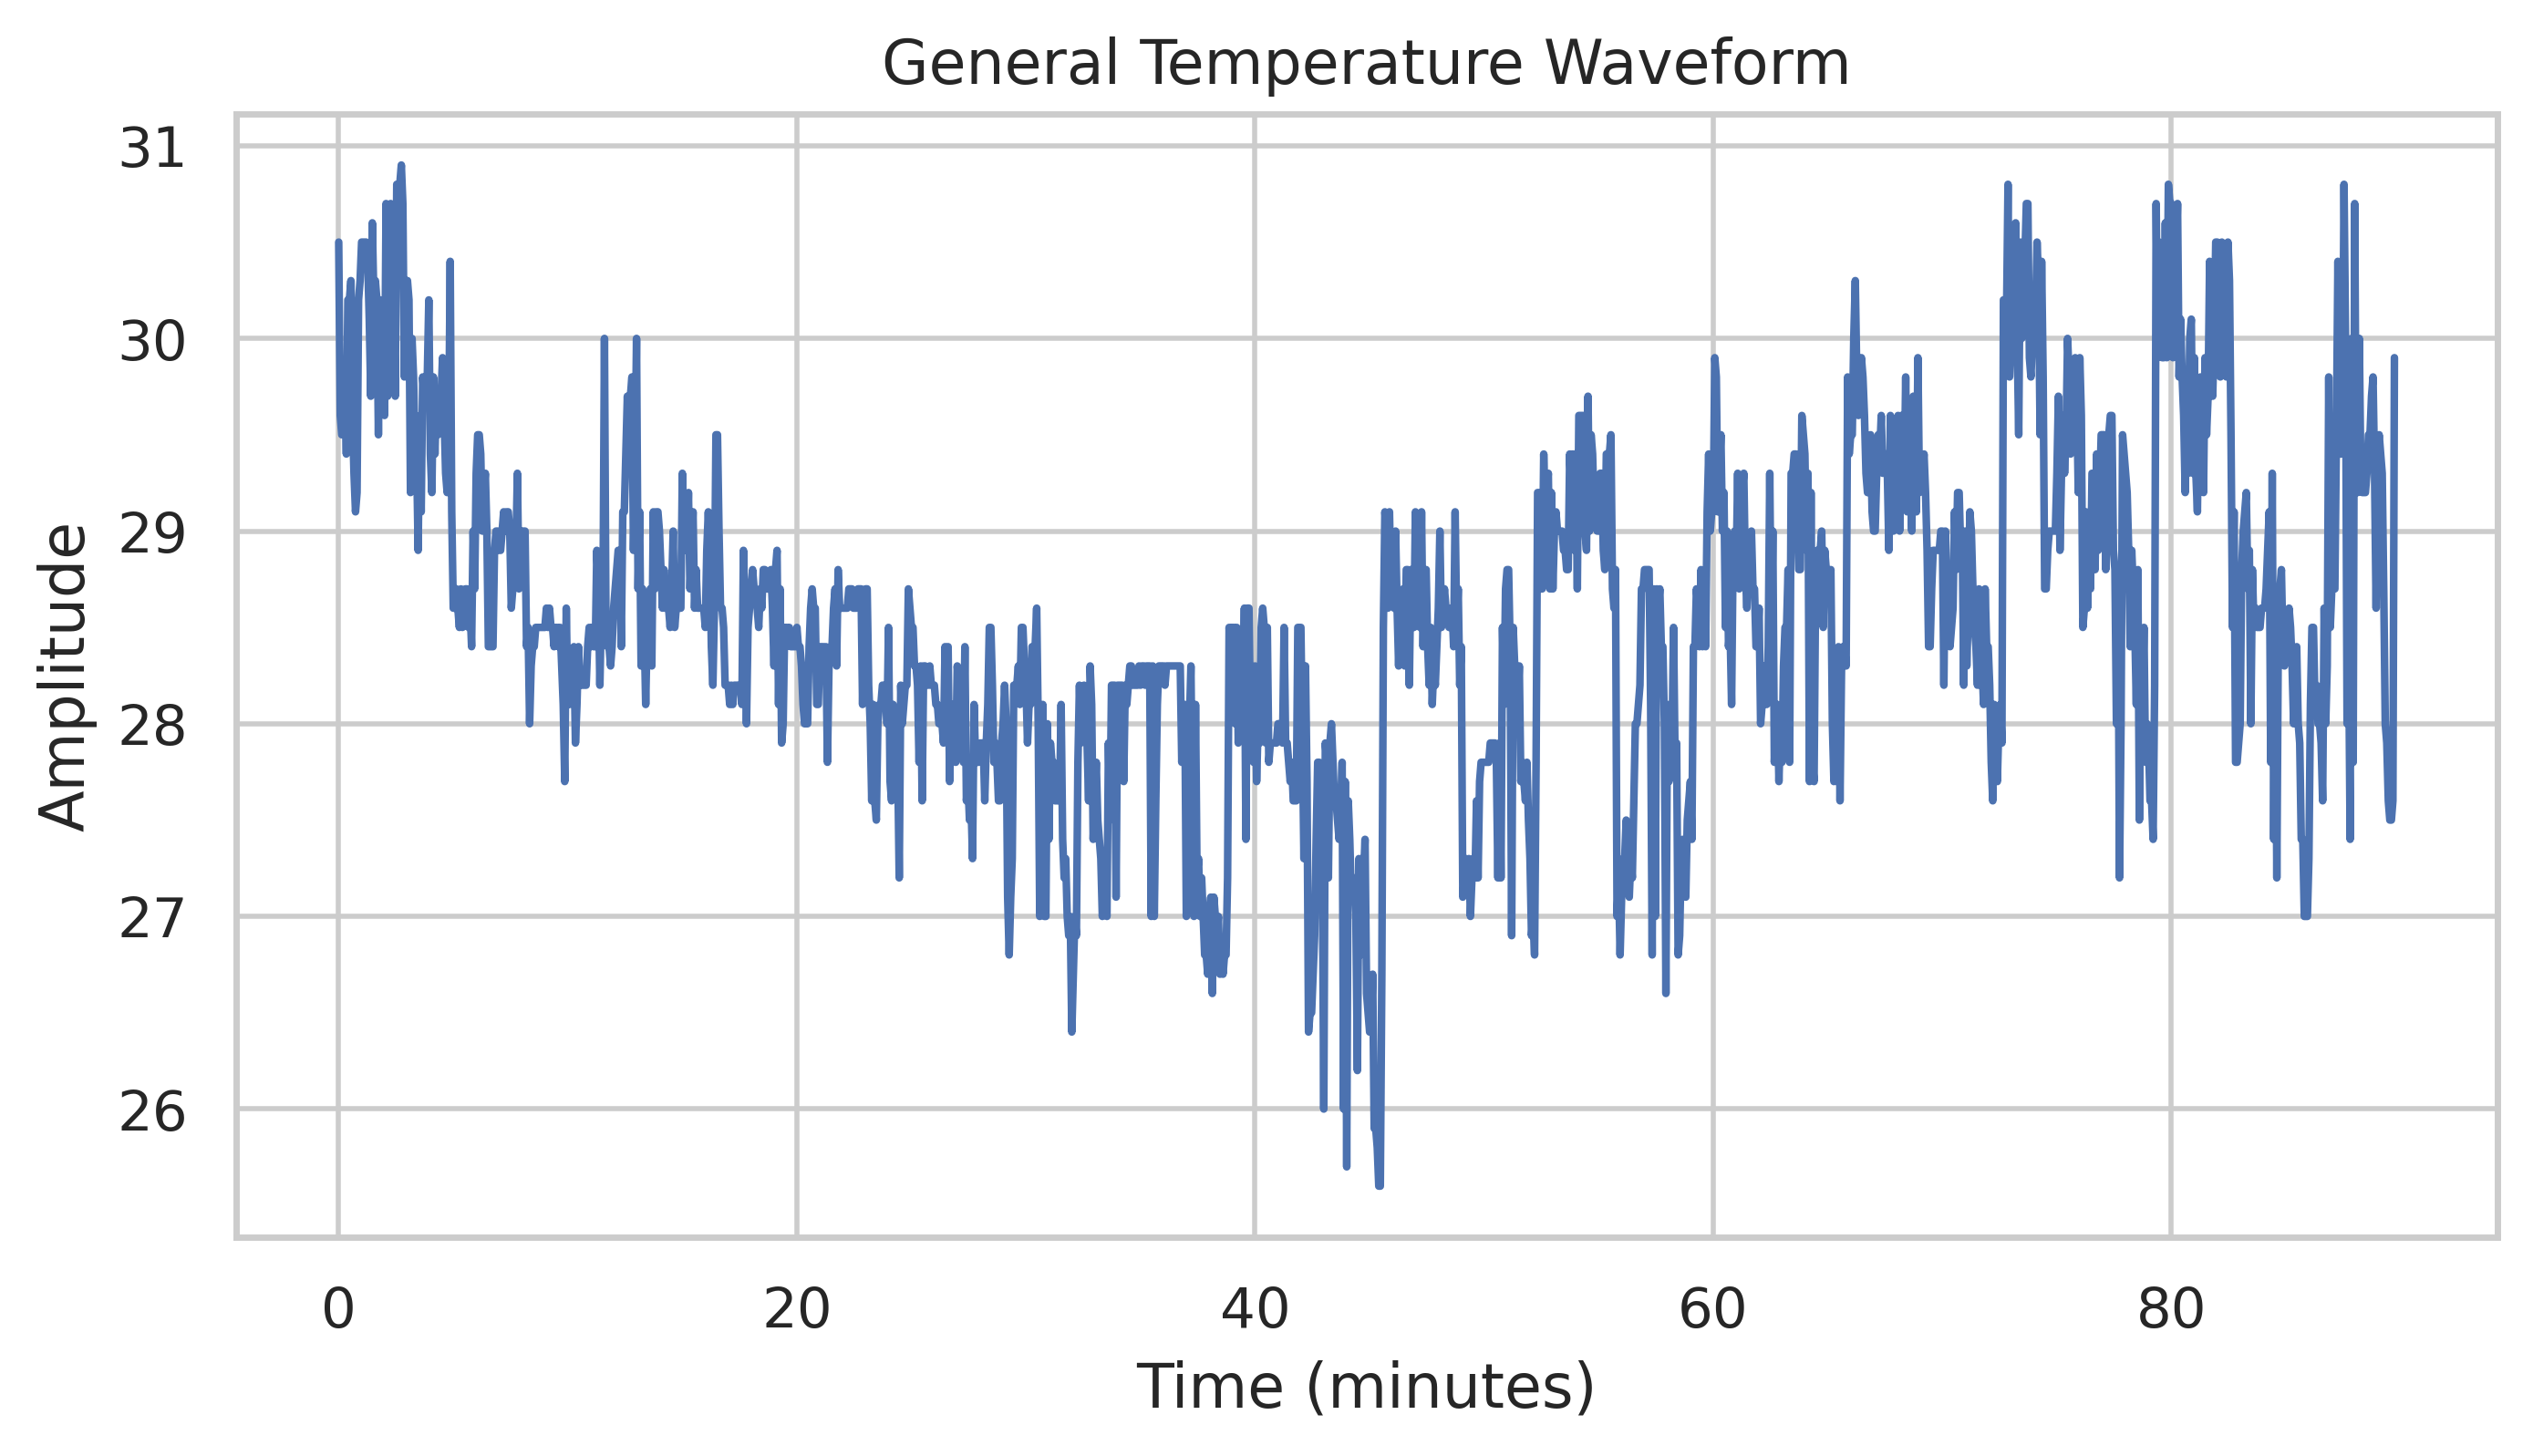

In [ ]:
# Filter the DataFrame to include only rows with Sundays
general_df = df.copy()
general_df['Time'] = general_df['Time'].dt.time
print(general_df.drop(columns=['DateTime']))

# Generate the summary statistics for the numeric columns
statsum_gen = general_df.drop(columns=['Date']).describe()
print(statsum_gen)
variance_gen = calculate_variance(general_df)
print('\nVariance (General):', variance_gen, '\n')

# Generate Histogram
generate_histogram(general_df, 'Temperature', 'Temperature °C', 'General Temperature Histogram')
print('\n')

# Generate Line Graph
generate_line_graph(general_df, general_df['DateTime'].dt.hour, 'Time (Hour)', 'Temperature vs. Time (Hours)')
print('\n')
generate_line_graph(general_df, general_df['Date'].dt.day_name(), 'Time (Day of Week)', 'Temperature vs. Time (Day of Week)')
print('\n')
generate_line_graph(general_df, general_df['Date'], 'Time (Date)', 'Temperature vs. Time (Date)')
print('\n')

# Generate Waveform
generate_waveform(general_df, 'General Temperature Waveform')